In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/lauralayton/Downloads/Chamber_GAM_model_data 2.csv')
print(df)

       chamber_ID       Date GS_Interval_fld  Hydroperiod_days_fld   LAB_ID  \
0               1  7/11/2012           Early                  54.5  13060.0   
1               1  7/17/2012            Late                  54.5  13289.0   
2               1  7/19/2012            Late                  54.5  13355.0   
3               1  7/20/2012            Late                  54.5  13399.0   
4               1  7/23/2012            Late                  54.5  13443.0   
...           ...        ...             ...                   ...      ...   
18798           5  5/22/2015           Early                   0.0  34216.0   
18799           5   6/4/2015           Early                   0.0  34485.0   
18800           5   7/1/2015           Early                   0.0  34977.0   
18801           5  7/16/2015           Early                   0.0  35223.0   
18802           5  7/30/2015            Late                   0.0    960.7   

      Land_Cover_fld  methane_flux_log_mg_m2_hr  ND

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   chamber_ID                 18803 non-null  int64  
 1   Date                       18803 non-null  object 
 2   GS_Interval_fld            18803 non-null  object 
 3   Hydroperiod_days_fld       18803 non-null  float64
 4   LAB_ID                     18803 non-null  float64
 5   Land_Cover_fld             18803 non-null  object 
 6   methane_flux_log_mg_m2_hr  18803 non-null  float64
 7   NDVI_lag_rs                18803 non-null  float64
 8   NDVI_rs                    18803 non-null  float64
 9   Size_m2_fld                18803 non-null  float64
 10  SoilT_C_fld                18803 non-null  float64
 11  SoilT_lag_C_fld            18803 non-null  float64
 12  Water_depth_cm_fld         18803 non-null  float64
 13  Wetland_Chamber            18803 non-null  obj

In [5]:
y = df.iloc[:,6].values

# for X I know we want the water table depth, and then soil temp I think, but should it be lag or not

X2 = df.iloc[:,[10, 12]].values
Xlag = df.iloc[:,[11, 12]].values

# ah yes the things that tell the wetland is the wetland_ID column, and the chamber_ID is combined with that to get Wetland_Chamber
# so should either use those first 2 or Wetland_Chamber, but not all, since then there is collinearity 

X = df.iloc[:,[0, 10, 12, 14]].values


In [6]:
X

array([[1, 25.5, 47.0, 'BECK 5'],
       [1, 23.0, 42.0, 'BECK 5'],
       [1, 27.1, 47.0, 'BECK 5'],
       ...,
       [5, 16.3, 0.0, 'T9'],
       [5, 16.9, 0.0, 'T9'],
       [5, 16.6, 0.0, 'T9']], shape=(18803, 4), dtype=object)

In [7]:
Xlag

array([[25.5, 47. ],
       [25.5, 42. ],
       [23. , 47. ],
       ...,
       [11.4,  0. ],
       [16.3,  0. ],
       [16.9,  0. ]], shape=(18803, 2))

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# need to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
# Adding Month and Year columns to the data
import datetime 
dates = df.iloc[:,1].values

def convert(date_time):
    format = '%m/%d/%Y'
    datetime_str = datetime.datetime.strptime(date_time, format)

    return datetime_str

date_time = '5/7/2003'
print(convert(date_time))

#hm. I think month is categorical
# I think year may also be categorical
# lowkey how did I forget this stuff from Intact #memorywipe

# months = []
# years = []
# for date in dates:
#     dateobj = convert(date)
#     monthobj = 

2003-05-07 00:00:00


In [9]:
df['Date Object'] = pd.to_datetime(df['Date'])
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

print(df)

       chamber_ID       Date GS_Interval_fld  Hydroperiod_days_fld   LAB_ID  \
0               1  7/11/2012           Early                  54.5  13060.0   
1               1  7/17/2012            Late                  54.5  13289.0   
2               1  7/19/2012            Late                  54.5  13355.0   
3               1  7/20/2012            Late                  54.5  13399.0   
4               1  7/23/2012            Late                  54.5  13443.0   
...           ...        ...             ...                   ...      ...   
18798           5  5/22/2015           Early                   0.0  34216.0   
18799           5   6/4/2015           Early                   0.0  34485.0   
18800           5   7/1/2015           Early                   0.0  34977.0   
18801           5  7/16/2015           Early                   0.0  35223.0   
18802           5  7/30/2015            Late                   0.0    960.7   

      Land_Cover_fld  methane_flux_log_mg_m2_hr  ND

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   chamber_ID                 18803 non-null  int64         
 1   Date                       18803 non-null  object        
 2   GS_Interval_fld            18803 non-null  object        
 3   Hydroperiod_days_fld       18803 non-null  float64       
 4   LAB_ID                     18803 non-null  float64       
 5   Land_Cover_fld             18803 non-null  object        
 6   methane_flux_log_mg_m2_hr  18803 non-null  float64       
 7   NDVI_lag_rs                18803 non-null  float64       
 8   NDVI_rs                    18803 non-null  float64       
 9   Size_m2_fld                18803 non-null  float64       
 10  SoilT_C_fld                18803 non-null  float64       
 11  SoilT_lag_C_fld            18803 non-null  float64       
 12  Wate

In [11]:
# columns to try in the model (all data) as features:
# chamber_ID, Hydroperiod_days_fld,
# Land_Cover_fld, NDVI_rs (or lag), Size_m2_fld, SoilT_c_fld (or lag)
# Water_depth_cm_fld, wetland_ID, WFPS_pcnt_fld (or lag), Month, Year

# target variable: methane_flux_log_mg_m2_hr

# to leave out: Date, Wetland_Chamber (since this is the same as wetland_ID combined with chamber_ID), Date Object


# Split the data into features (X) and target (y)
X = df[['chamber_ID', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Month', 'Year']]
y = df['methane_flux_log_mg_m2_hr']

In [12]:
# Converting categorical variables into numerical

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

x_categorical = X.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude = ['object'])

x = pd.concat([x_categorical, x_numerical], axis = 1)

print(x)
print(x.info())

       Land_Cover_fld  wetland_ID  chamber_ID  Hydroperiod_days_fld  \
0                   1           0           1                  54.5   
1                   1           0           1                  54.5   
2                   1           0           1                  54.5   
3                   1           0           1                  54.5   
4                   1           0           1                  54.5   
...               ...         ...         ...                   ...   
18798               1         142           5                   0.0   
18799               1         142           5                   0.0   
18800               1         142           5                   0.0   
18801               1         142           5                   0.0   
18802               1         142           5                   0.0   

       NDVI_lag_rs  Size_m2_fld  SoilT_C_fld  Water_depth_cm_fld  \
0             0.37       5500.0         25.5                47.0   
1          

In [13]:
# Split the data into training and test sets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [14]:
# Fitting and Evaluating the Random Forest Model

regressor = RandomForestRegressor(oob_score = True, max_depth = 5)

regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, oob_score=True)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# making predictions using the trained model and storing them
predictions = regressor.predict(X_test)

# evaluating model performance with MSE
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# evaluating model performance with R^2
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.5107414561595371
Mean Squared Error: 5.8003381952375275
R-squared: 0.5115896103443451


In [53]:
regressor = RandomForestRegressor(oob_score = True, max_depth = 2)
regressor.fit(X_train, y_train)
predictions1 = regressor.predict(X_test)

regressor = RandomForestRegressor(oob_score = True, max_depth = 5)
regressor.fit(X_train, y_train)
predictions2 = regressor.predict(X_test)

regressor = RandomForestRegressor(oob_score = True, max_depth = 7)
regressor.fit(X_train, y_train)
predictions3 = regressor.predict(X_test)

regressor = RandomForestRegressor(oob_score = True, max_depth = 10)
regressor.fit(X_train, y_train)
predictions4 = regressor.predict(X_test)


print(f'R-squared, max depth = 2: {r2_score(y_test, predictions1)}')
print(f'R-squared, max depth = 5: {r2_score(y_test, predictions2)}')
print(f'R-squared, max depth = 7: {r2_score(y_test, predictions3)}')
print(f'R-squared, max depth = 10: {r2_score(y_test, predictions4)}')

plt.figure()


R-squared, max depth = 2: 0.34733234611611297
R-squared, max depth = 5: 0.525692043014212
R-squared, max depth = 7: 0.5868495857696732
R-squared, max depth = 10: 0.6578667065479271


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [113]:
regressor = RandomForestRegressor(oob_score = True)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print(f'R-squared, no max depth: {r2_score(y_test, predictions)}')

R-squared, no max depth: 0.7065698683917541


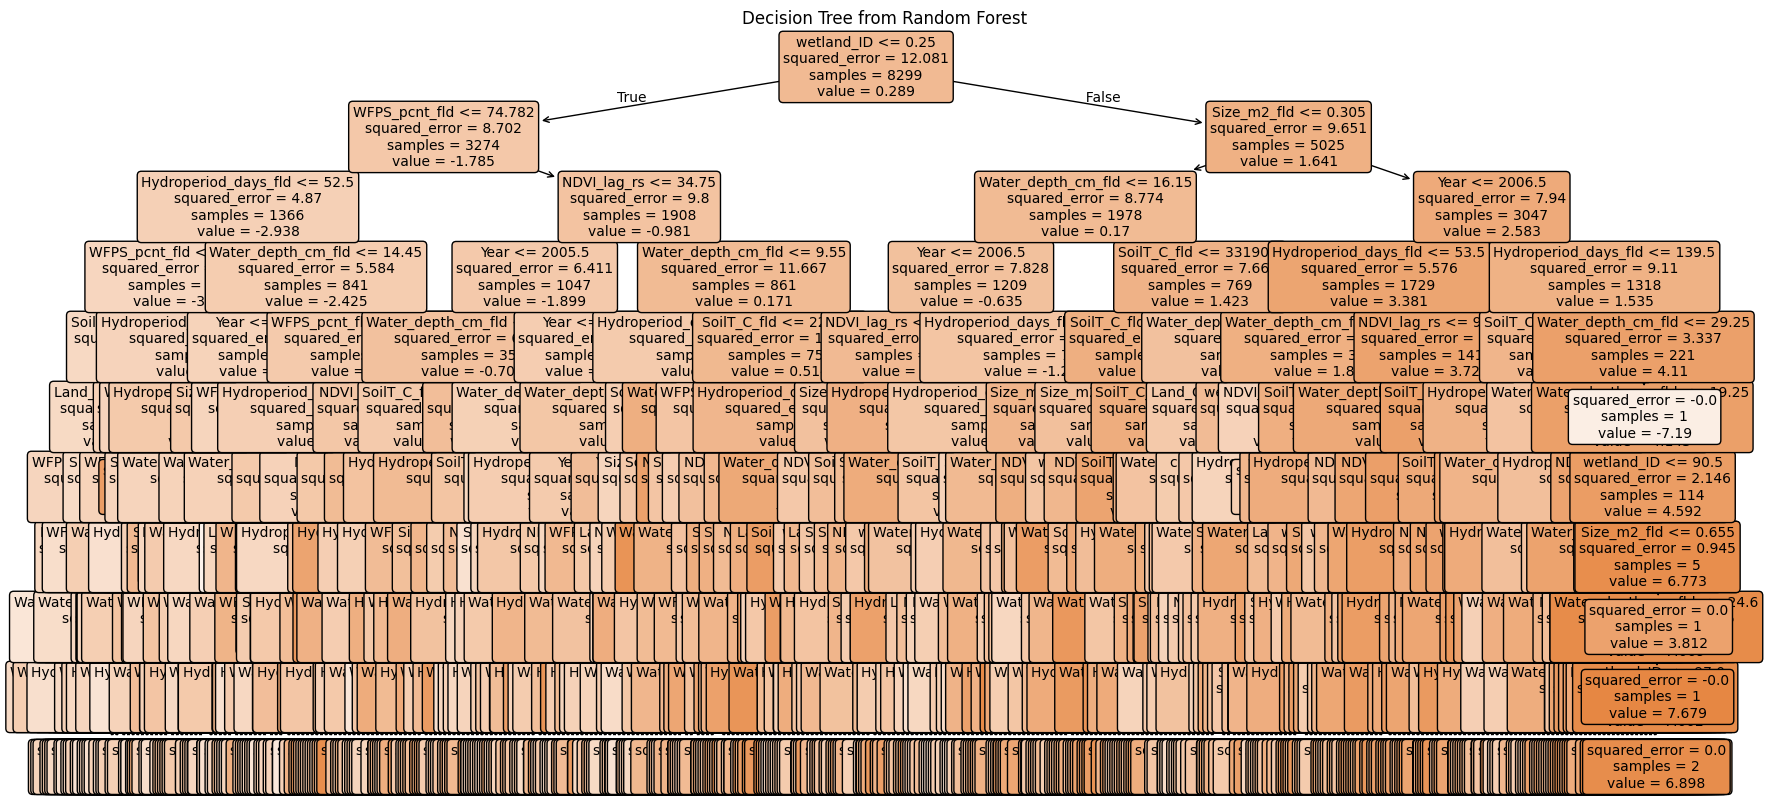

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]

plt.figure(figsize = (20, 10))
plot_tree(tree_to_plot, feature_names = X.columns.tolist(), filled = True, rounded = True, fontsize = 10)
plt.title("Decision Tree from Random Forest")
plt.show()

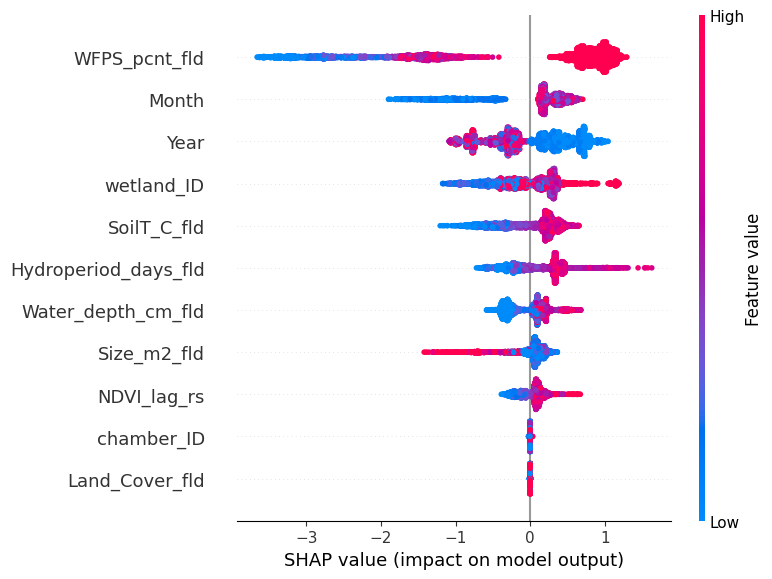

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [16]:
import shap
explainer = shap.Explainer(regressor)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values[0], X_test)

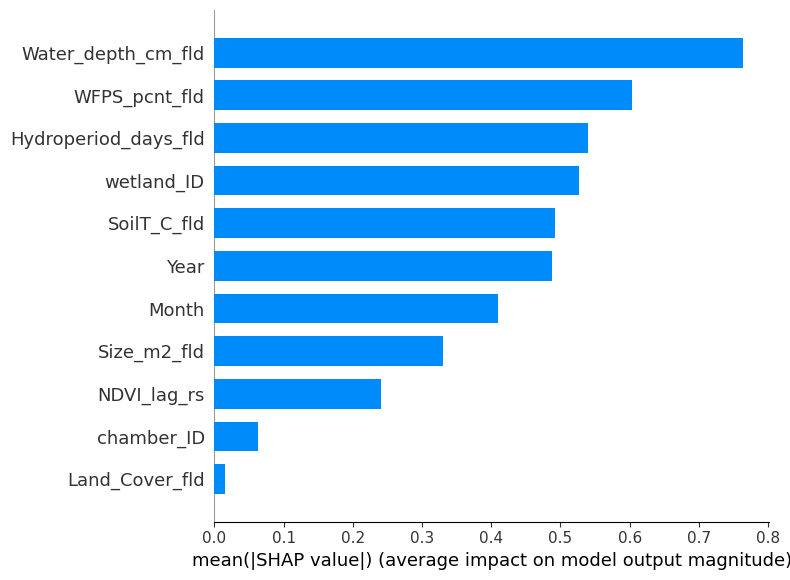

In [57]:
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [74]:
# now switch Month with Season

def month_to_season(numMonth):
    season = (numMonth % 12 // 3 + 1)

    if season == 2:
        # (spring)
        season = 3
    elif season == 3:
        # (summer)
        season = 4
    elif season == 4:
        # (fall)
        season = 2

    return season

df['Season'] = df['Month'].apply(month_to_season)

In [80]:
pos_me_df = df[df['methane_flux_log_mg_m2_hr'] >= 0]

print(len(df))
len(pos_me_df)

18803


9315

In [87]:
X_pos = pos_me_df[['chamber_ID', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Year', 'Season']]

# Converting categorical variables into numerical

x_pos_categorical = X_pos.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_pos_numerical = X_pos.select_dtypes(exclude = ['object'])

x_pos = pd.concat([x_pos_categorical, x_pos_numerical], axis = 1)

# print(x_pos)
print(x_pos.info())

y_pos = pos_me_df['methane_flux_log_mg_m2_hr']

<class 'pandas.core.frame.DataFrame'>
Index: 9315 entries, 0 to 18790
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        9315 non-null   int64  
 1   wetland_ID            9315 non-null   int64  
 2   chamber_ID            9315 non-null   int64  
 3   Hydroperiod_days_fld  9315 non-null   float64
 4   NDVI_lag_rs           9315 non-null   float64
 5   Size_m2_fld           9315 non-null   float64
 6   SoilT_C_fld           9315 non-null   float64
 7   Water_depth_cm_fld    9315 non-null   float64
 8   WFPS_pcnt_fld         9315 non-null   float64
 9   Year                  9315 non-null   int32  
 10  Season                9315 non-null   int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 836.9 KB
None


In [88]:
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(x_pos, y_pos, test_size = 0.3)

In [90]:
# Fitting and Evaluating the Random Forest Model

regressor_pos_methane = RandomForestRegressor(oob_score = True)

regressor_pos_methane.fit(X_pos_train, y_pos_train)

predictions_pos_methane = regressor_pos_methane.predict(X_pos_test)
print(f'R-squared, no max depth, only non-negative methane emissions: {r2_score(y_pos_test, predictions_pos_methane)}')

R-squared, no max depth, only non-negative methane emissions: 0.3676705614214051


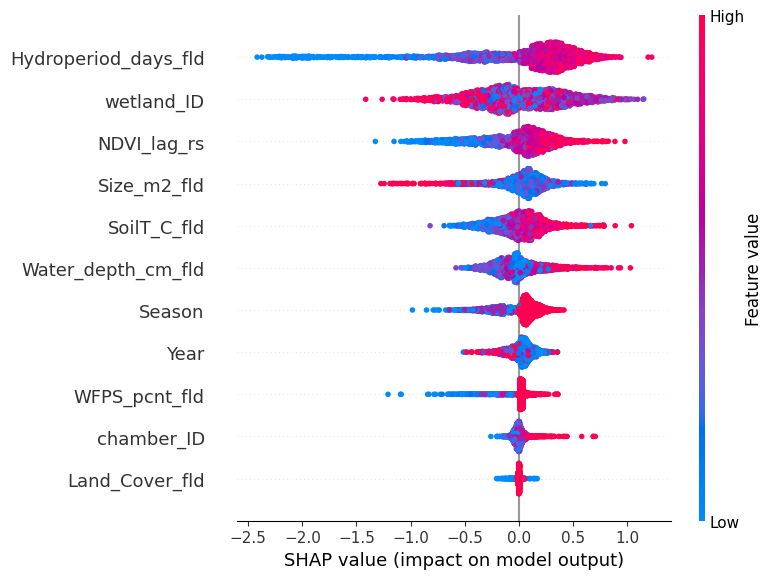

In [91]:
explainer_pos_methane = shap.Explainer(regressor_pos_methane)

shap_values_pos_methane = explainer_pos_methane.shap_values(X_pos_test)
shap.summary_plot(shap_values_pos_methane, X_pos_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   wetland_ID            18803 non-null  int64  
 2   chamber_ID            18803 non-null  int64  
 3   Hydroperiod_days_fld  18803 non-null  float64
 4   NDVI_lag_rs           18803 non-null  float64
 5   Size_m2_fld           18803 non-null  float64
 6   SoilT_C_fld           18803 non-null  float64
 7   Water_depth_cm_fld    18803 non-null  float64
 8   WFPS_pcnt_fld         18803 non-null  float64
 9   Year                  18803 non-null  int32  
 10  Season                18803 non-null  int64  
dtypes: float64(6), int32(1), int64(4)
memory usage: 1.5 MB
None
R-squared, no max depth, season instead of month: 0.6873650146376484


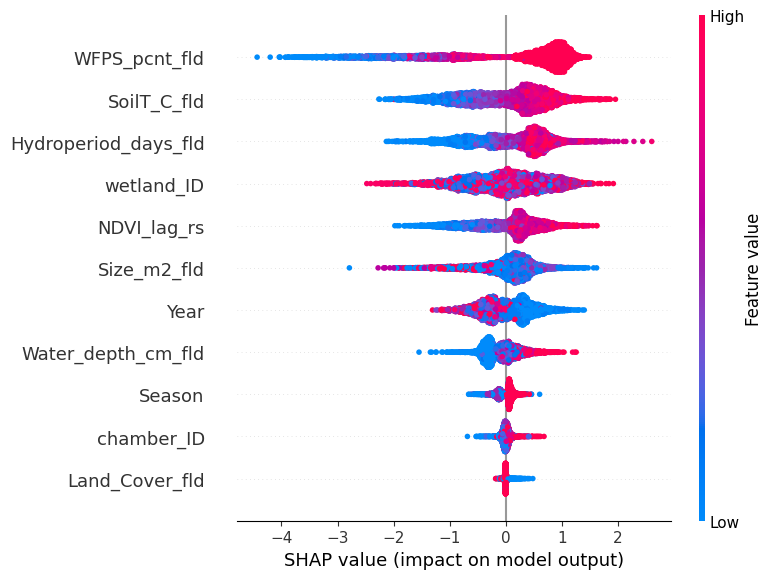

In [93]:
# all data, with season instead of month

X_season = df[['chamber_ID', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Year', 'Season']]

# Converting categorical variables into numerical

x_s_categorical = X_season.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_s_numerical = X_season.select_dtypes(exclude = ['object'])

x_season = pd.concat([x_s_categorical, x_s_numerical], axis = 1)

# print(x_pos)
print(x_season.info())

y_season = df['methane_flux_log_mg_m2_hr']

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(x_season, y_season, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_season = RandomForestRegressor(oob_score = True)

regressor_season.fit(X_s_train, y_s_train)

predictions_season = regressor_season.predict(X_s_test)
print(f'R-squared, no max depth, season instead of month: {r2_score(y_s_test, predictions_season)}')

# SHAP plot
explainer_season = shap.Explainer(regressor_season)

shap_values_season = explainer_season.shap_values(X_s_test)
shap.summary_plot(shap_values_season, X_s_test)

In [99]:
# Pearson Correlation
from scipy import stats

r1 = stats.pearsonr(df['Hydroperiod_days_fld'], df['Water_depth_cm_fld'])

print(r1.statistic)

r2 = stats.pearsonr(df['Hydroperiod_days_fld'], df['WFPS_pcnt_fld'])

print(r2.statistic)

stats.pearsonr(df['Hydroperiod_days_fld'], df['Size_m2_fld'])

print(r1.statistic)

0.70014930869213
0.5333717296028214
0.70014930869213


In [105]:
numeric_cols = ['Hydroperiod_days_fld',
                'Water_depth_cm_fld',
                'NDVI_lag_rs',
                'SoilT_C_fld',
                'WFPS_pcnt_fld',
                'Size_m2_fld']

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        res = stats.pearsonr(df[col1], df[col2])

        print("For " + col1 + " and " + col2 + ":")
        print(f"Pearson correlation coefficiant: {res.statistic}")
        print(f"p-value: {res.pvalue}")

For Hydroperiod_days_fld and Water_depth_cm_fld:
Pearson correlation coefficiant: 0.70014930869213
p-value: 0.0
For Hydroperiod_days_fld and NDVI_lag_rs:
Pearson correlation coefficiant: -0.03498817665253665
p-value: 1.5956325893285566e-06
For Hydroperiod_days_fld and SoilT_C_fld:
Pearson correlation coefficiant: 0.14197384076389227
p-value: 3.0194700211065733e-85
For Hydroperiod_days_fld and WFPS_pcnt_fld:
Pearson correlation coefficiant: 0.5333717296028214
p-value: 0.0
For Hydroperiod_days_fld and Size_m2_fld:
Pearson correlation coefficiant: 0.3013897131106119
p-value: 0.0
For Water_depth_cm_fld and NDVI_lag_rs:
Pearson correlation coefficiant: -0.1751181365032983
p-value: 2.3061774613573947e-129
For Water_depth_cm_fld and SoilT_C_fld:
Pearson correlation coefficiant: 0.1740759358126299
p-value: 7.906236516247905e-128
For Water_depth_cm_fld and WFPS_pcnt_fld:
Pearson correlation coefficiant: 0.472816119001785
p-value: 0.0
For Water_depth_cm_fld and Size_m2_fld:
Pearson correlation c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   wetland_ID            18803 non-null  int64  
 2   chamber_ID            18803 non-null  int64  
 3   Hydroperiod_days_fld  18803 non-null  float64
 4   NDVI_lag_rs           18803 non-null  float64
 5   Size_m2_fld           18803 non-null  float64
 6   SoilT_C_fld           18803 non-null  float64
 7   WFPS_pcnt_fld         18803 non-null  float64
 8   Year                  18803 non-null  int32  
 9   Season                18803 non-null  int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 1.4 MB
None
R-squared, no max depth, season instead of month: 0.6982948025533943


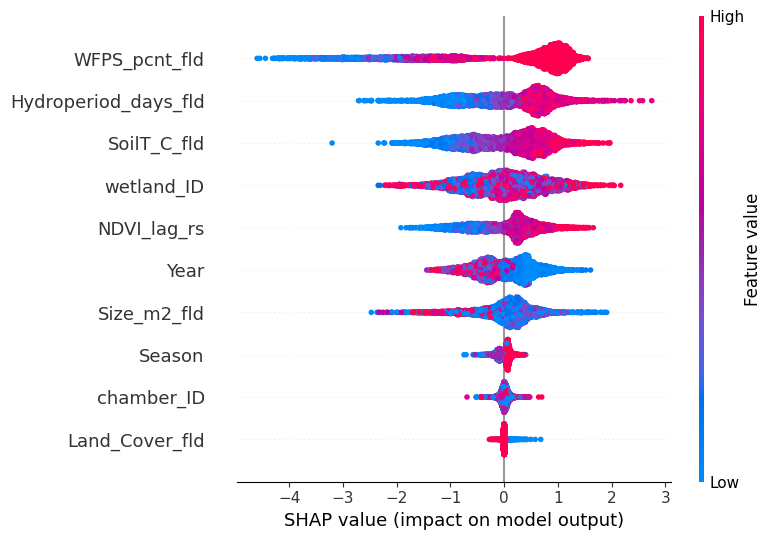

In [109]:
# model with only hydroperiod, and not water table height

X_2 = df[['chamber_ID', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Year', 'Season']]

# Converting categorical variables into numerical

x_2_categorical = X_2.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_2_numerical = X_2.select_dtypes(exclude = ['object'])

x_2 = pd.concat([x_2_categorical, x_2_numerical], axis = 1)

# print(x_pos)
print(x_2.info())

y_2 = df['methane_flux_log_mg_m2_hr']

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_2 = RandomForestRegressor(oob_score = True)

regressor_2.fit(X_2_train, y_2_train)

predictions_2 = regressor_2.predict(X_2_test)
print(f'R-squared, no max depth, season instead of month: {r2_score(y_2_test, predictions_2)}')

# SHAP plot
explainer_2 = shap.Explainer(regressor_2)

shap_values_2 = explainer_2.shap_values(X_2_test)
shap.summary_plot(shap_values_2, X_2_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   wetland_ID            18803 non-null  int64  
 2   chamber_ID            18803 non-null  int64  
 3   Hydroperiod_days_fld  18803 non-null  float64
 4   NDVI_lag_rs           18803 non-null  float64
 5   Size_m2_fld           18803 non-null  float64
 6   SoilT_C_fld           18803 non-null  float64
 7   WFPS_pcnt_fld         18803 non-null  float64
 8   Year                  18803 non-null  int32  
 9   Month                 18803 non-null  int32  
dtypes: float64(5), int32(2), int64(3)
memory usage: 1.3 MB
None
R-squared, no max depth, season instead of month: 0.6985734196452287


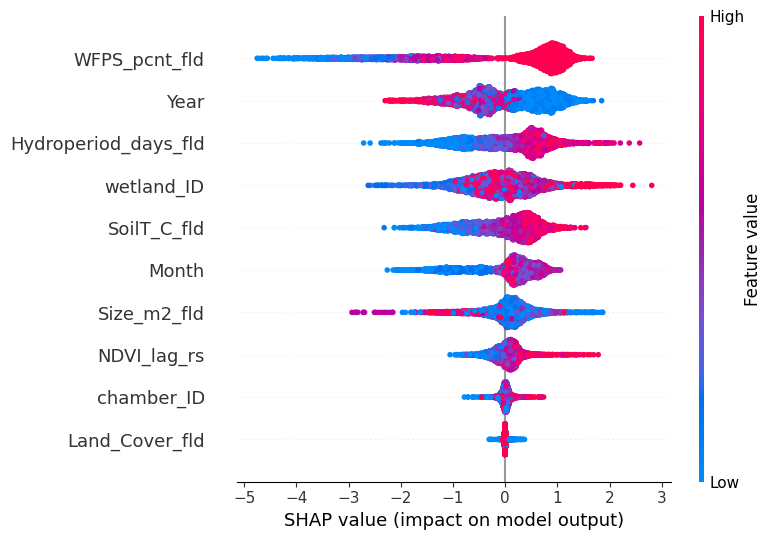

In [111]:
# model with only hydroperiod, and not water table height, month instead of season

X_2_month = df[['chamber_ID', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Year', 'Month']]

# Converting categorical variables into numerical

x_2_month_categorical = X_2_month.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_2_month_numerical = X_2_month.select_dtypes(exclude = ['object'])

x_2_month = pd.concat([x_2_month_categorical, x_2_month_numerical], axis = 1)

# print(x_pos)
print(x_2_month.info())

y_2_month = df['methane_flux_log_mg_m2_hr']

X_2_month_train, X_2_month_test, y_2_month_train, y_2_month_test = train_test_split(x_2_month, y_2_month, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_2_month = RandomForestRegressor(oob_score = True)

regressor_2_month.fit(X_2_month_train, y_2_month_train)

predictions_2_month = regressor_2_month.predict(X_2_month_test)
print(f'R-squared, no max depth, season instead of month: {r2_score(y_2_month_test, predictions_2_month)}')

# SHAP plot
explainer_2_month = shap.Explainer(regressor_2_month)

shap_values_2_month = explainer_2_month.shap_values(X_2_month_test)
shap.summary_plot(shap_values_2_month, X_2_month_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Land_Cover_fld      18803 non-null  int64  
 1   wetland_ID          18803 non-null  int64  
 2   chamber_ID          18803 non-null  int64  
 3   NDVI_lag_rs         18803 non-null  float64
 4   Size_m2_fld         18803 non-null  float64
 5   SoilT_C_fld         18803 non-null  float64
 6   Water_depth_cm_fld  18803 non-null  float64
 7   WFPS_pcnt_fld       18803 non-null  float64
 8   Year                18803 non-null  int32  
 9   Season              18803 non-null  int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 1.4 MB
None
R-squared, no max depth, season instead of month: 0.6860257537039485


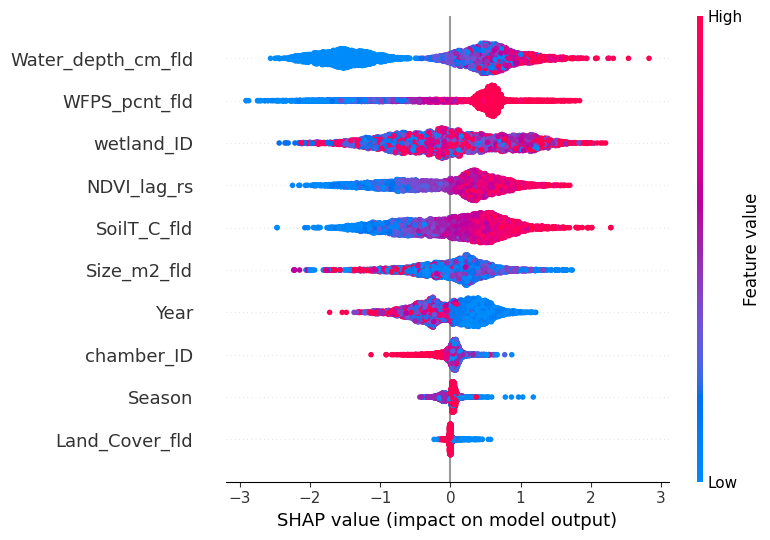

In [112]:
# model with only water table height, and not hydroperiod

X_3 = df[['chamber_ID', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Year', 'Season']]

# Converting categorical variables into numerical

x_3_categorical = X_3.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_3_numerical = X_3.select_dtypes(exclude = ['object'])

x_3 = pd.concat([x_3_categorical, x_3_numerical], axis = 1)

# print(x_pos)
print(x_3.info())

y_3 = df['methane_flux_log_mg_m2_hr']

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(x_3, y_3, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_3 = RandomForestRegressor(oob_score = True)

regressor_3.fit(X_3_train, y_3_train)

predictions_3 = regressor_3.predict(X_3_test)
print(f'R-squared, no max depth, season instead of month: {r2_score(y_3_test, predictions_3)}')

# SHAP plot
explainer_3 = shap.Explainer(regressor_3)

shap_values_3 = explainer_3.shap_values(X_3_test)
shap.summary_plot(shap_values_3, X_3_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Land_Cover_fld      18803 non-null  int64  
 1   wetland_ID          18803 non-null  int64  
 2   chamber_ID          18803 non-null  int64  
 3   NDVI_lag_rs         18803 non-null  float64
 4   Size_m2_fld         18803 non-null  float64
 5   SoilT_C_fld         18803 non-null  float64
 6   Water_depth_cm_fld  18803 non-null  float64
 7   WFPS_pcnt_fld       18803 non-null  float64
 8   Year                18803 non-null  int32  
 9   Month               18803 non-null  int32  
dtypes: float64(5), int32(2), int64(3)
memory usage: 1.3 MB
None
R-squared, no max depth, season instead of month: 0.6757889962341487


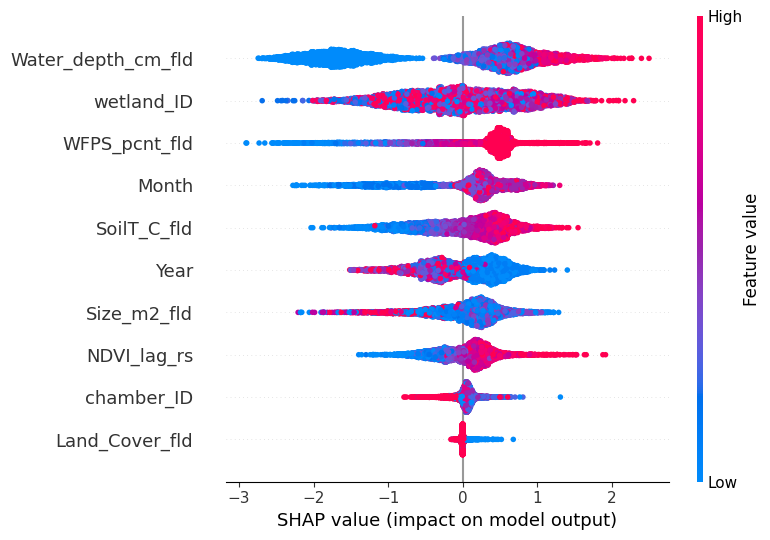

In [114]:
# model with only water table height, and not hydroperiod, and month instead of season

X_3_month = df[['chamber_ID', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
       'wetland_ID', 'WFPS_pcnt_fld', 'Year', 'Month']]

# Converting categorical variables into numerical

x_3_month_categorical = X_3_month.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_3_month_numerical = X_3_month.select_dtypes(exclude = ['object'])

x_3_month = pd.concat([x_3_month_categorical, x_3_month_numerical], axis = 1)

# print(x_pos)
print(x_3_month.info())

y_3_month = df['methane_flux_log_mg_m2_hr']

X_3_month_train, X_3_month_test, y_3_month_train, y_3_month_test = train_test_split(x_3_month, y_3_month, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_3_month = RandomForestRegressor(oob_score = True)

regressor_3_month.fit(X_3_month_train, y_3_month_train)

predictions_3_month = regressor_3_month.predict(X_3_month_test)
print(f'R-squared, no max depth, season instead of month: {r2_score(y_3_month_test, predictions_3_month)}')

# SHAP plot
explainer_3_month = shap.Explainer(regressor_3_month)

shap_values_3_month = explainer_3_month.shap_values(X_3_month_test)
shap.summary_plot(shap_values_3_month, X_3_month_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


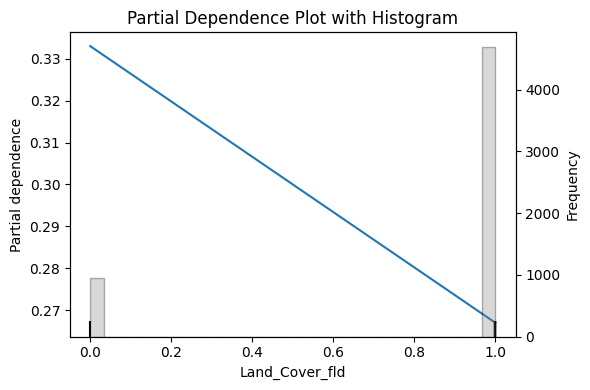

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


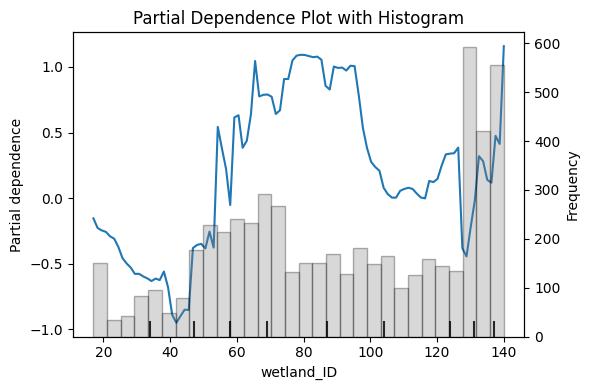

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


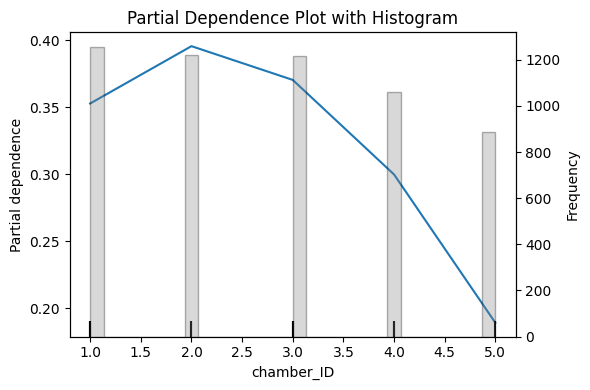

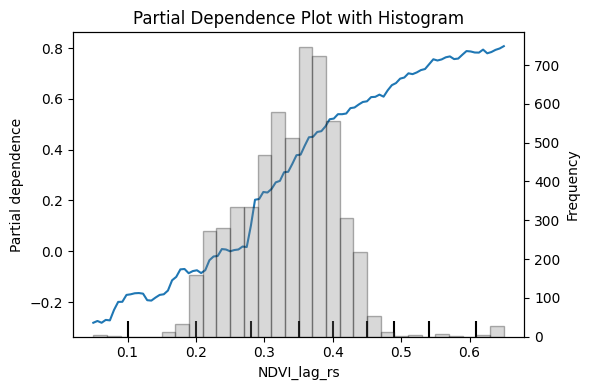

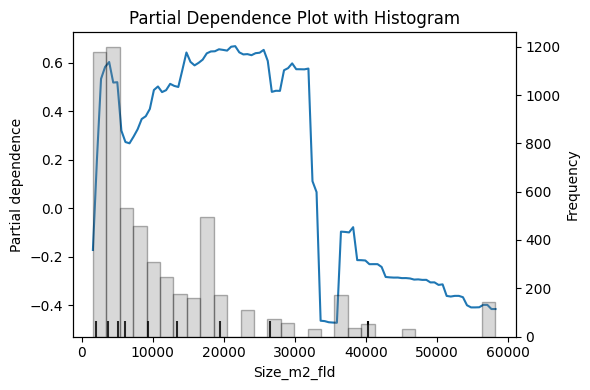

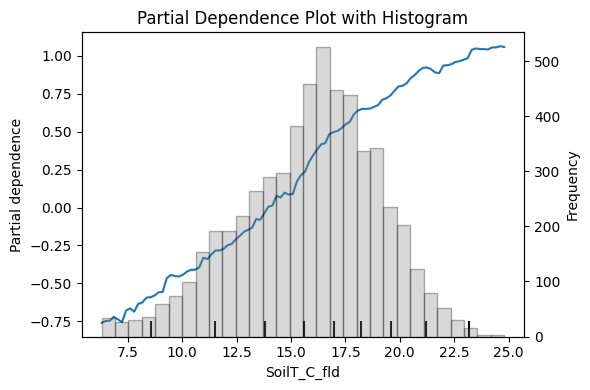

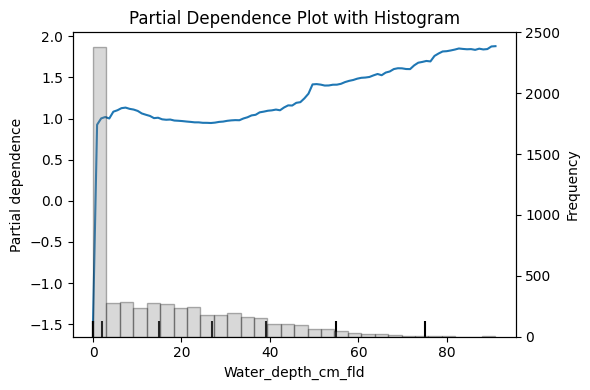

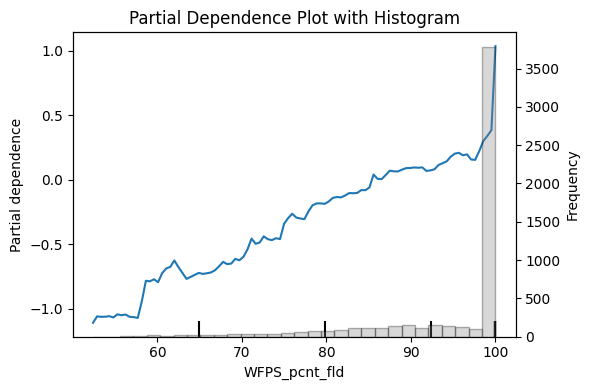

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 8 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


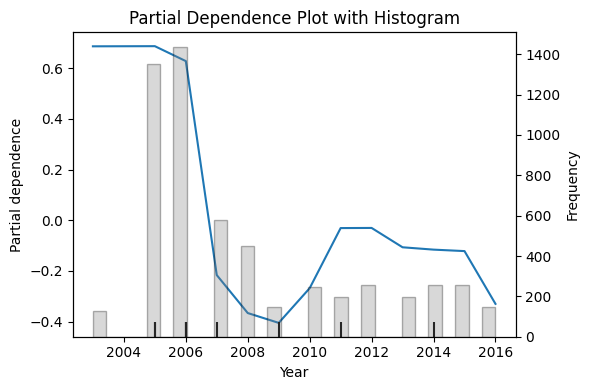

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 9 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


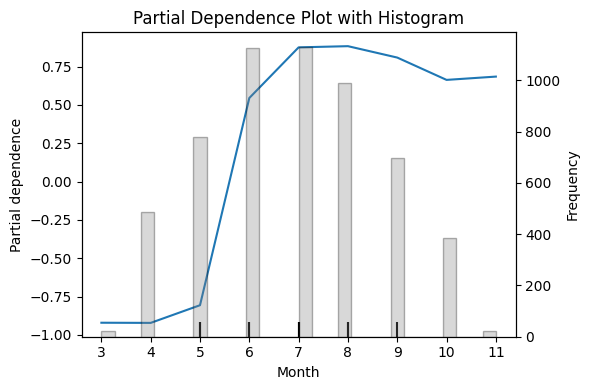

In [243]:
all_pdps(regressor_3_month, X_3_month_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   Hydroperiod_days_fld  18803 non-null  float64
 2   NDVI_lag_rs           18803 non-null  float64
 3   Size_m2_fld           18803 non-null  float64
 4   SoilT_C_fld           18803 non-null  float64
 5   Water_depth_cm_fld    18803 non-null  float64
 6   WFPS_pcnt_fld         18803 non-null  float64
 7   Year                  18803 non-null  int32  
 8   Season                18803 non-null  int64  
dtypes: float64(6), int32(1), int64(2)
memory usage: 1.2 MB
None
R-squared, no max depth, no IDs, season instead of month: 0.667530866250011


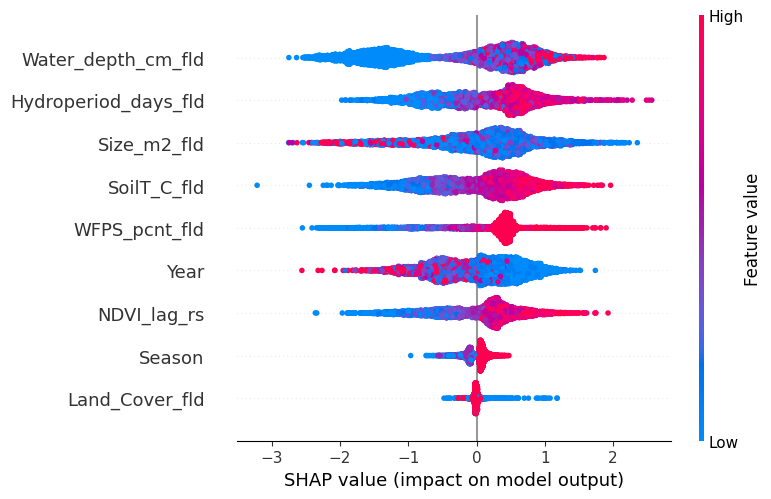

In [115]:
# now with no chamber or wetland ID; season instead of month
X_noID_s = df[['Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Year', 'Season']]
y_noID_s = df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_noID_s_categorical = X_noID_s.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_noID_s_numerical = X_noID_s.select_dtypes(exclude = ['object'])

x_noID_s = pd.concat([x_noID_s_categorical, x_noID_s_numerical], axis = 1)

# print(x_pos)
print(x_noID_s.info())

X_noID_s_train, X_noID_s_test, y_noID_s_train, y_noID_s_test = train_test_split(x_noID_s, y_noID_s, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_noID_s = RandomForestRegressor(oob_score = True)

regressor_noID_s.fit(X_noID_s_train, y_noID_s_train)

predictions_noID_s = regressor_noID_s.predict(X_noID_s_test)
print(f'R-squared, no max depth, no IDs, season instead of month: {r2_score(y_noID_s_test, predictions_noID_s)}')

# SHAP plot
explainer_noID_s = shap.Explainer(regressor_noID_s)

shap_values_noID_s = explainer_noID_s.shap_values(X_noID_s_test)
shap.summary_plot(shap_values_noID_s, X_noID_s_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   Hydroperiod_days_fld  18803 non-null  float64
 2   NDVI_lag_rs           18803 non-null  float64
 3   Size_m2_fld           18803 non-null  float64
 4   SoilT_C_fld           18803 non-null  float64
 5   Water_depth_cm_fld    18803 non-null  float64
 6   WFPS_pcnt_fld         18803 non-null  float64
 7   Year                  18803 non-null  int32  
 8   Month                 18803 non-null  int32  
dtypes: float64(6), int32(2), int64(1)
memory usage: 1.1 MB
None
R-squared, no max depth, no IDs, month instead of season: 0.6699532746170296


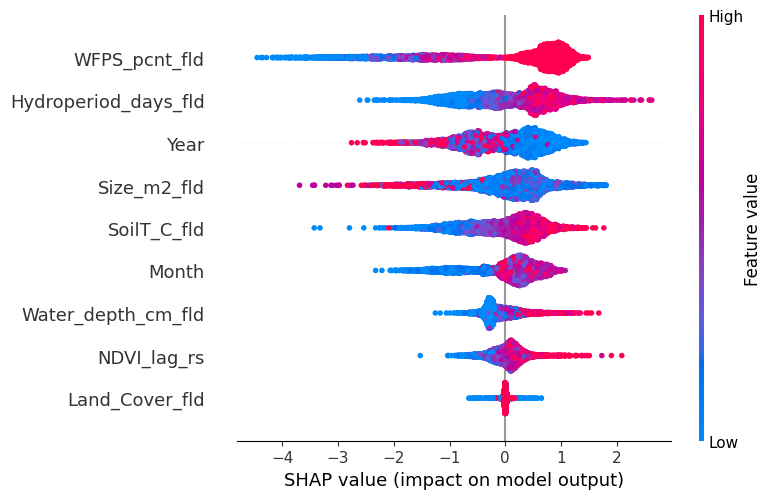

In [116]:
# now with no chamber or wetland ID; season instead of month
X_noID_m = df[['Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Year', 'Month']]
y_noID_m = df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_noID_m_categorical = X_noID_m.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_noID_m_numerical = X_noID_m.select_dtypes(exclude = ['object'])

x_noID_m = pd.concat([x_noID_m_categorical, x_noID_m_numerical], axis = 1)

# print(x_pos)
print(x_noID_m.info())

X_noID_m_train, X_noID_m_test, y_noID_m_train, y_noID_m_test = train_test_split(x_noID_m, y_noID_m, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_noID_m = RandomForestRegressor(oob_score = True)

regressor_noID_m.fit(X_noID_m_train, y_noID_m_train)

predictions_noID_m = regressor_noID_m.predict(X_noID_m_test)
print(f'R-squared, no max depth, no IDs, month instead of season: {r2_score(y_noID_m_test, predictions_noID_m)}')

# SHAP plot
explainer_noID_m = shap.Explainer(regressor_noID_m)

shap_values_noID_m = explainer_noID_m.shap_values(X_noID_m_test)
shap.summary_plot(shap_values_noID_m, X_noID_m_test)

In [21]:
# Starting partial dependence plots
from sklearn.inspection import PartialDependenceDisplay

features = [0, 1, 2]
PartialDependenceDisplay.from_estimator(regressor_noID_m, X_noID_m_test, features)

features = [3, 4, 5]
PartialDependenceDisplay.from_estimator(regressor_noID_m, X_noID_m_test, features)

features = [6, 7, 8]
PartialDependenceDisplay.from_estimator(regressor_noID_m, X_noID_m_test, features)

NameError: name 'regressor_noID_m' is not defined

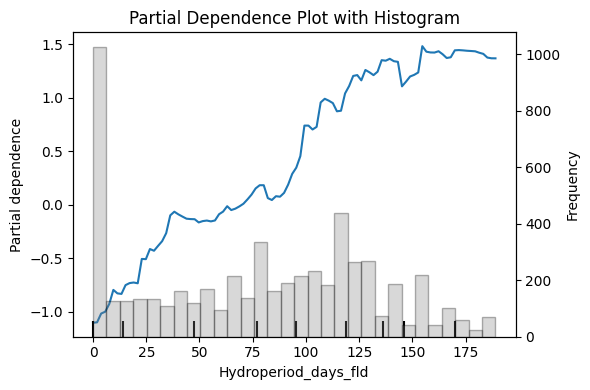

In [143]:
feature = [1]

fig, ax = plt.subplots(figsize = (6, 4))
PartialDependenceDisplay.from_estimator(regressor_noID_m, X_noID_m_test, feature, ax = ax, kind = "average")

colName = X_noID_m_test.columns[feature[0]]

# add histogram
ax_hist = ax.twinx()
# ax_hist.hist(X_noID_m_test[:, feature[0]], bins = 10, alpha = 0.3, color = 'blue', edgecolor = 'black')
ax_hist.hist(X_noID_m_test[colName].values, bins = 30, alpha = 0.3, color = 'grey', edgecolor = 'black')
ax_hist.set_ylabel("Frequency", color = 'black')

plt.title("Partial Dependence Plot with Histogram")
plt.tight_layout()
plt.show()

In [127]:
X_noID_m_test["Hydroperiod_days_fld"].values

array([ 84. , 160.5,  28. , ..., 166.5, 116. ,   7. ], shape=(5641,))

In [19]:
def all_pdps(model, X_test):
    for i in range(len(X_test.columns)):
        feature_index = i
        colName = X_test.columns[feature_index]

        # print(colName)

        ig, ax = plt.subplots(figsize = (6, 4))
        PartialDependenceDisplay.from_estimator(model, X_test, [feature_index], ax = ax, kind = "average")
        
        # add histogram
        ax_hist = ax.twinx()
        # ax_hist.hist(X_noID_m_test[:, feature[0]], bins = 10, alpha = 0.3, color = 'blue', edgecolor = 'black')
        ax_hist.hist(X_test[colName].values, bins = 30, alpha = 0.3, color = 'grey', edgecolor = 'black')
        ax_hist.set_ylabel("Frequency", color = 'black')
        
        plt.title("Partial Dependence Plot with Histogram")
        plt.tight_layout()
        plt.show()

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


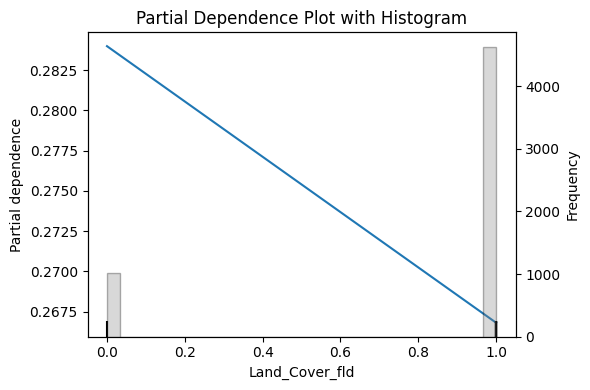

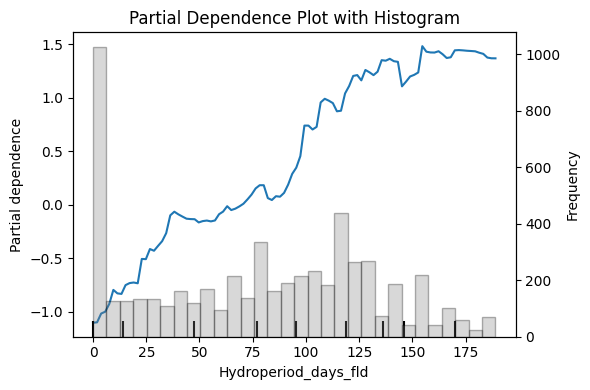

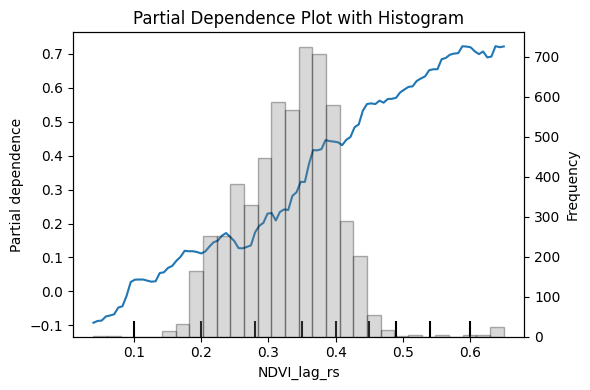

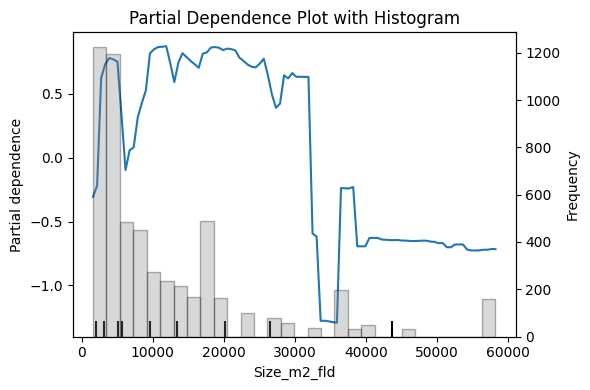

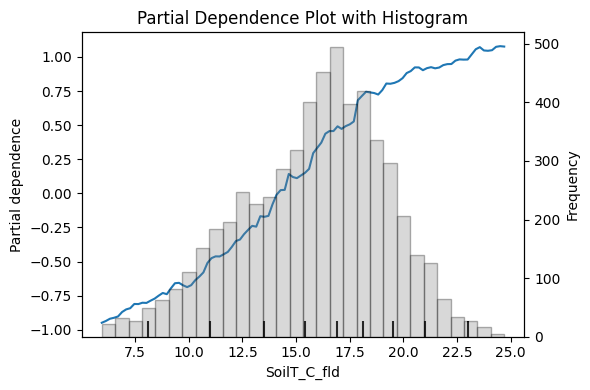

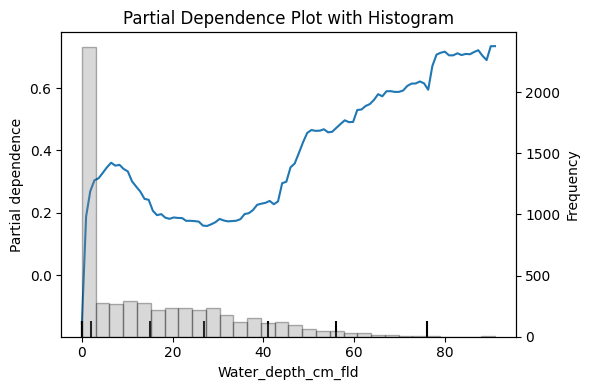

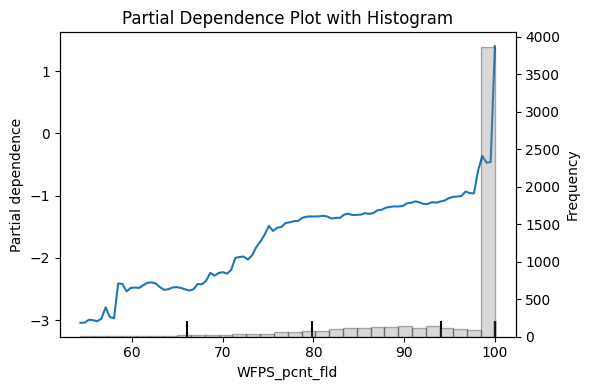

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


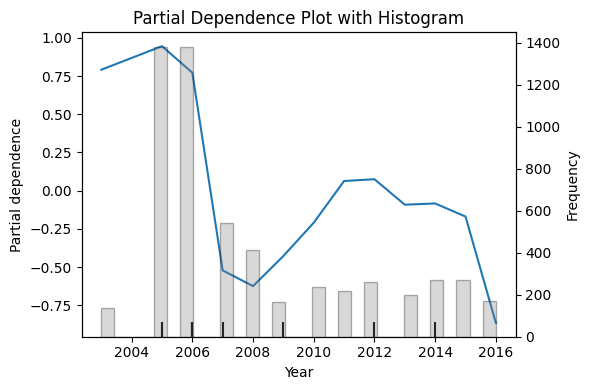

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 8 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


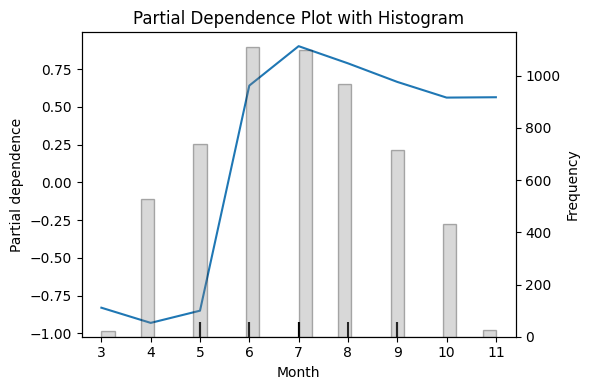

In [145]:
all_pdps(regressor_noID_m, X_noID_m_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


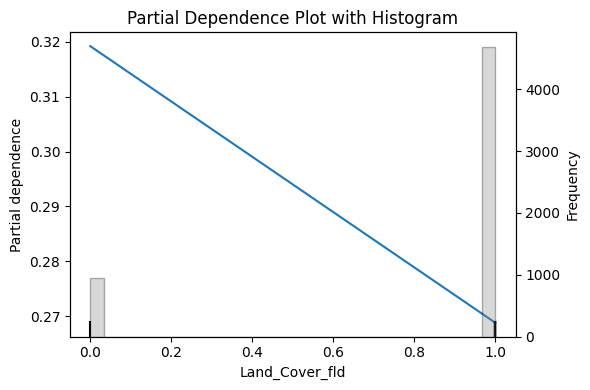

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


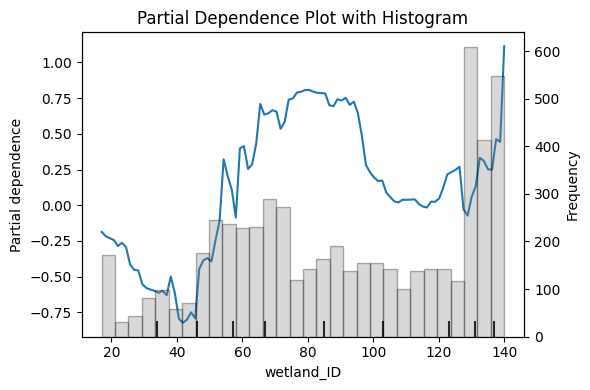

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


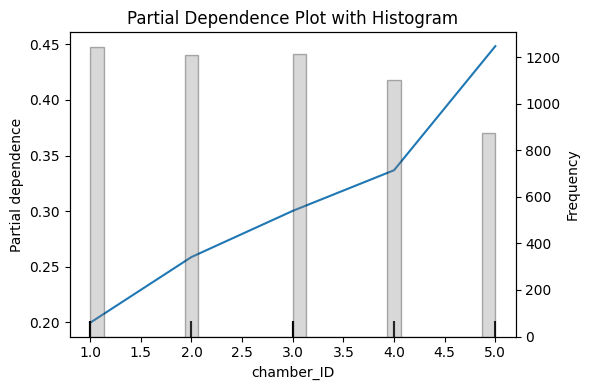

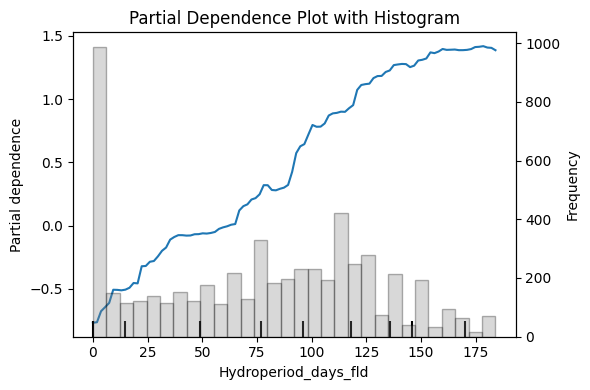

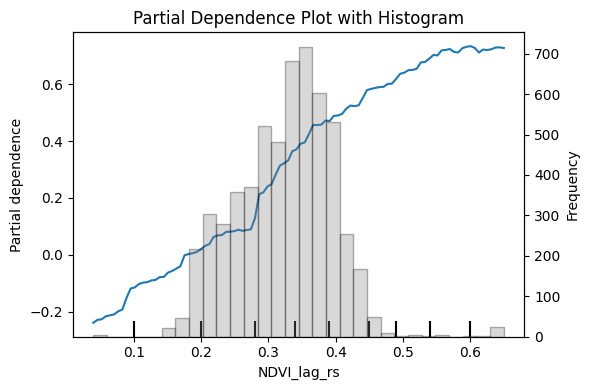

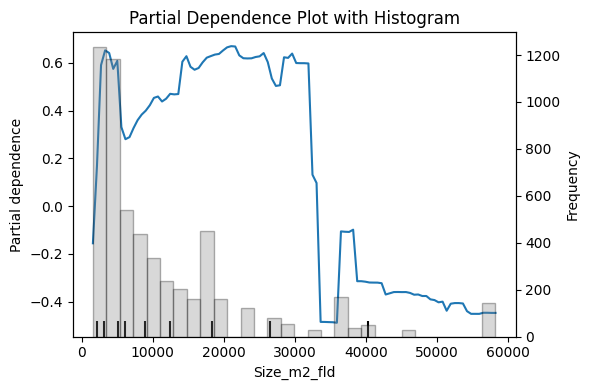

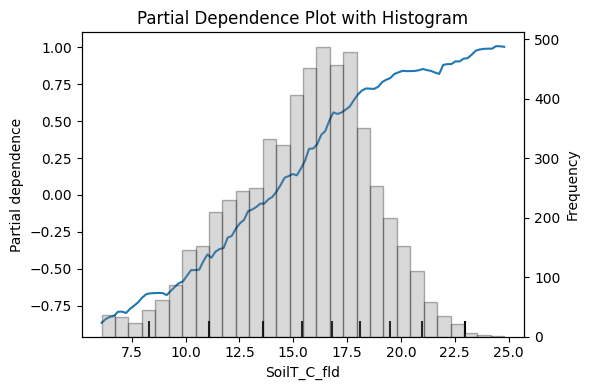

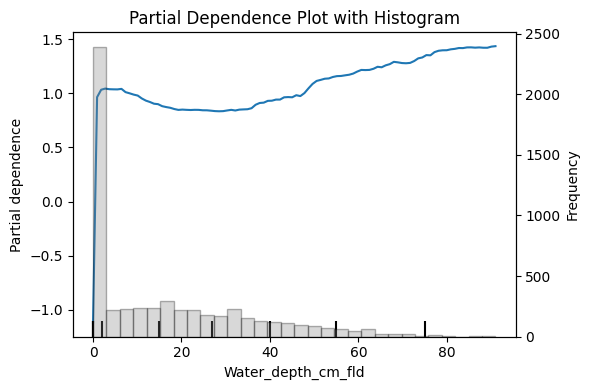

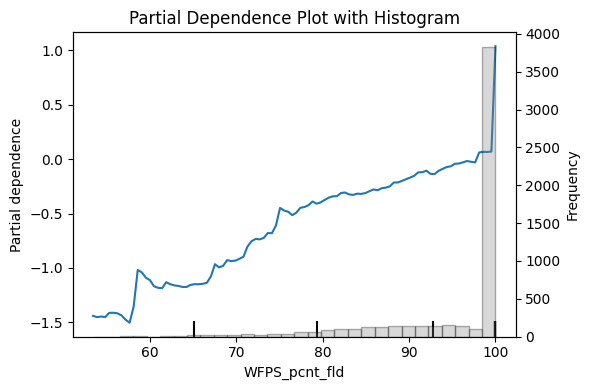

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 9 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


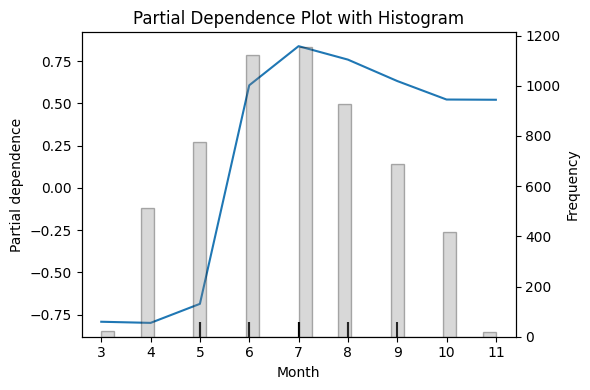

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 10 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


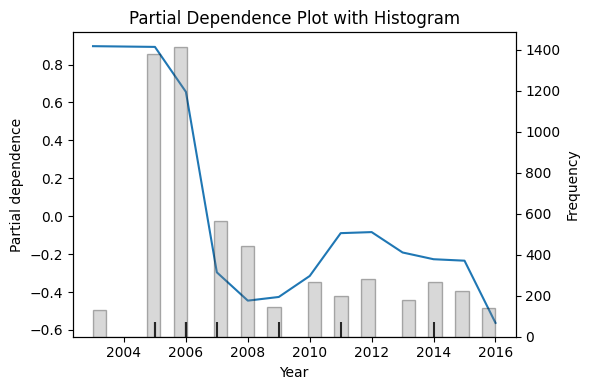

In [146]:
all_pdps(regressor, X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   wetland_ID            18803 non-null  int64  
 2   Hydroperiod_days_fld  18803 non-null  float64
 3   NDVI_lag_rs           18803 non-null  float64
 4   Size_m2_fld           18803 non-null  float64
 5   SoilT_C_fld           18803 non-null  float64
 6   Water_depth_cm_fld    18803 non-null  float64
 7   WFPS_pcnt_fld         18803 non-null  float64
 8   Month                 18803 non-null  int32  
 9   chamber_ID            18803 non-null  int64  
dtypes: float64(6), int32(1), int64(3)
memory usage: 1.4 MB
None
R-squared, no max depth, no year: 0.6747231422391946


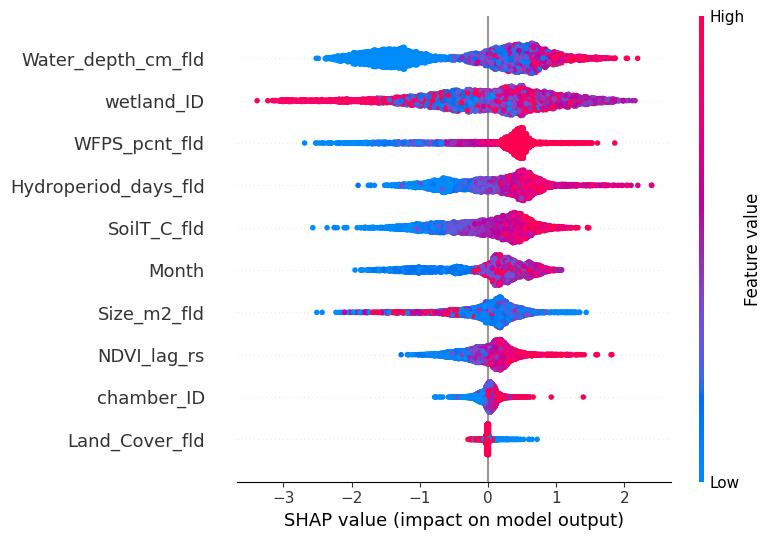

In [147]:
# train a model without year, all emissions
X_noyr = df[['Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'chamber_ID', 'wetland_ID']]
y_noyr = df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_noyr_categorical = X_noyr.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_noyr_numerical = X_noyr.select_dtypes(exclude = ['object'])

x_noyr = pd.concat([x_noyr_categorical, x_noyr_numerical], axis = 1)

# print(x_pos)
print(x_noyr.info())

X_noyr_train, X_noyr_test, y_noyr_train, y_noyr_test = train_test_split(x_noyr, y_noyr, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_noyr = RandomForestRegressor(oob_score = True)

regressor_noyr.fit(X_noyr_train, y_noyr_train)

predictions_noyr = regressor_noyr.predict(X_noyr_test)
print(f'R-squared, no max depth, no year: {r2_score(y_noyr_test, predictions_noyr)}')

# SHAP plot
explainer_noyr = shap.Explainer(regressor_noyr)

shap_values_noyr = explainer_noyr.shap_values(X_noyr_test)
shap.summary_plot(shap_values_noyr, X_noyr_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


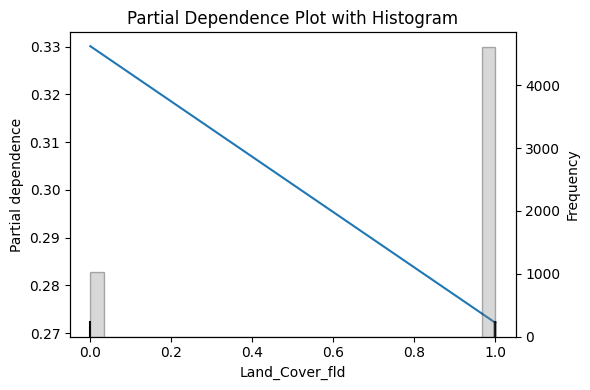

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


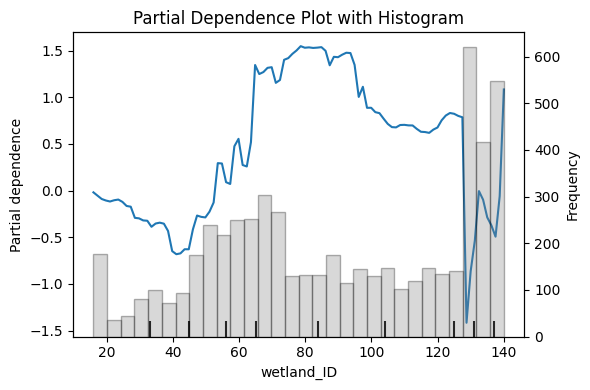

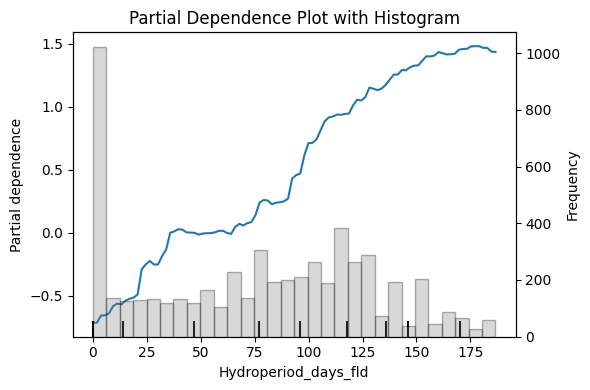

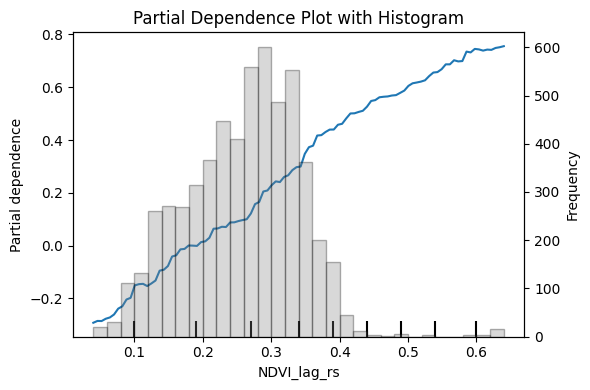

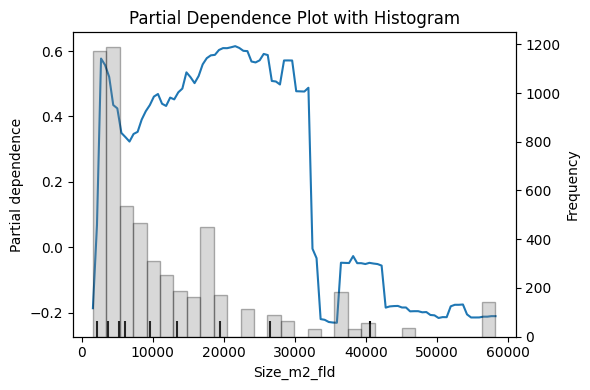

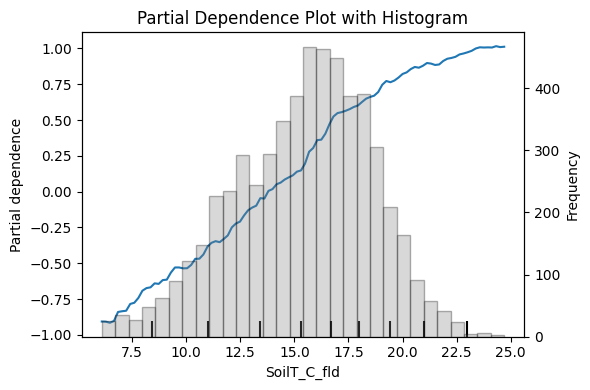

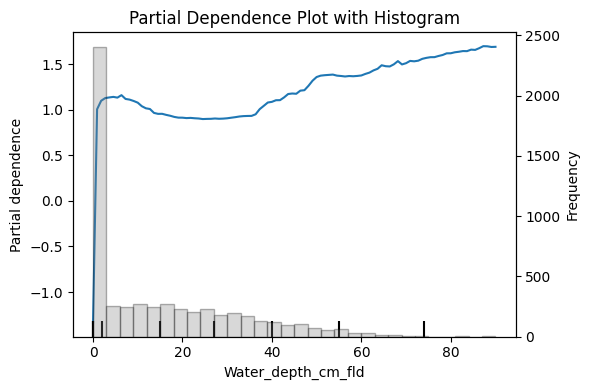

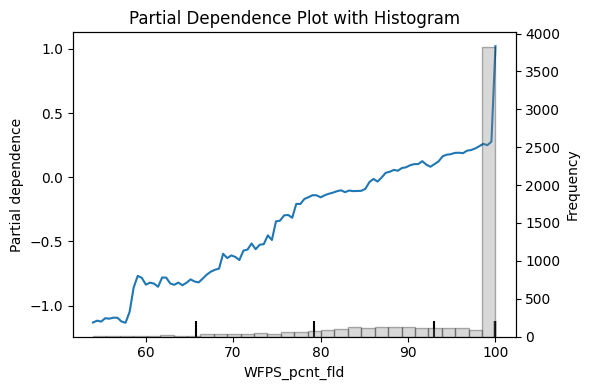

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 8 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


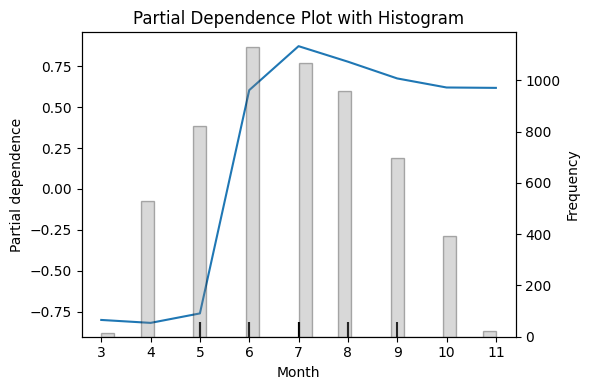

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 9 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


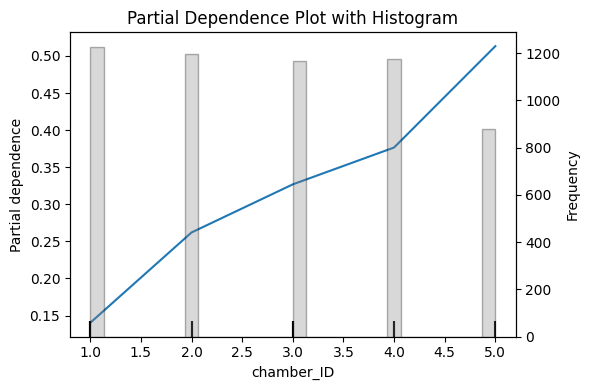

In [148]:
all_pdps(regressor_noyr, X_noyr_test)

<class 'pandas.core.frame.DataFrame'>
Index: 9315 entries, 0 to 18790
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        9315 non-null   int64  
 1   wetland_ID            9315 non-null   int64  
 2   Hydroperiod_days_fld  9315 non-null   float64
 3   NDVI_lag_rs           9315 non-null   float64
 4   Size_m2_fld           9315 non-null   float64
 5   SoilT_C_fld           9315 non-null   float64
 6   Water_depth_cm_fld    9315 non-null   float64
 7   WFPS_pcnt_fld         9315 non-null   float64
 8   Month                 9315 non-null   int32  
 9   chamber_ID            9315 non-null   int64  
dtypes: float64(6), int32(1), int64(3)
memory usage: 764.1 KB
None
R-squared, no max depth, no year, only positive emissions: 0.36968119925724263


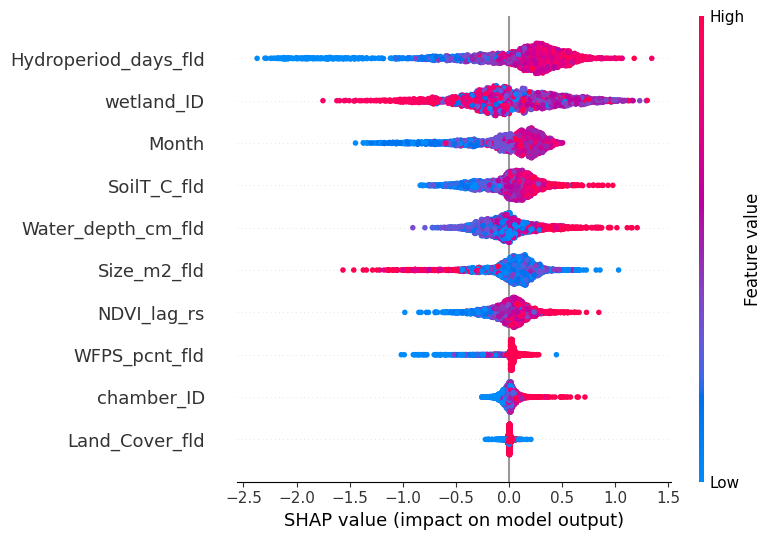

In [149]:
# model without year, and only positive emissions
X_noyr_pos = pos_me_df[['Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'chamber_ID', 'wetland_ID']]
y_noyr_pos = pos_me_df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_noyr_pos_categorical = X_noyr_pos.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_noyr_pos_numerical = X_noyr_pos.select_dtypes(exclude = ['object'])

x_noyr_pos = pd.concat([x_noyr_pos_categorical, x_noyr_pos_numerical], axis = 1)

# print(x_pos)
print(x_noyr_pos.info())

X_noyr_pos_train, X_noyr_pos_test, y_noyr_pos_train, y_noyr_pos_test = train_test_split(x_noyr_pos, y_noyr_pos, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_noyr_pos = RandomForestRegressor(oob_score = True)

regressor_noyr_pos.fit(X_noyr_pos_train, y_noyr_pos_train)

predictions_noyr_pos = regressor_noyr_pos.predict(X_noyr_pos_test)
print(f'R-squared, no max depth, no year, only positive emissions: {r2_score(y_noyr_pos_test, predictions_noyr_pos)}')

# SHAP plot
explainer_noyr_pos = shap.Explainer(regressor_noyr_pos)

shap_values_noyr_pos = explainer_noyr_pos.shap_values(X_noyr_pos_test)
shap.summary_plot(shap_values_noyr_pos, X_noyr_pos_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


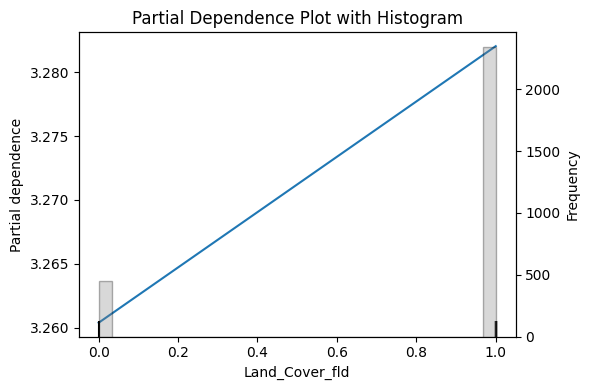

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


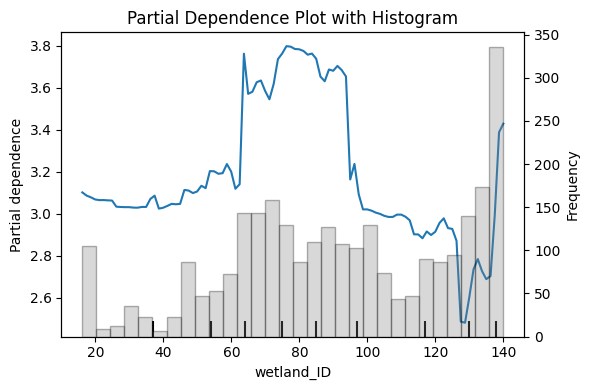

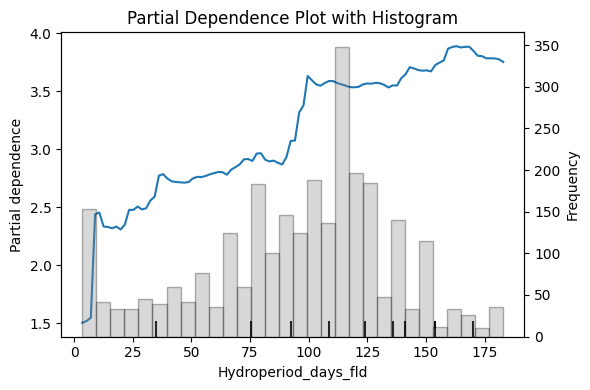

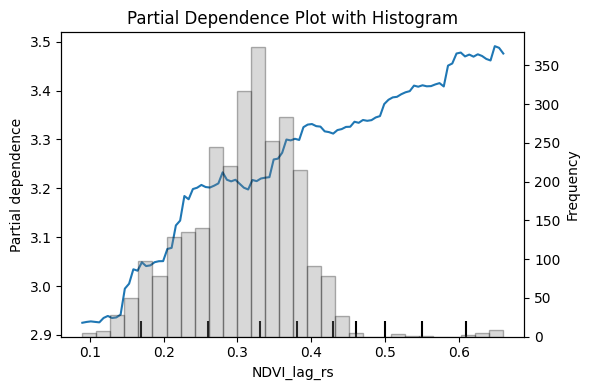

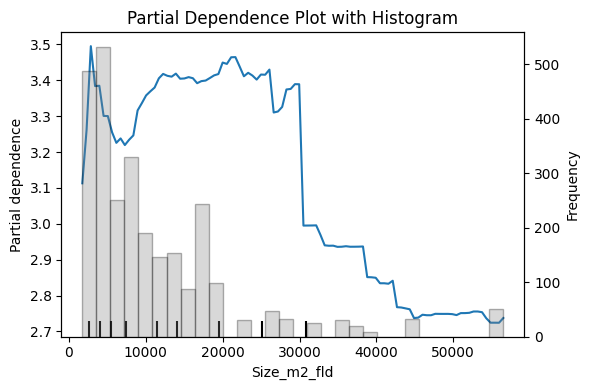

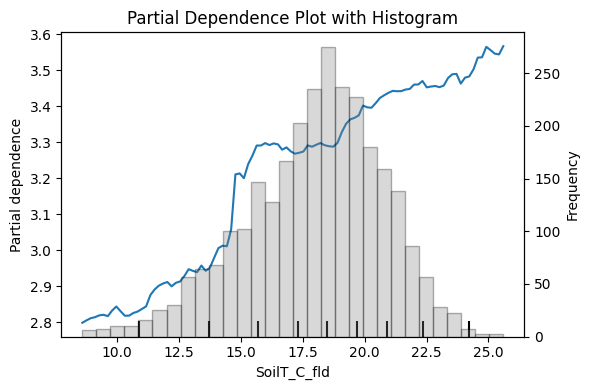

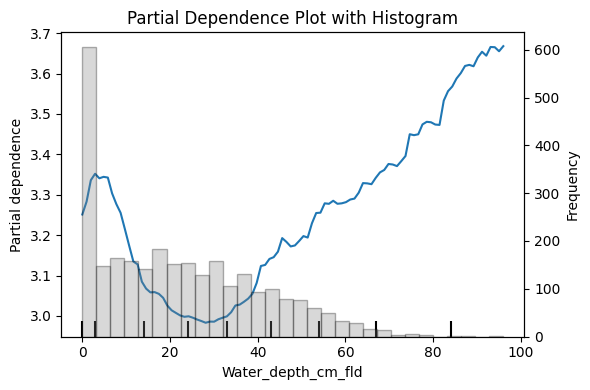

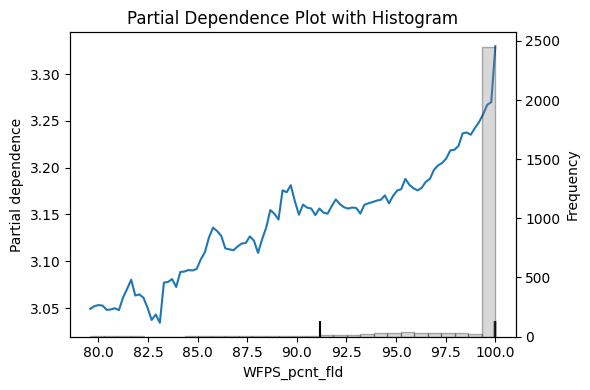

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 8 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


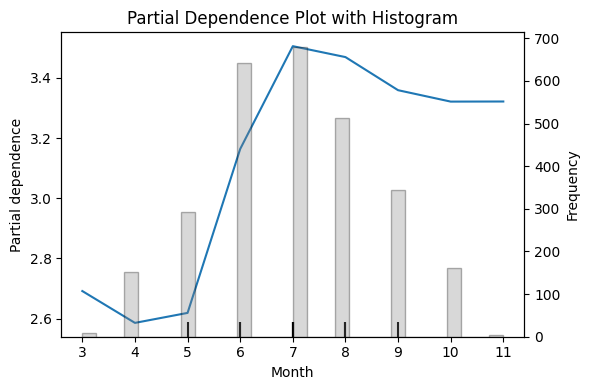

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 9 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


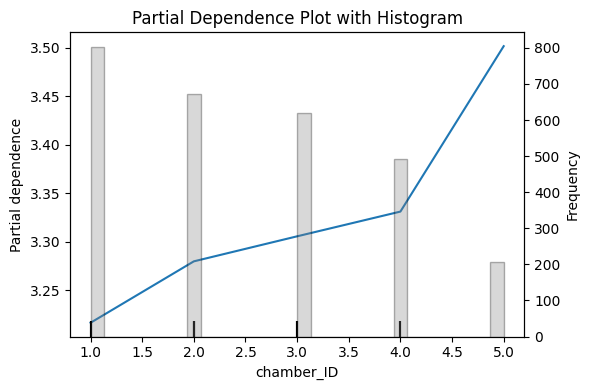

In [150]:
all_pdps(regressor_noyr_pos, X_noyr_pos_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   wetland_ID            18803 non-null  int64  
 2   Hydroperiod_days_fld  18803 non-null  float64
 3   NDVI_lag_rs           18803 non-null  float64
 4   Size_m2_fld           18803 non-null  float64
 5   SoilT_C_fld           18803 non-null  float64
 6   Water_depth_cm_fld    18803 non-null  float64
 7   WFPS_pcnt_fld         18803 non-null  float64
 8   Month                 18803 non-null  int32  
 9   chamber_ID            18803 non-null  int64  
 10  Year                  18803 non-null  int32  
dtypes: float64(6), int32(2), int64(3)
memory usage: 1.4 MB
None
R-squared, no max depth, exp of emissions (back to original units): 0.19841188951436028


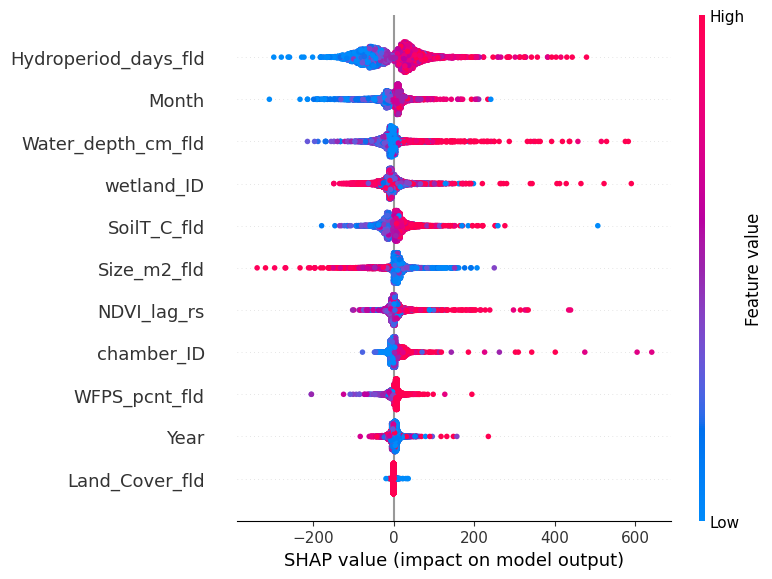

In [158]:
df_exp = df
df_exp['methane_flux_mg_m2_hr'] = df['methane_flux_log_mg_m2_hr'].apply(np.exp)

X_exp = df_exp[['Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'chamber_ID', 'wetland_ID', 'Year']]

y_exp = df_exp['methane_flux_mg_m2_hr']

# Converting categorical variables into numerical

x_exp_categorical = X_exp.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_exp_numerical = X_exp.select_dtypes(exclude = ['object'])

x_exp = pd.concat([x_exp_categorical, x_exp_numerical], axis = 1)

# print(x_pos)
print(x_exp.info())

X_exp_train, X_exp_test, y_exp_train, y_exp_test = train_test_split(x_exp, y_exp, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_exp = RandomForestRegressor(oob_score = True)

regressor_exp.fit(X_exp_train, y_exp_train)

predictions_exp = regressor_exp.predict(X_exp_test)
print(f'R-squared, no max depth, exp of emissions (back to original units): {r2_score(y_exp_test, predictions_exp)}')

# SHAP plot
explainer_exp = shap.Explainer(regressor_exp)

shap_values_exp = explainer_exp.shap_values(X_exp_test)
shap.summary_plot(shap_values_exp, X_exp_test)

In [154]:
df_exp[['methane_flux_log_mg_m2_hr', 'methane_flux_mg_m2_hr']]

methane_flux_log_mg_m2_hr  methane_flux_mg_m2_hr
0                       3.011096              20.309637
1                       4.805099             122.131590
2                       5.021766             151.678941
3                       4.798425             121.319140
4                       5.132823             169.495011
...                          ...                    ...
18798                  -6.371262               0.001710
18799                  -2.653150               0.070429
18800                  -1.672548               0.187768
18801                  -1.952675               0.141894
18802                  -4.431536               0.011896

[18803 rows x 2 columns]

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


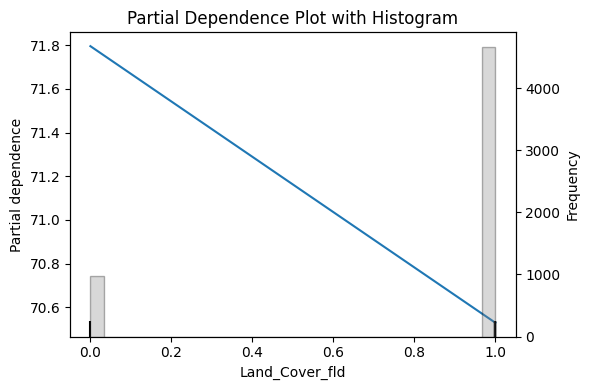

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


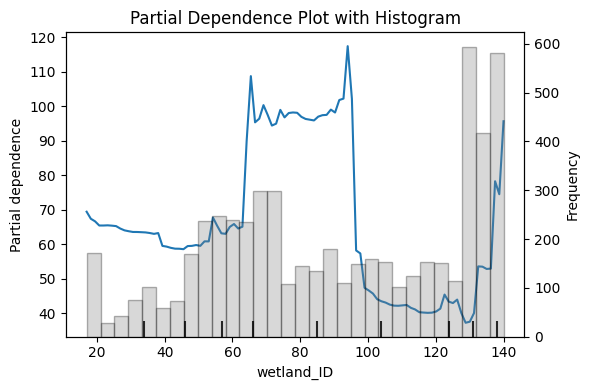

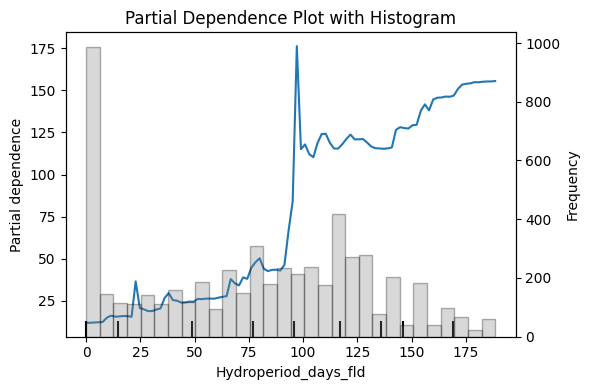

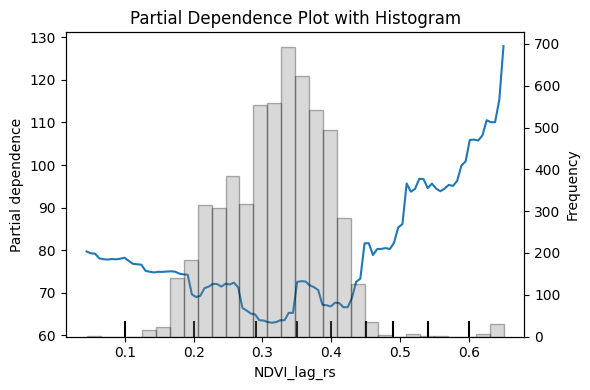

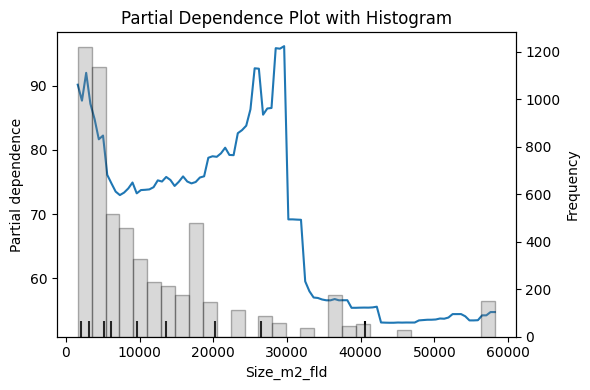

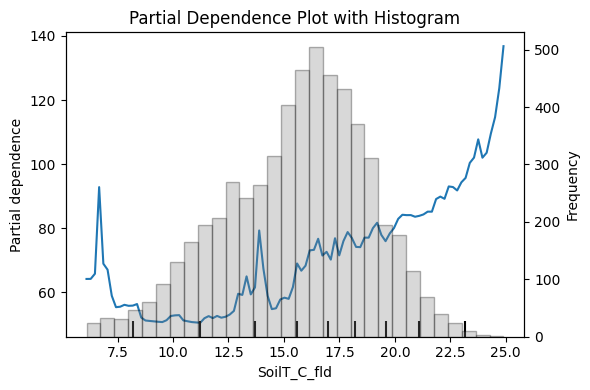

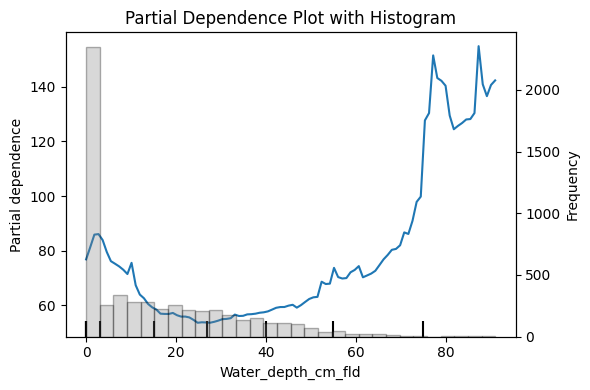

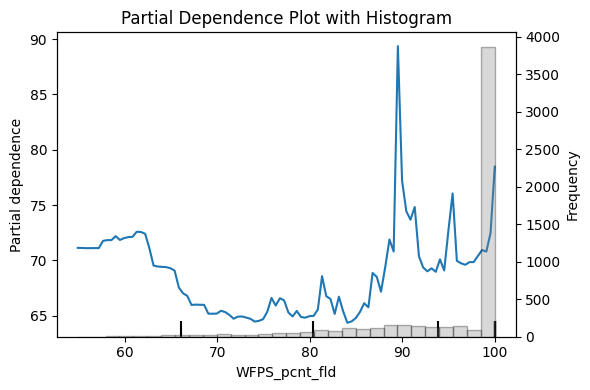

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 8 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


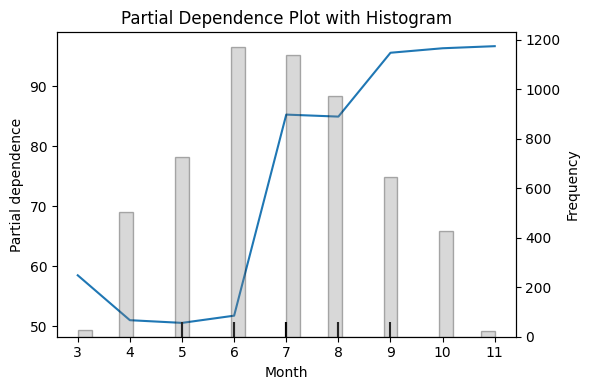

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 9 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


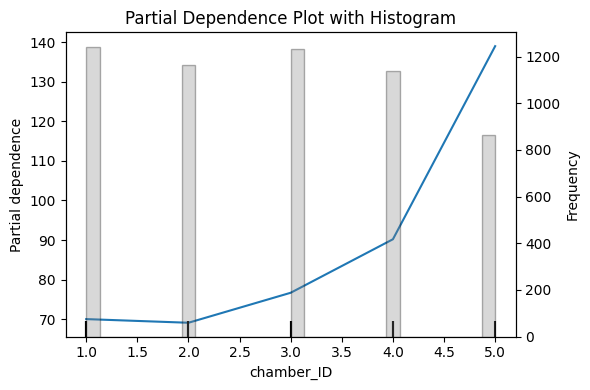

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 10 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


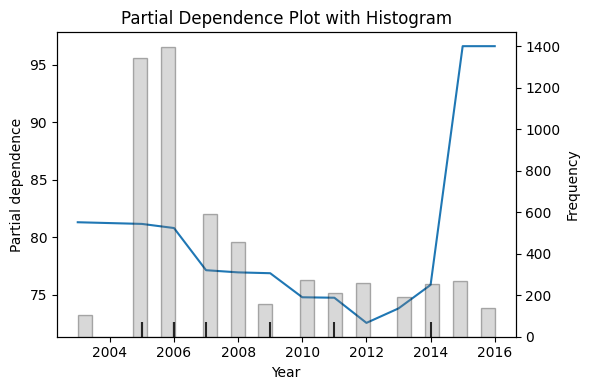

In [155]:
all_pdps(regressor_exp, X_exp_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   Hydroperiod_days_fld  18803 non-null  float64
 2   NDVI_lag_rs           18803 non-null  float64
 3   Size_m2_fld           18803 non-null  float64
 4   SoilT_C_fld           18803 non-null  float64
 5   Water_depth_cm_fld    18803 non-null  float64
 6   WFPS_pcnt_fld         18803 non-null  float64
 7   Month                 18803 non-null  int32  
 8   Year                  18803 non-null  int32  
dtypes: float64(6), int32(2), int64(1)
memory usage: 1.1 MB
None
R-squared, no max depth, exp of emissions (back to original units), no ID: 0.15254252504772037


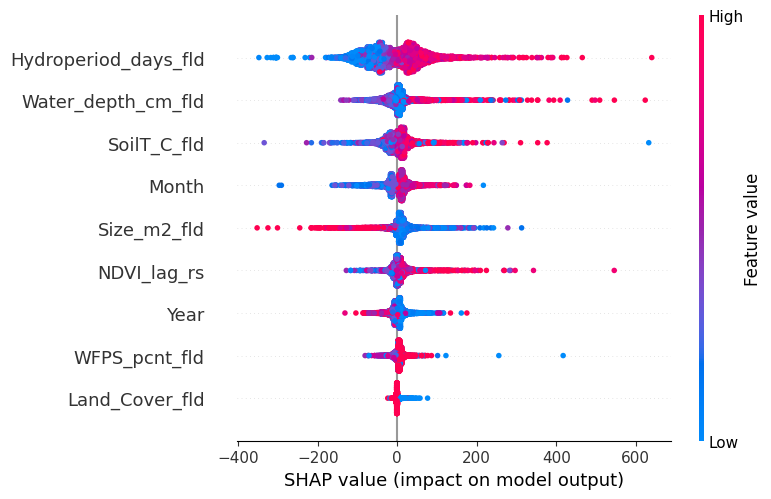

In [157]:
X_exp_noID = df_exp[['Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'Year']]

y_exp_noID = df_exp['methane_flux_mg_m2_hr']

# Converting categorical variables into numerical

x_exp_noID_categorical = X_exp_noID.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_exp_noID_numerical = X_exp_noID.select_dtypes(exclude = ['object'])

x_exp_noID = pd.concat([x_exp_noID_categorical, x_exp_noID_numerical], axis = 1)

# print(x_pos)
print(x_exp_noID.info())

X_exp_noID_train, X_exp_noID_test, y_exp_noID_train, y_exp_noID_test = train_test_split(x_exp_noID, y_exp_noID, test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_exp_noID = RandomForestRegressor(oob_score = True)

regressor_exp_noID.fit(X_exp_noID_train, y_exp_noID_train)

predictions_exp_noID = regressor_exp_noID.predict(X_exp_noID_test)
print(f'R-squared, no max depth, exp of emissions (back to original units), no ID: {r2_score(y_exp_noID_test, predictions_exp_noID)}')

# SHAP plot
explainer_exp_noID = shap.Explainer(regressor_exp_noID)

shap_values_exp_noID = explainer_exp_noID.shap_values(X_exp_noID_test)
shap.summary_plot(shap_values_exp_noID, X_exp_noID_test)

In [159]:
# now trying to 

X_test

Land_Cover_fld  wetland_ID  chamber_ID  Hydroperiod_days_fld  \
5569                0          57           1                 130.0   
79                  0           0           2                 159.0   
4023                1          48           2                  70.0   
3220                0          43           1                  42.5   
17761               1         140           2                  91.0   
...               ...         ...         ...                   ...   
6815                1          63           3                   0.0   
4084                1          48           3                  98.0   
1755                1          33           2                 133.0   
16205               0         134           5                   0.0   
9176                0          83           4                 136.0   

       NDVI_lag_rs  Size_m2_fld  SoilT_C_fld  Water_depth_cm_fld  \
5569          0.41      27561.0         24.6                74.0   
79            0.09       5500.0          4.1                45.0   
4023          0.23       1736.0         22.3                23.0   
3220          0.12       1884.0         24.2                36.0   
17761         0.27       4000.0         13.3                32.0   
...            ...          ...          ...                 ...   
6815          0.20       6986.0          0.3                 0.0   
4084          0.62       1736.0         17.9                17.0   
1755          0.43      40345.0         29.6                26.0   
16205         0.11       7900.0          1.0                 0.0   
9176          0.41      14467.0         19.9                64.0   

       WFPS_pcnt_fld  Month  Year  
5569      100.000000      6  2006  
79        100.000000      4  2015  
4023      100.000000      6  2005  
3220      100.000000      6  2007  
17761     100.000000      5  2015  
...              ...    ...   ...  
6815       73.481346      4  2008  
4084      100.000000      8  2007  
1755      100.000000      7  2006  
16205      78.092329      4  2015  
9176      100.000000      7  2005  

[5641 rows x 11 columns]

In [160]:
df[df['NDVI_lag_rs'] < 0]

chamber_ID        Date GS_Interval_fld  Hydroperiod_days_fld    LAB_ID  \
10              1   9/25/2012            Late                  54.5   16433.0   
57              2   9/25/2012            Late                  54.5   16434.0   
200             5  10/23/2012            Late                   0.0   17601.0   
652             1    4/2/2007           Early                  28.0  280568.0   
653             1   4/16/2007           Early                  28.0  281255.0   
...           ...         ...             ...                   ...       ...   
16704           3   5/23/2013           Early                  65.0   20069.0   
17612           1    4/1/2010           Early                 146.0     140.4   
17613           1   4/14/2010           Early                 146.0     508.4   
17697           2    4/1/2010           Early                 132.0     141.4   
17698           2   4/14/2010           Early                 132.0     509.4   

      Land_Cover_fld  methane_flux_log_mg_m2_hr  NDVI_lag_rs  NDVI_rs  \
10             Grass                  -3.887140        -0.01    -0.44   
57             Grass                  -2.388038        -0.01    -0.44   
200            Grass                  -6.840097        -0.43    -1.28   
652            Grass                  -0.110346        -0.01    -0.01   
653            Grass                   0.401887        -0.01     0.07   
...              ...                        ...          ...      ...   
16704          Grass                  -3.780784        -0.01     0.12   
17612          Grass                  -3.876690        -0.01    -0.01   
17613          Grass                  -0.595041        -0.01     0.05   
17697          Grass                  -3.237656        -0.01    -0.01   
17698          Grass                  -0.121776        -0.01     0.05   

       Size_m2_fld  ...  Water_depth_cm_fld  Wetland_Chamber  wetland_ID  \
10          5500.0  ...                 0.0         BECK 5_1      BECK 5   
57          5500.0  ...                 0.0         BECK 5_2      BECK 5   
200         5500.0  ...                 0.0         BECK 5_5      BECK 5   
652         5626.0  ...                 9.0           DU02_1        DU02   
653         5626.0  ...                14.0           DU02_1        DU02   
...            ...  ...                 ...              ...         ...   
16704       5500.0  ...                22.0             T3_3          T3   
17612       4000.0  ...                43.0             T7_1          T7   
17613       4000.0  ...                64.0             T7_1          T7   
17697       4000.0  ...                42.0             T7_2          T7   
17698       4000.0  ...                47.0             T7_2          T7   

      WFPS_lag_pcnt_fld WFPS_pcnt_fld  Date Object  Month  Year  Season  \
10           100.000000    100.000000   2012-09-25      9  2012       2   
57            95.016648    100.000000   2012-09-25      9  2012       2   
200           52.502769     94.695903   2012-10-23     10  2012       2   
652          100.000000    100.000000   2007-04-02      4  2007       3   
653          100.000000    100.000000   2007-04-16      4  2007       3   
...                 ...           ...          ...    ...   ...     ...   
16704        100.000000    100.000000   2013-05-23      5  2013       3   
17612        100.000000    100.000000   2010-04-01      4  2010       3   
17613        100.000000    100.000000   2010-04-14      4  2010       3   
17697        100.000000    100.000000   2010-04-01      4  2010       3   
17698        100.000000    100.000000   2010-04-14      4  2010       3   

       methane_flux_mg_m2_hr  
10                  0.020504  
57                  0.091810  
200                 0.001070  
652                 0.895524  
653                 1.494642  
...                      ...  
16704               0.022805  
17612               0.020719  
17613               0.551540  
17697               0.039256  
17

In [161]:
min(df['Year'])


2003

In [162]:
max(df['Year'])

2016

In [163]:
min(df['Month'])

3

In [164]:
max(df['Month'])

11

In [17]:
specific_wetlands = ['T6', 'T9', 'P1', 'P8']

# get all the data that is NOT from those wetlands
df_specific_train = df[~(df['wetland_ID'].isin(specific_wetlands))]

# get all the data that IS from those wetlands
df_specific_test = df[(df['wetland_ID'].isin(specific_wetlands))]

<class 'pandas.core.frame.DataFrame'>
Index: 16827 entries, 0 to 18336
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wetland_ID            16827 non-null  int64  
 1   Land_Cover_fld        16827 non-null  int64  
 2   chamber_ID            16827 non-null  int64  
 3   Year                  16827 non-null  int32  
 4   Month                 16827 non-null  int32  
 5   Hydroperiod_days_fld  16827 non-null  float64
 6   NDVI_lag_rs           16827 non-null  float64
 7   Size_m2_fld           16827 non-null  float64
 8   SoilT_C_fld           16827 non-null  float64
 9   Water_depth_cm_fld    16827 non-null  float64
 10  WFPS_pcnt_fld         16827 non-null  float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 13476 to 18802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  -----

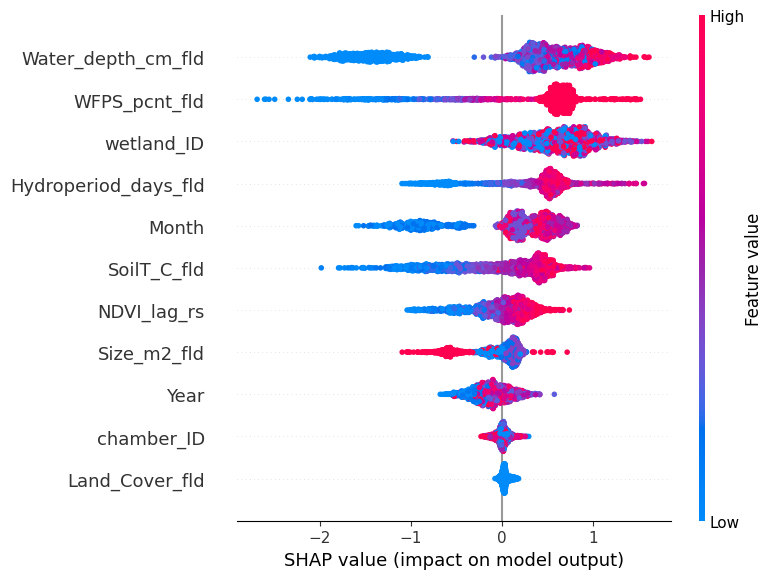

In [20]:
X_specific_train = df_specific_train[['wetland_ID', 'chamber_ID', 'Year', 'Month', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld']]

X_specific_test = df_specific_test[['wetland_ID', 'chamber_ID', 'Year', 'Month', 'Hydroperiod_days_fld', 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld']]

y_specific_train = df_specific_train['methane_flux_log_mg_m2_hr']

y_specific_test = df_specific_test['methane_flux_log_mg_m2_hr']

x_spec_train_categorical = X_specific_train.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_spec_train_numerical = X_specific_train.select_dtypes(exclude = ['object'])

X_specific_train = pd.concat([x_spec_train_categorical, x_spec_train_numerical], axis = 1)
print(X_specific_train.info())

x_spec_test_categorical = X_specific_test.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_spec_test_numerical = X_specific_test.select_dtypes(exclude = ['object'])

X_specific_test = pd.concat([x_spec_test_categorical, x_spec_test_numerical], axis = 1)
print(X_specific_test.info())

regressor_specific = RandomForestRegressor(oob_score = True)

regressor_specific.fit(X_specific_train, y_specific_train)

predictions_specific = regressor_specific.predict(X_specific_test)
print(f'R-squared, no max depth, specific wetlands: {r2_score(y_specific_test, predictions_specific)}')

# SHAP plot
explainer_specific = shap.Explainer(regressor_specific)

shap_values_specific = explainer_specific.shap_values(X_specific_test)
shap.summary_plot(shap_values_specific, X_specific_test)


In [21]:
predictions_specific

array([ 0.03972268,  1.29286854,  1.61612194, ..., -3.32680949,
       -3.9247243 , -4.51700133], shape=(1976,))

In [22]:
for i in range(len(predictions_specific)):
    row = X_specific_test.iloc[i]
    # print(row[['wetland_ID', 'chamber_ID', 'Year']])

    methane_row = y_specific_test.iloc[i]
    # print(methane_row['methane_flux_log_mg_m2_hr'])
    # print("real methane value: " + str(methane_row))

    df_row = df_specific_test.iloc[i]

    # print(df_row[['wetland_ID', 'chamber_ID', 'Date Object', 'methane_flux_log_mg_m2_hr']])

    # print("predicted: " + str(predictions_specific[i]))

In [87]:
def days_since(date1, date2):
    return (date2 - date1).days

4


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_42202/1686132991.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P1['sum_methane'] = np.nan


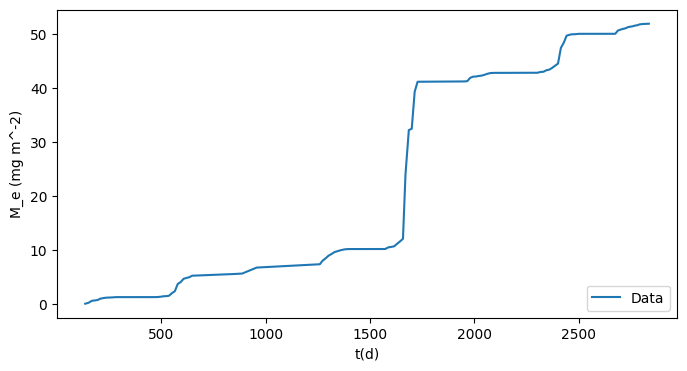

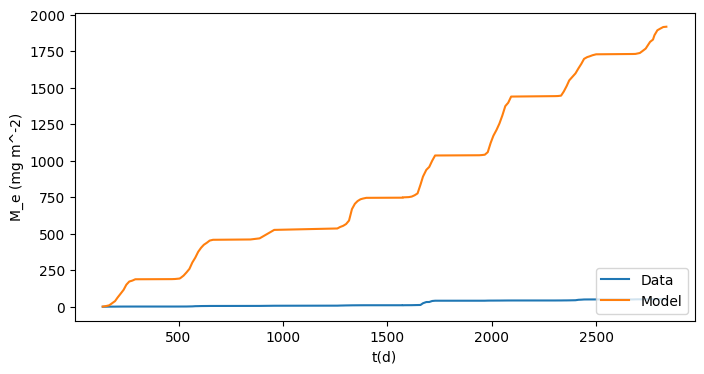

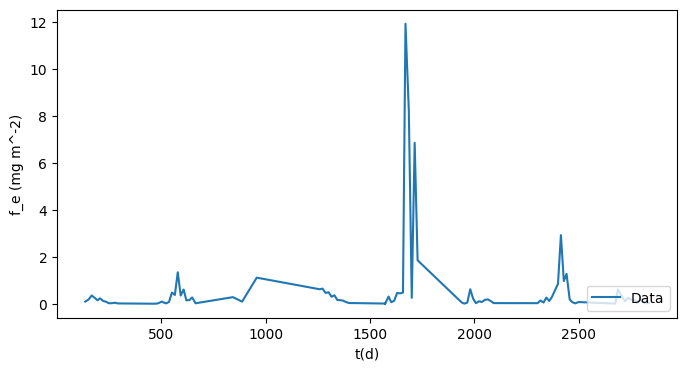

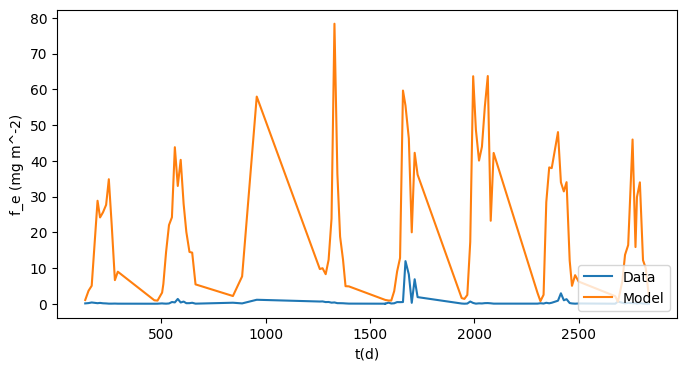

In [23]:
def days_since(date1, date2):
    return (date2 - date1).days


# specific to wetland P1, chamber 1
df_P1 = df_specific_test[df_specific_test['wetland_ID'] == 'P1']

# test if in order
count = 0
for i in range(len(df_P1) - 1):
    if df_P1.iloc[i]['Date Object'] > df_P1.iloc[i + 1]['Date Object']:
        count += 1
        # print(df_P1.iloc[i])
        # print(df_P1.iloc[i + 1])

print(count)

# ok so it is the order and the only conflicts are when we switch from the kth chamber to the (k+1)th chamber

chamber = 1

df_P1['sum_methane'] = np.nan

x_vals = np.zeros(len(df_P1))
meth_vals = np.zeros(len(df_P1))
meth_flux = np.zeros(len(df_P1))

model_vals = np.zeros(len(df_P1))
model_flux = np.zeros(len(df_P1))

start_ind = 0
end_ind = 0

for i in range(len(df_P1)):
    row = df_P1.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])
    # meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']) * 16)
    meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']))

    model_vals[i] = (np.exp(predictions_specific[i]))

    meth_flux[i] = meth_vals[i]
    model_flux[i] = model_vals[i]

    if i > 0:
        meth_vals[i] = meth_vals[i - 1] + meth_vals[i]
        model_vals[i] = model_vals[i - 1] + model_vals[i]
        end_ind = i

from matplotlib import pyplot as plt


# convert the date object to days since Jan 1, 2009
# for i in range(len(x_vals)):
#     x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), x_vals[i])


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_vals[start_ind:end_ind], label = "Data")
# plt.plot(x_vals, model_vals, label = "Model")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg m^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_vals[start_ind:end_ind], label = "Data")
plt.plot(x_vals[start_ind:end_ind], model_vals[start_ind:end_ind], label = "Model")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg m^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_flux[start_ind:end_ind], label = "Data")
# plt.plot(x_vals, model_vals, label = "Model")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg m^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_flux[start_ind:end_ind], label = "Data")
plt.plot(x_vals[start_ind:end_ind], model_flux[start_ind:end_ind], label = "Model")
# plt.plot(x_vals, model_vals, label = "Model")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg m^-2)')
plt.legend(loc = "lower right")

plt.show()

In [24]:
meth_vals.size

493

In [25]:
import scipy
iqr = scipy.stats.iqr(np.exp(df_P1['methane_flux_log_mg_m2_hr']))

7/29/2013: 11.922929000844903
8/14/2013: 8.216284002235108
9/11/2013: 6.850326997526852
7/20/2011: 45.93245000196113
6/8/2011: 58.805517997708556
8/3/2011: 44.030642016340515
8/17/2011: 14.852907004954155
5/16/2012: 11.089746004621048
5/31/2012: 11.366300999819089
8/23/2012: 32.65043200407031
7/29/2013: 9.90153800386371
9/11/2013: 12.531160997027202
9/25/2013: 42.552444992419176
7/1/2014: 9.253579003614169
7/16/2014: 23.353675996943178
7/6/2011: 11.592063002478135
6/22/2011: 15.743703994959626
7/6/2011: 63.59080897936406
8/3/2011: 43.63534198562262
8/17/2011: 27.950224003346648
8/30/2011: 10.600364994832848


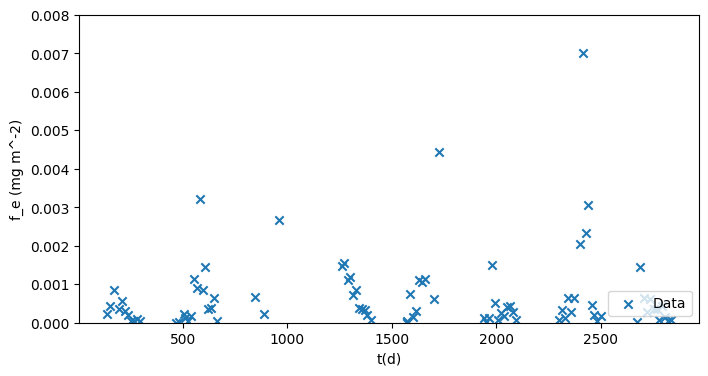

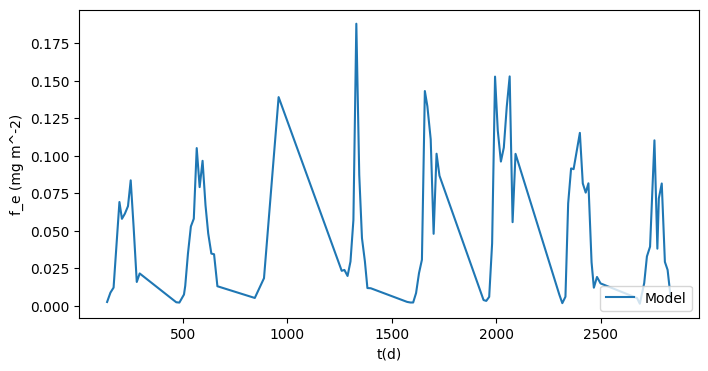

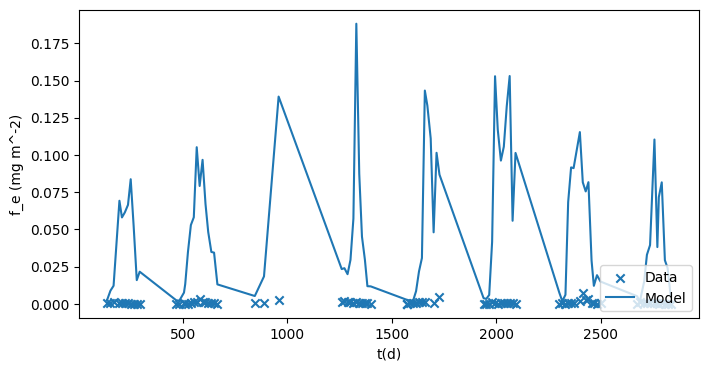

In [26]:
# model_vals
for index, row in df_P1.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])
    if flux > 20 * iqr:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux)):
    if meth_flux[i] > 20 * iqr:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan

meth_flux_scaled = 24/10000 * meth_flux
model_flux_scaled = 24/10000 * model_flux

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg m^-2)')
plt.legend(loc = "lower right")
plt.ylim(0, 0.008)

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model")

plt.xlabel('t(d)')
plt.ylabel('f_e (mg m^-2)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg m^-2)')
plt.legend(loc = "lower right")
plt.show()


In [27]:
print(len(df_P1[df_P1['chamber_ID'] == 1]))
print(len(df_P1[df_P1['chamber_ID'] == 2]))
print(len(df_P1[df_P1['chamber_ID'] == 3]))
print(len(df_P1[df_P1['chamber_ID'] == 4]))
print(len(df_P1[df_P1['chamber_ID'] == 5]))

93
109
106
97
88


In [31]:
print(np.percentile(np.exp(df_T9['methane_flux_log_mg_m2_hr']), 25) * 24/10000)
print(np.percentile(np.exp(df_T9['methane_flux_log_mg_m2_hr']), 75) * 24/10000)
print(iqr * 24/10000)
print(iqr * 24/10000 * 20)

0.003675063600449954
0.2601549773730391
4.322988720544416e-06
8.645977441088831e-05


106.8666307385788
0.4001723664699482
8/2/2011: 10.332775777774723
9/13/2011: 12.380211168888538
4/16/2012: 13.194334703978177
8/27/2015: 8.162638394476923
7/7/2011: 14.339421065738826
4/16/2012: 9.110681317735947
7/7/2011: 13.6725029824234
7/7/2011: 10.535520074329611
8/31/2011: 11.56349540682229
7/10/2012: 10.127658712101967
6/16/2009: 8.673163016373088
6/30/2009: 15.031901394320725
7/14/2009: 8.810714444409841
7/7/2011: 14.046940097019158


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_42202/335108819.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T9['sum_methane'] = np.nan


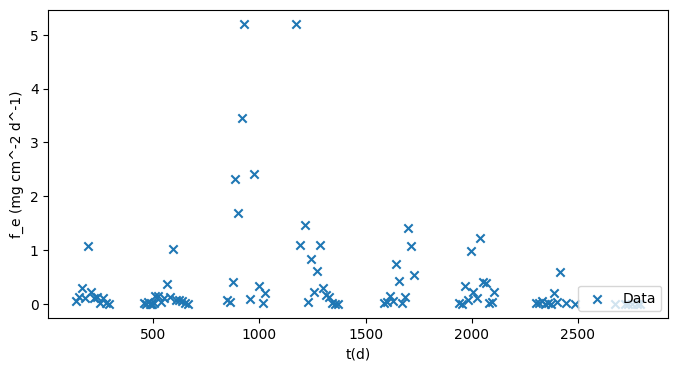

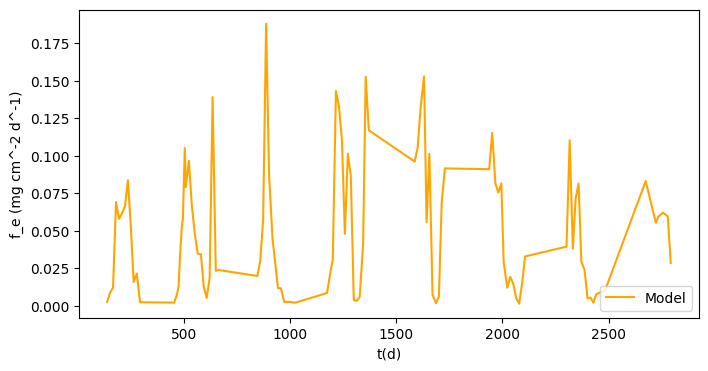

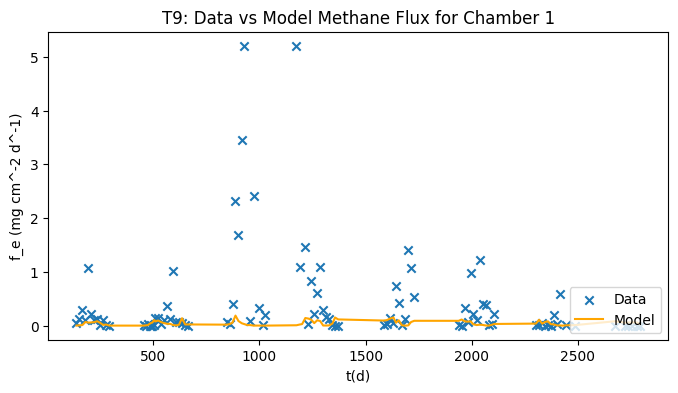

In [32]:
df_T9 = df_specific_test[df_specific_test['wetland_ID'] == 'T9']
iqr = scipy.stats.iqr(np.exp(df_T9['methane_flux_log_mg_m2_hr']))
print(iqr)

# also in order

chamber = 1

chamber_list = df_T9['chamber_ID'].tolist()

df_T9['sum_methane'] = np.nan

x_vals = np.zeros(len(df_T9))
meth_vals = np.zeros(len(df_T9))
meth_flux = np.zeros(len(df_T9))

model_vals = np.zeros(len(df_T9))
model_flux = np.zeros(len(df_T9))

start_ind = chamber_list.index(chamber)
end_ind = 0

for i in range(len(df_T9)):
    row = df_T9.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])
    # meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']) * 16)
    meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']))

    model_vals[i] = (np.exp(predictions_specific[i]))

    meth_flux[i] = meth_vals[i]
    model_flux[i] = model_vals[i]

    if i > 0:
        meth_vals[i] = meth_vals[i - 1] + meth_vals[i]
        model_vals[i] = model_vals[i - 1] + model_vals[i]
        end_ind = i


meth_flux_scaled = 24/10000 * meth_flux
model_flux_scaled = 24/10000 * model_flux
iqr = scipy.stats.iqr(meth_flux_scaled[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux_scaled, 75)


# model_vals
for index, row in df_T9.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan
        meth_flux_scaled[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.title("T9: Data vs Model Methane Flux for Chamber " + str(chamber))
plt.legend(loc = "lower right")
plt.show()


2.5817734004766257
0.0018012453002268398
7/20/2010: 0.056745523225404486
8/5/2010: 0.0634071311835646
8/2/2011: 0.08006467922658203
8/29/2011: 0.04760597279984572
10/25/2011: 0.17706226800634237
4/2/2012: 0.03620447280520574
6/26/2012: 0.38099315776900183
7/28/2014: 0.045680738377768274
8/11/2014: 0.0577721615951526
6/15/2015: 0.9396164784444616
7/2/2015: 0.15765616807646046
7/13/2015: 1.1021525467977662
7/27/2015: 0.31627398477569485
8/10/2015: 0.13811660875808382
8/29/2011: 0.17864850968727874
9/13/2011: 2.479197173417003
9/27/2011: 0.14156920805220183
10/11/2011: 0.03853723201661486
10/25/2011: 0.5976389686959834
5/30/2012: 0.10994250478291015
6/13/2012: 3.4045196318705284
6/26/2012: 1.533989810326398
8/11/2014: 0.12495971762352404
8/25/2014: 0.1639239863244104
9/22/2014: 0.17035874637629098
10/7/2014: 0.03744744481340389
10/20/2014: 0.07670658957857011
7/2/2015: 0.08125152963860287
7/13/2015: 0.2817237935196339
7/27/2015: 0.267915698275636
8/10/2015: 0.03668709841222283
7/27/2009: 

/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_42202/2070259828.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T6['sum_methane'] = np.nan


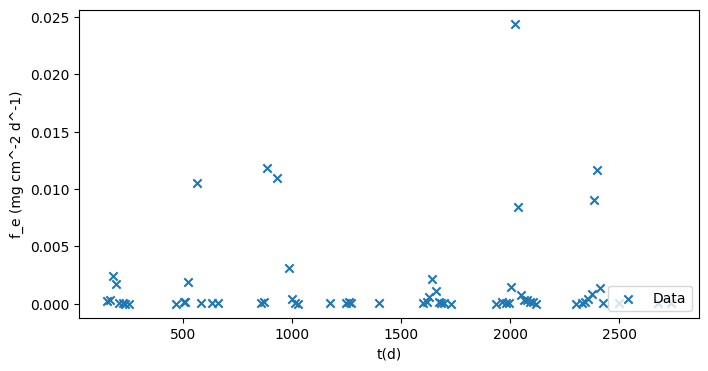

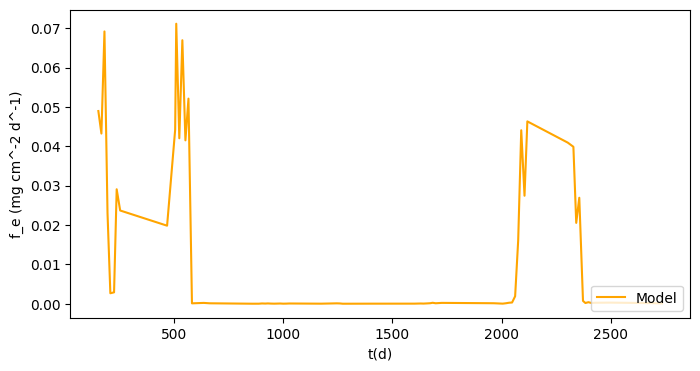

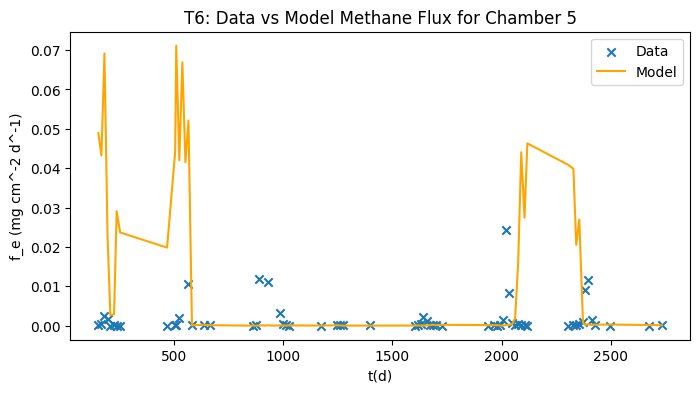

In [30]:
df_T6 = df_specific_test[df_specific_test['wetland_ID'] == 'T6']
iqr = scipy.stats.iqr(np.exp(df_T6['methane_flux_log_mg_m2_hr']))
print(iqr)

# also in order

chamber = 5

chamber_list = df_T6['chamber_ID'].tolist()

df_T6['sum_methane'] = np.nan

x_vals = np.zeros(len(df_T6))
meth_vals = np.zeros(len(df_T6))
meth_flux = np.zeros(len(df_T6))

model_vals = np.zeros(len(df_T6))
model_flux = np.zeros(len(df_T6))

start_ind = chamber_list.index(chamber)
end_ind = 0

for i in range(len(df_T6)):
    row = df_T6.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])
    # meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']) * 16)
    meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']))

    model_vals[i] = (np.exp(predictions_specific[i]))

    meth_flux[i] = meth_vals[i]
    model_flux[i] = model_vals[i]

    if i > 0:
        meth_vals[i] = meth_vals[i - 1] + meth_vals[i]
        model_vals[i] = model_vals[i - 1] + model_vals[i]
        end_ind = i


meth_flux_scaled = 24/10000 * meth_flux
model_flux_scaled = 24/10000 * model_flux
iqr = scipy.stats.iqr(meth_flux_scaled[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux_scaled, 75)


# model_vals
for index, row in df_T6.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan
        meth_flux_scaled[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.title("T6: Data vs Model Methane Flux for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


0.3108383998760224
0.0005451489601127822
7/29/2013: 0.028615029602027768
8/14/2013: 0.01971908160536426
9/11/2013: 0.016440784794064446
7/20/2011: 0.11023788000470672
8/3/2011: 0.012736917601381867
6/8/2011: 0.14113324319450052
8/3/2011: 0.10567354083921723
8/17/2011: 0.03564697681188997
4/4/2012: 0.014303512798648242
5/16/2012: 0.026615390411090515
5/31/2012: 0.027279122399565814
8/23/2012: 0.07836103680976875
7/29/2013: 0.023763691209272905
9/11/2013: 0.030074786392865285
9/25/2013: 0.10212586798180602
7/1/2014: 0.022208589608674004
7/16/2014: 0.05604882239266362
9/22/2009: 0.01289487600254171
7/6/2011: 0.027820951205947523
7/26/2012: 0.013148090400067508
6/22/2011: 0.0377848895879031
7/6/2011: 0.15261794155047376
8/3/2011: 0.10472482076549428
8/17/2011: 0.06708053760803195
8/30/2011: 0.025440875987598834


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_42202/2046071923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P1['sum_methane'] = np.nan


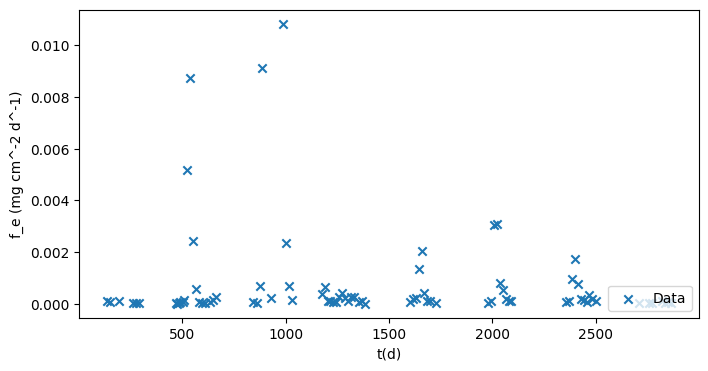

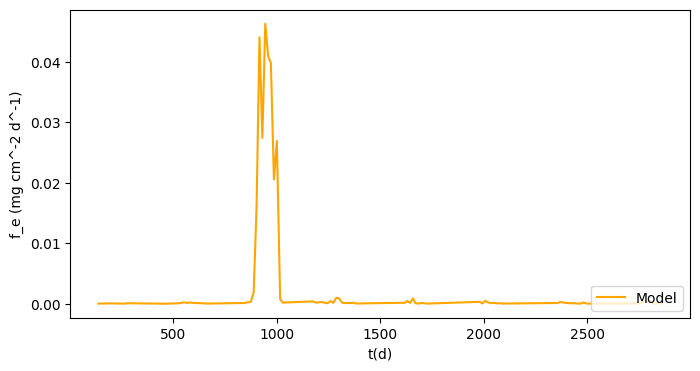

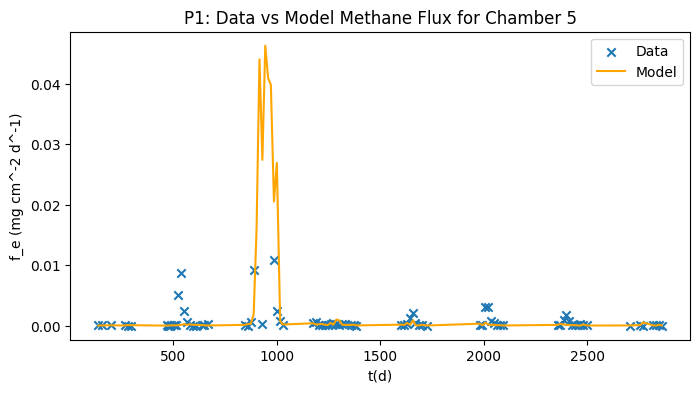

In [33]:
df_P1 = df_specific_test[df_specific_test['wetland_ID'] == 'P1']
iqr = scipy.stats.iqr(np.exp(df_P1['methane_flux_log_mg_m2_hr']))
print(iqr)

# also in order

chamber = 5

chamber_list = df_P1['chamber_ID'].tolist()

df_P1['sum_methane'] = np.nan

x_vals = np.zeros(len(df_P1))
meth_vals = np.zeros(len(df_P1))
meth_flux = np.zeros(len(df_P1))

model_vals = np.zeros(len(df_P1))
model_flux = np.zeros(len(df_P1))

start_ind = chamber_list.index(chamber)
end_ind = 0

for i in range(len(df_P1)):
    row = df_P1.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])
    # meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']) * 16)
    meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']))

    model_vals[i] = (np.exp(predictions_specific[i]))

    meth_flux[i] = meth_vals[i]
    model_flux[i] = model_vals[i]

    if i > 0:
        meth_vals[i] = meth_vals[i - 1] + meth_vals[i]
        model_vals[i] = model_vals[i - 1] + model_vals[i]
        end_ind = i


meth_flux_scaled = 24/10000 * meth_flux
model_flux_scaled = 24/10000 * model_flux
iqr = scipy.stats.iqr(meth_flux_scaled[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux_scaled, 75)


# model_vals
for index, row in df_P1.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan
        meth_flux_scaled[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.title("P1: Data vs Model Methane Flux for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


87.13337804360938
0.15531144122807206
6/21/2011: 7.322175822907951
8/30/2011: 7.2842881280071134
6/22/2010: 3.952952853076327
5/24/2011: 3.457199576408036
6/21/2011: 9.151814140639752
8/2/2011: 6.500619846608836
8/16/2011: 3.8274060889310517
8/30/2011: 6.994149454498491
7/9/2012: 5.330381130980142
7/24/2012: 6.852678518015407
8/7/2012: 7.765403322796848
10/29/2010: 3.8556566293252907
7/19/2011: 7.6468291779430615
8/30/2011: 8.593452193093091
8/7/2012: 4.396844209017072
7/19/2011: 7.742885953938738
8/2/2011: 3.432903245335159
8/30/2011: 6.070059245312289
7/5/2011: 3.4211065910448464
8/2/2011: 6.664476583052982
8/30/2011: 7.636519452812642


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_42202/620155876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P8['sum_methane'] = np.nan


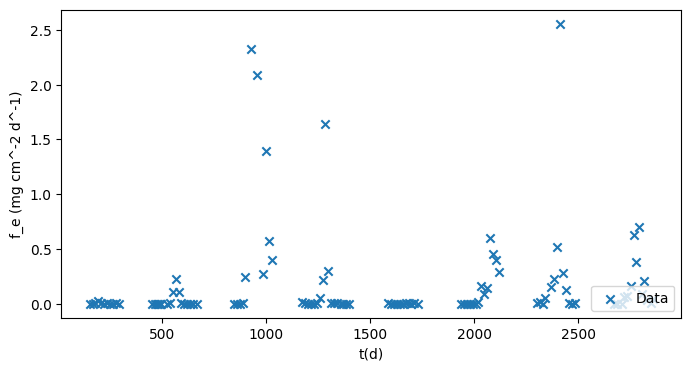

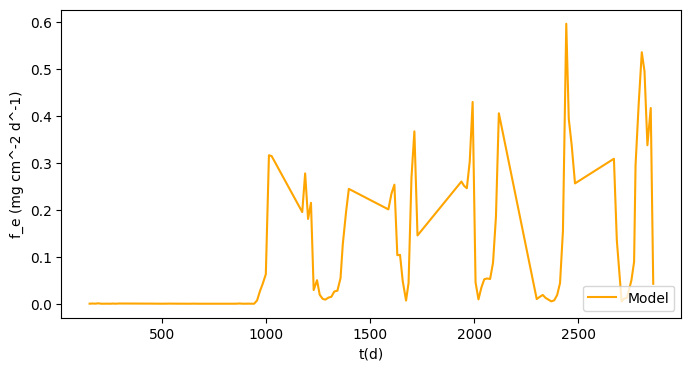

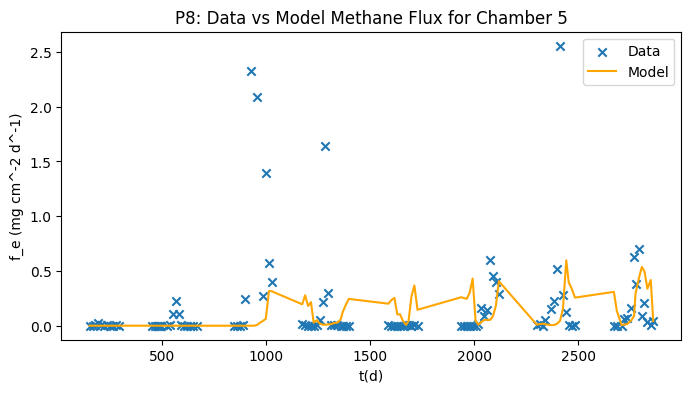

In [34]:
df_P8 = df_specific_test[df_specific_test['wetland_ID'] == 'P8']
iqr = scipy.stats.iqr(np.exp(df_P8['methane_flux_log_mg_m2_hr']))
print(iqr)

# also in order

chamber = 5

chamber_list = df_P8['chamber_ID'].tolist()

df_P8['sum_methane'] = np.nan

x_vals = np.zeros(len(df_P8))
meth_vals = np.zeros(len(df_P8))
meth_flux = np.zeros(len(df_P8))

model_vals = np.zeros(len(df_P8))
model_flux = np.zeros(len(df_P8))

start_ind = chamber_list.index(chamber)
end_ind = 0

for i in range(len(df_P8)):
    row = df_P8.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])
    # meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']) * 16)
    meth_vals[i] = (np.exp(row['methane_flux_log_mg_m2_hr']))

    model_vals[i] = (np.exp(predictions_specific[i]))

    meth_flux[i] = meth_vals[i]
    model_flux[i] = model_vals[i]

    if i > 0:
        meth_vals[i] = meth_vals[i - 1] + meth_vals[i]
        model_vals[i] = model_vals[i - 1] + model_vals[i]
        end_ind = i


meth_flux_scaled = 24/10000 * meth_flux
model_flux_scaled = 24/10000 * model_flux
iqr = scipy.stats.iqr(meth_flux_scaled[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux_scaled, 75)


# model_vals
for index, row in df_P8.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan
        meth_flux_scaled[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.scatter(x_vals[start_ind:end_ind], meth_flux_scaled[start_ind:end_ind], 
            label = "Data",
           marker = "x")
plt.plot(x_vals[start_ind:end_ind], model_flux_scaled[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.title("P8: Data vs Model Methane Flux for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


0
106
0.2371070388741471
0.2371070388741471
6/21/2011: 7.322175822907951
8/30/2011: 7.2842881280071134
6/21/2011: 9.151814140639752
8/2/2011: 6.500619846608836
8/30/2011: 6.994149454498491
7/9/2012: 5.330381130980142
7/24/2012: 6.852678518015407
8/7/2012: 7.765403322796848
7/19/2011: 7.6468291779430615
8/30/2011: 8.593452193093091
7/19/2011: 7.742885953938738
8/30/2011: 6.070059245312289
8/2/2011: 6.664476583052982
8/30/2011: 7.636519452812642


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_42202/3274097131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P8['sum_methane'] = np.nan


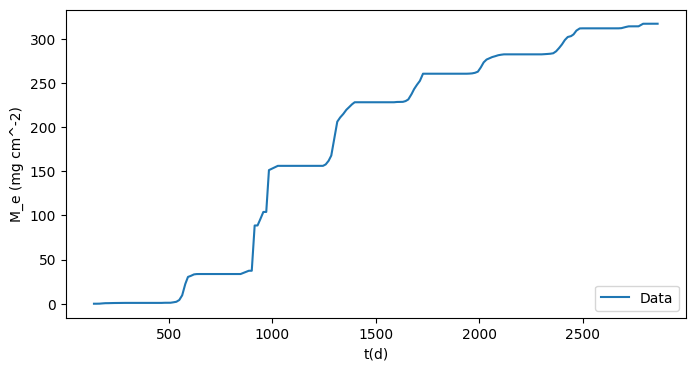

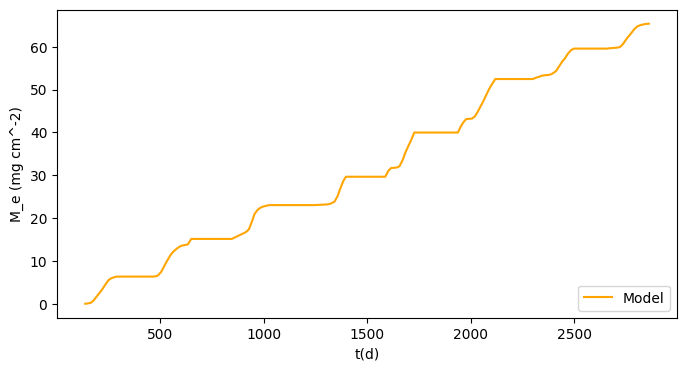

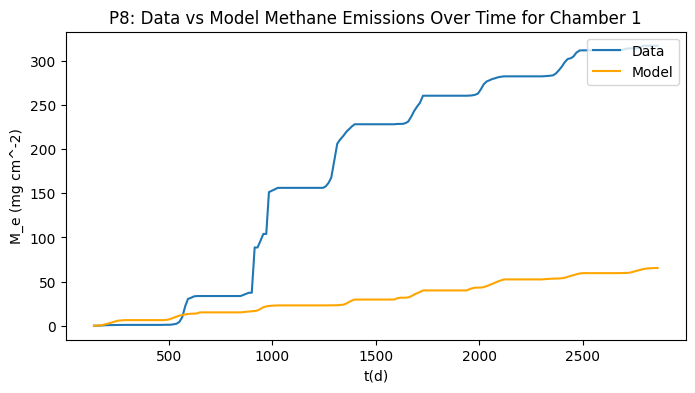

In [59]:
# interpolate and integrate 

# P8


# also in order

chamber = 1

chamber_list = df_P8['chamber_ID'].tolist()

df_P8['sum_methane'] = np.nan

x_vals = np.zeros(len(df_P8))
meth_flux = np.zeros(len(df_P8))
model_flux = np.zeros(len(df_P8))

meth_inter = np.zeros(len(df_P8))
model_inter = np.zeros(len(df_P8))

start_ind = chamber_list.index(chamber)
end_ind = len(chamber_list) - 1 - chamber_list[::-1].index(chamber)

print(start_ind)
print(end_ind)

fluxes = np.exp(df_P8['methane_flux_log_mg_m2_hr']) * 24/10000
iqr = scipy.stats.iqr(fluxes[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(fluxes, 75)

for i in range(len(df_P8)):
    row = df_P8.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])

    meth_flux[i] = np.exp(row['methane_flux_log_mg_m2_hr']) * 24/10000
    model_flux[i] = np.exp(predictions_specific[i]) * 24/10000

    # if meth_flux[i] > 20 * iqr + Q3:
    #     meth_flux[i] = np.nan

    if i == start_ind:
        meth_inter[i] = meth_flux[i]
        model_inter[i] = model_flux[i]
    else:
        time_passed = x_vals[i] - x_vals[i - 1]
        if time_passed < 90 and meth_flux[i] <= 20 * iqr + Q3:
            meth_inter[i] = time_passed * 1/2 * (meth_flux[i - 1] + meth_flux[i]) + meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]
        elif time_passed >= 90:
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = model_inter[i-1]
        else:
            # meth_inter[i] = time_passed * (meth_flux[i - 1]) + meth_inter[i-1]
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]


iqr = scipy.stats.iqr(meth_flux[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux, 75)


# model_vals
for index, row in df_P8.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.title("P8: Data vs Model Methane Emissions Over Time for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


0
92
0.0007200382802066045
0.0007200382802066045
7/29/2013: 0.028615029602027768
8/14/2013: 0.01971908160536426
9/11/2013: 0.016440784794064446
7/20/2011: 0.11023788000470672
6/8/2011: 0.14113324319450052
8/3/2011: 0.10567354083921723
8/17/2011: 0.03564697681188997
5/16/2012: 0.026615390411090515
5/31/2012: 0.027279122399565814
8/23/2012: 0.07836103680976875
7/29/2013: 0.023763691209272905
9/11/2013: 0.030074786392865285
9/25/2013: 0.10212586798180602
7/1/2014: 0.022208589608674004
7/16/2014: 0.05604882239266362
7/6/2011: 0.027820951205947523
6/22/2011: 0.0377848895879031
7/6/2011: 0.15261794155047376
8/3/2011: 0.10472482076549428
8/17/2011: 0.06708053760803195
8/30/2011: 0.025440875987598834


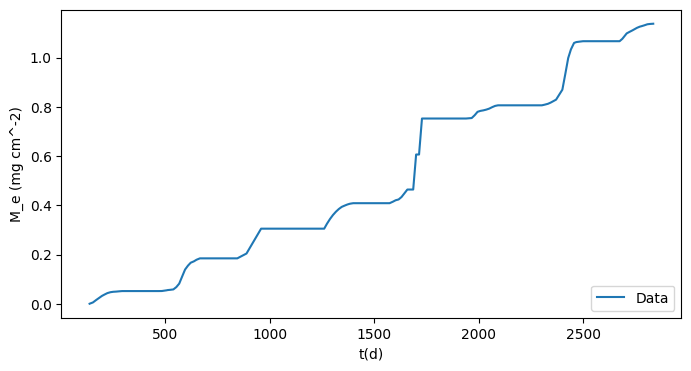

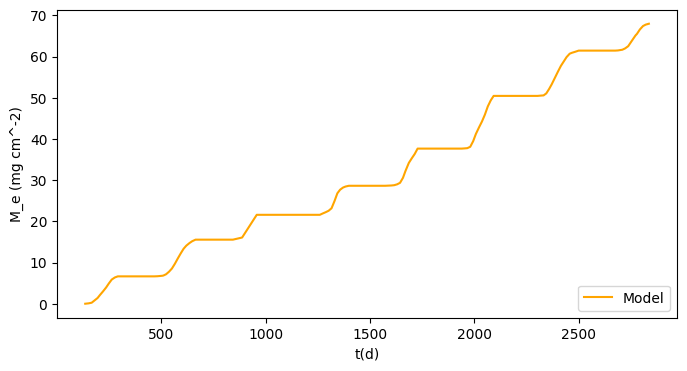

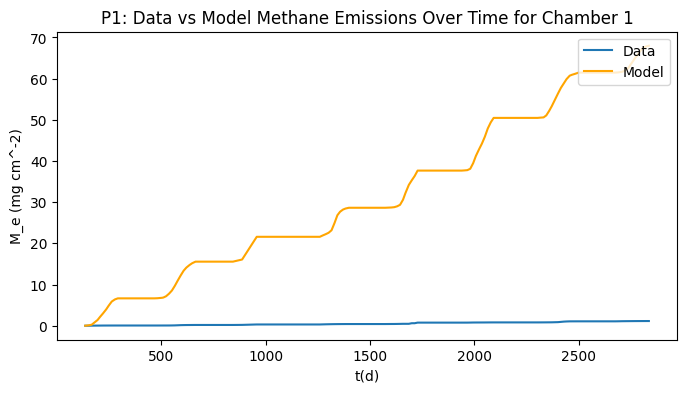

In [58]:
# interpolate and integrate 

# P1


# also in order

chamber = 1

chamber_list = df_P1['chamber_ID'].tolist()


x_vals = np.zeros(len(df_P1))
meth_flux = np.zeros(len(df_P1))
model_flux = np.zeros(len(df_P1))

meth_inter = np.zeros(len(df_P1))
model_inter = np.zeros(len(df_P1))

start_ind = chamber_list.index(chamber)
end_ind = len(chamber_list) - 1 - chamber_list[::-1].index(chamber)

print(start_ind)
print(end_ind)

fluxes = np.exp(df_P1['methane_flux_log_mg_m2_hr']) * 24/10000
iqr = scipy.stats.iqr(fluxes[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(fluxes, 75)

for i in range(len(df_P1)):
    row = df_P1.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])

    meth_flux[i] = np.exp(row['methane_flux_log_mg_m2_hr']) * 24/10000
    model_flux[i] = np.exp(predictions_specific[i]) * 24/10000

    # if meth_flux[i] > 20 * iqr + Q3:
    #     meth_flux[i] = np.nan

    if i == start_ind:
        meth_inter[i] = meth_flux[i]
        model_inter[i] = model_flux[i]
    else:
        time_passed = x_vals[i] - x_vals[i - 1]
        if time_passed < 90 and meth_flux[i] <= 20 * iqr + Q3:
            meth_inter[i] = time_passed * 1/2 * (meth_flux[i - 1] + meth_flux[i]) + meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]
        elif time_passed >= 90:
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = model_inter[i-1]
        else:
            # meth_inter[i] = time_passed * (meth_flux[i - 1]) + meth_inter[i-1]
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]


iqr = scipy.stats.iqr(meth_flux[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux, 75)


# model_vals
for index, row in df_P1.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.title("P1: Data vs Model Methane Emissions Over Time for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


0
97
0.004229255041536075
0.004229255041536075
10/25/2011: 0.17706226800634237
6/26/2012: 0.38099315776900183
6/15/2015: 0.9396164784444616
7/2/2015: 0.15765616807646046
7/13/2015: 1.1021525467977662
7/27/2015: 0.31627398477569485
8/10/2015: 0.13811660875808382
8/29/2011: 0.17864850968727874
9/13/2011: 2.479197173417003
9/27/2011: 0.14156920805220183
10/25/2011: 0.5976389686959834
5/30/2012: 0.10994250478291015
6/13/2012: 3.4045196318705284
6/26/2012: 1.533989810326398
8/11/2014: 0.12495971762352404
8/25/2014: 0.1639239863244104
9/22/2014: 0.17035874637629098
7/13/2015: 0.2817237935196339
7/27/2015: 0.267915698275636
8/5/2010: 0.2383805280836409
7/7/2011: 0.33817075910196426
8/29/2011: 0.27855777607888255
9/27/2011: 0.16552372323495257
10/25/2011: 0.10814934244511408
9/8/2014: 0.1521090456694548
9/22/2014: 0.3014801424127432
6/15/2015: 0.36492114471081377
7/2/2015: 0.8292306360168874
8/10/2015: 0.1080977279465919
7/20/2010: 0.6433392694765673
8/5/2010: 0.08596198557683346
7/7/2011: 0.0

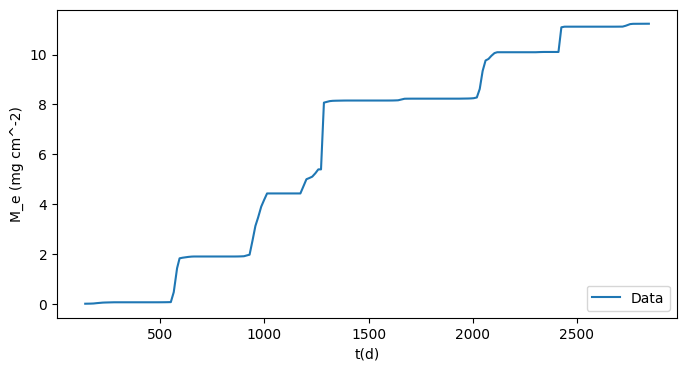

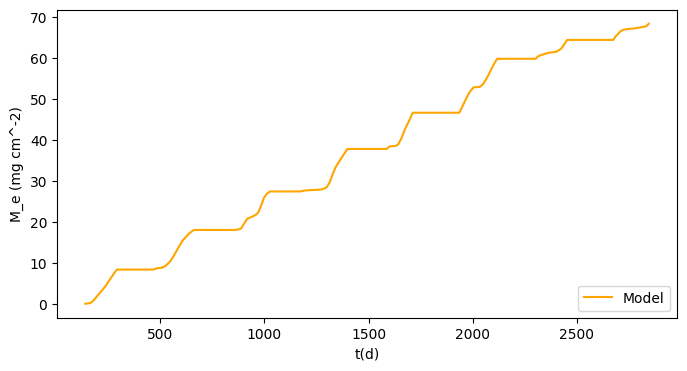

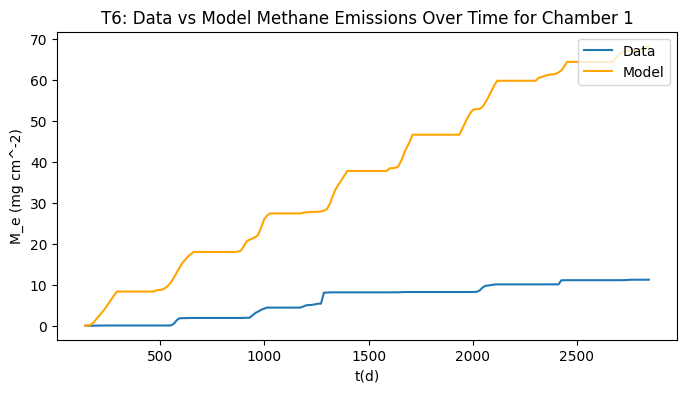

In [56]:
# interpolate and integrate 

# T6


# also in order

chamber = 1

chamber_list = df_T6['chamber_ID'].tolist()


x_vals = np.zeros(len(df_T6))
meth_flux = np.zeros(len(df_T6))
model_flux = np.zeros(len(df_T6))

meth_inter = np.zeros(len(df_T6))
model_inter = np.zeros(len(df_T6))

start_ind = chamber_list.index(chamber)
end_ind = len(chamber_list) - 1 - chamber_list[::-1].index(chamber)

print(start_ind)
print(end_ind)

fluxes = np.exp(df_T6['methane_flux_log_mg_m2_hr']) * 24/10000
iqr = scipy.stats.iqr(fluxes[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(fluxes, 75)

for i in range(len(df_T6)):
    row = df_T6.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])

    meth_flux[i] = np.exp(row['methane_flux_log_mg_m2_hr']) * 24/10000
    model_flux[i] = np.exp(predictions_specific[i]) * 24/10000

    # if meth_flux[i] > 20 * iqr + Q3:
    #     meth_flux[i] = np.nan

    if i == start_ind:
        meth_inter[i] = meth_flux[i]
        model_inter[i] = model_flux[i]
    else:
        time_passed = x_vals[i] - x_vals[i - 1]
        if time_passed < 90 and meth_flux[i] <= 20 * iqr + Q3:
            meth_inter[i] = time_passed * 1/2 * (meth_flux[i - 1] + meth_flux[i]) + meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]
        elif time_passed >= 90:
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = model_inter[i-1]
        else:
            # meth_inter[i] = time_passed * (meth_flux[i - 1]) + meth_inter[i-1]
            meth_inter[i] = meth_inter[i - 1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]


iqr = scipy.stats.iqr(meth_flux[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux, 75)


# model_vals
for index, row in df_T6.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.title("T6: Data vs Model Methane Emissions Over Time for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


0
102
0.4001723664699482
0.4001723664699482
8/2/2011: 10.332775777774723
9/13/2011: 12.380211168888538
4/16/2012: 13.194334703978177
8/27/2015: 8.162638394476923
7/7/2011: 14.339421065738826
4/16/2012: 9.110681317735947
7/7/2011: 13.6725029824234
7/7/2011: 10.535520074329611
8/31/2011: 11.56349540682229
7/10/2012: 10.127658712101967
6/16/2009: 8.673163016373088
6/30/2009: 15.031901394320725
7/14/2009: 8.810714444409841
7/7/2011: 14.046940097019158


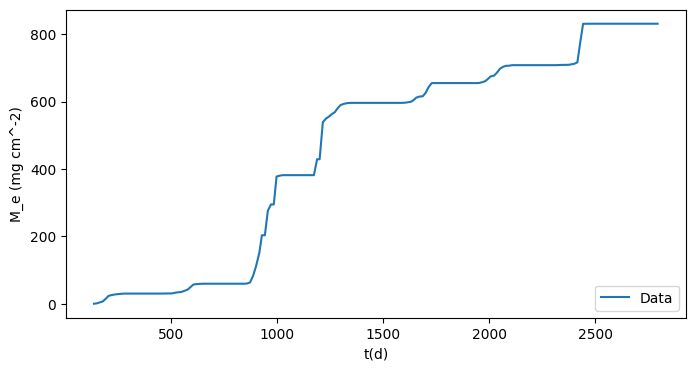

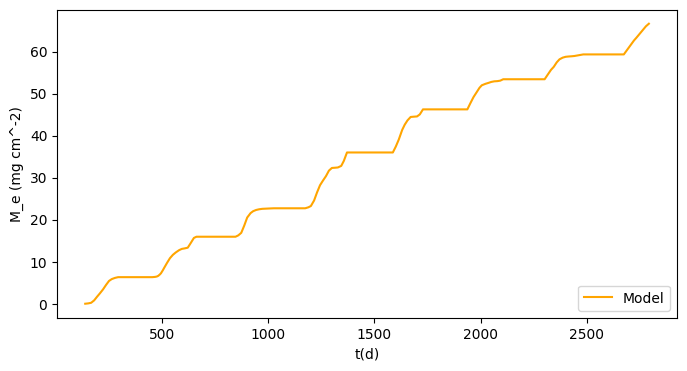

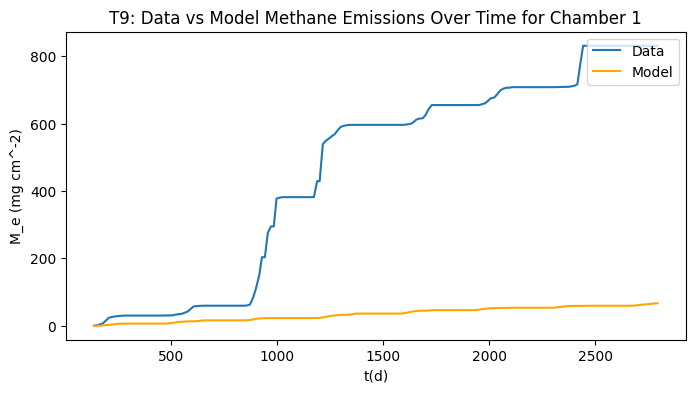

In [57]:
# interpolate and integrate 

# T9


# also in order

chamber = 1

chamber_list = df_T9['chamber_ID'].tolist()


x_vals = np.zeros(len(df_T9))
meth_flux = np.zeros(len(df_T9))
model_flux = np.zeros(len(df_T9))

meth_inter = np.zeros(len(df_T9))
model_inter = np.zeros(len(df_T9))

start_ind = chamber_list.index(chamber)
end_ind = len(chamber_list) - 1 - chamber_list[::-1].index(chamber)

print(start_ind)
print(end_ind)

fluxes = np.exp(df_T9['methane_flux_log_mg_m2_hr']) * 24/10000
iqr = scipy.stats.iqr(fluxes[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(fluxes, 75)

for i in range(len(df_T9)):
    row = df_T9.iloc[i]

    if row['chamber_ID'] != chamber:
        continue

    x_vals[i] = days_since(datetime.datetime(year=2009, month=1, day=1), row['Date Object'])

    meth_flux[i] = np.exp(row['methane_flux_log_mg_m2_hr']) * 24/10000
    model_flux[i] = np.exp(predictions_specific[i]) * 24/10000

    # if meth_flux[i] > 20 * iqr + Q3:
    #     meth_flux[i] = np.nan

    if i == start_ind:
        meth_inter[i] = meth_flux[i]
        model_inter[i] = model_flux[i]
    else:
        time_passed = x_vals[i] - x_vals[i - 1]
        if time_passed < 90 and meth_flux[i] <= 20 * iqr + Q3:
            meth_inter[i] = time_passed * 1/2 * (meth_flux[i - 1] + meth_flux[i]) + meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]
        elif time_passed >= 90:
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = model_inter[i-1]
        else:
            # meth_inter[i] = time_passed * (meth_flux[i - 1]) + meth_inter[i-1]
            meth_inter[i] = meth_inter[i-1]
            model_inter[i] = time_passed * 1/2 * (model_flux[i - 1] + model_flux[i]) + model_inter[i-1]


iqr = scipy.stats.iqr(meth_flux[start_ind:end_ind])
print(iqr)
Q3 = np.percentile(meth_flux, 75)


# model_vals
for index, row in df_T9.iterrows():
    # print(row[['Date', 'methane_flux_log_mg_m2_hr'])
    flux = np.exp(row['methane_flux_log_mg_m2_hr'])*24/10000
    if flux > 20 * iqr + Q3:
        print( row['Date'] + ": " + str(flux))

for i in range(len(meth_flux_scaled)):
    if meth_flux_scaled[i] > 20 * iqr + Q3:
        # set unreasonable values to Nan to avoid plotting them
        meth_flux[i] = np.nan


f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

plt.show()

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")

plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.legend(loc = "lower right")

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(x_vals[start_ind:end_ind], meth_inter[start_ind:end_ind], 
            label = "Data")
plt.plot(x_vals[start_ind:end_ind], model_inter[start_ind:end_ind], 
            label = "Model", color = "orange")
plt.xlabel('t(d)')
plt.ylabel('M_e (mg cm^-2)')
plt.title("T9: Data vs Model Methane Emissions Over Time for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()


In [61]:
df['wetland_ID'].unique()

array(['BECK 5', 'BECK 6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'DU01', 'DU02', 'DU03', 'DU05', 'DU06', 'DU07', 'DU08', 'DU09',
       'DU10', 'DU11', 'DU12', 'DU13', 'DU14', 'DU15', 'DU17', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'GP01157', 'GP01158',
       'GP01314', 'GP01317', 'GP01318', 'GP01323', 'GP01325', 'GP01326',
       'GP01604', 'GP01605', 'GP01606', 'GP01607', 'GP01608', 'GP01609',
       'GP01610', 'GP01611', 'GP01612', 'GP01613', 'GP01615', 'GP01617',
       'GP01618', 'GP01619', 'GP01624', 'GP01626', 'GP01627', 'GP01630',
       'GP01631', 'GP01633', 'GP01634', 'GP01635', 'GP01637', 'GP01638',
       'GP01639', 'GP09644', 'GP09645', 'GP09646', 'GP09647', 'GP09648',
       'GP09649', 'GP09650', 'GP09651', 'GP09652', 'GP09653', 'GP09654',
       'GP09655', 'GP09656', 'GP09657', 'GP09658', 'GP09659', 'GP09664',
       'GP09665', 'GP09666', 'GP09667', 'GP09668', 'GP09669', 'GP09670',
       'GP09671', 'GP09672', 'GP09673', 'GP09674', 'GP096

In [247]:
permanent_wetlands = ['P1', 'P3', 'P4', 'P6', 'P7', 'P8']
temporary_wetlands = ['T2', 'T3', 'T5', 'T6', 'T7', 'T8', 'T9']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Land_Cover_fld      18803 non-null  int64  
 1   NDVI_lag_rs         18803 non-null  float64
 2   Size_m2_fld         18803 non-null  float64
 3   SoilT_C_fld         18803 non-null  float64
 4   Water_depth_cm_fld  18803 non-null  float64
 5   WFPS_pcnt_fld       18803 non-null  float64
 6   Month               18803 non-null  int32  
 7   chamber_ID          18803 non-null  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 1.1 MB
None
R-squared, no max depth, no year, no wetland ID, no hydroperiod: 0.6054863187558098


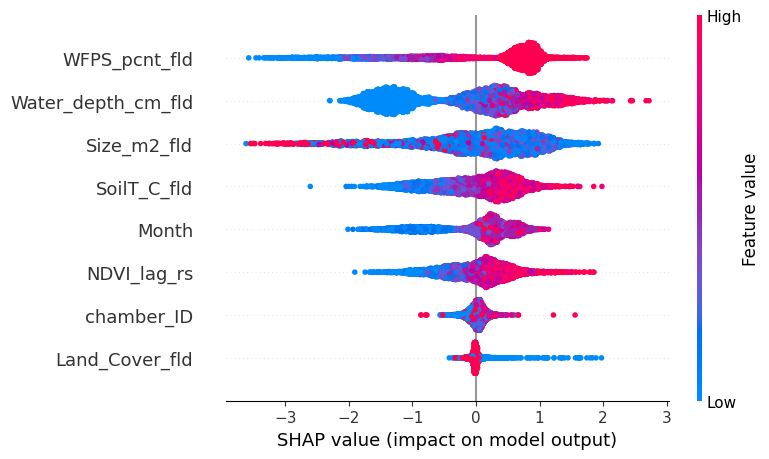

In [21]:
# train a model without year, all emissions
X_noyr_wID_hydro = df[[ 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'chamber_ID']]
y_noyr_wID_hydro = df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_noyr_wID_hydro_categorical = X_noyr_wID_hydro.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_noyr_wID_hydro_numerical = X_noyr_wID_hydro.select_dtypes(exclude = ['object'])

x_noyr_wID_hydro = pd.concat([x_noyr_wID_hydro_categorical, x_noyr_wID_hydro_numerical], axis = 1)

# print(x_pos)
print(x_noyr_wID_hydro.info())

X_noyr_wID_hydro_train, X_noyr_wID_hydro_test, y_noyr_wID_hydro_train, y_noyr_wID_hydro_test = train_test_split(x_noyr_wID_hydro, 
                                                                                                               y_noyr_wID_hydro, 
                                                                                                               test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_noyr_wID_hydro = RandomForestRegressor(oob_score = True)

regressor_noyr_wID_hydro.fit(X_noyr_wID_hydro_train, y_noyr_wID_hydro_train)

predictions_noyr_wID_hydro = regressor_noyr_wID_hydro.predict(X_noyr_wID_hydro_test)
print(f'R-squared, no max depth, no year, no wetland ID, no hydroperiod: {r2_score(y_noyr_wID_hydro_test, predictions_noyr_wID_hydro)}')

# SHAP plot
explainer_noyr_wID_hydro = shap.Explainer(regressor_noyr_wID_hydro)

shap_values_noyr_wID_hydro = explainer_noyr_wID_hydro.shap_values(X_noyr_wID_hydro_test)
shap.summary_plot(shap_values_noyr_wID_hydro, X_noyr_wID_hydro_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


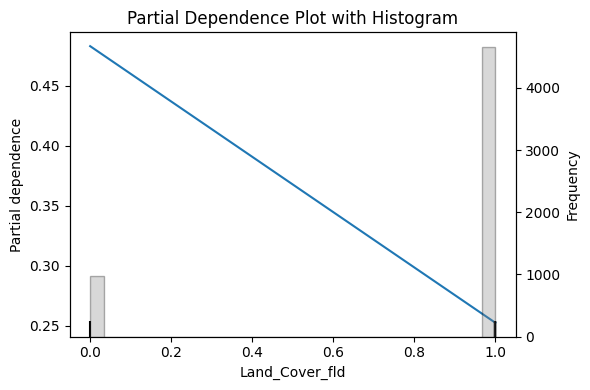

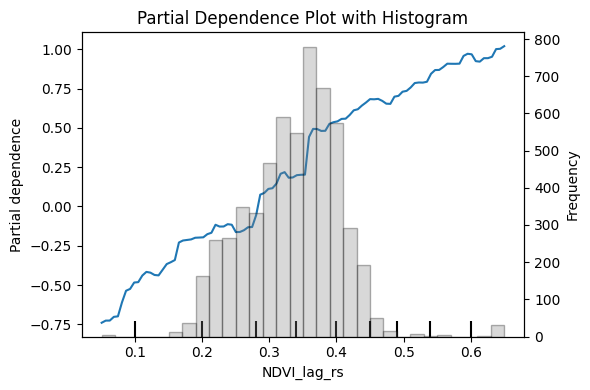

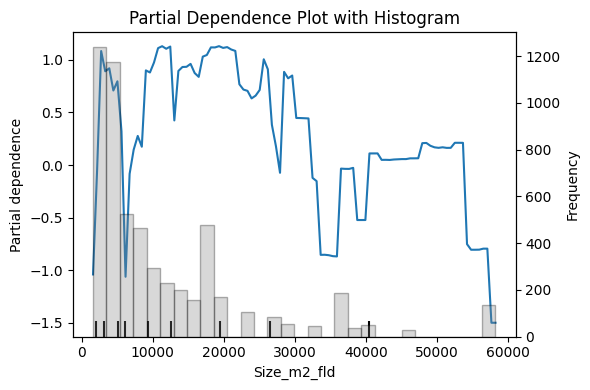

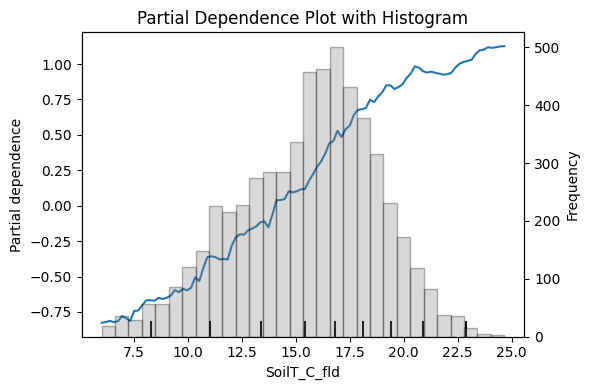

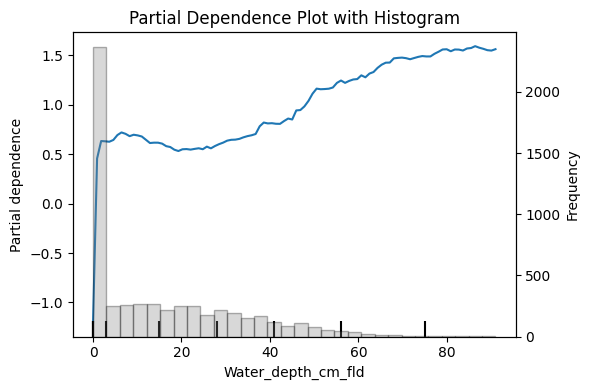

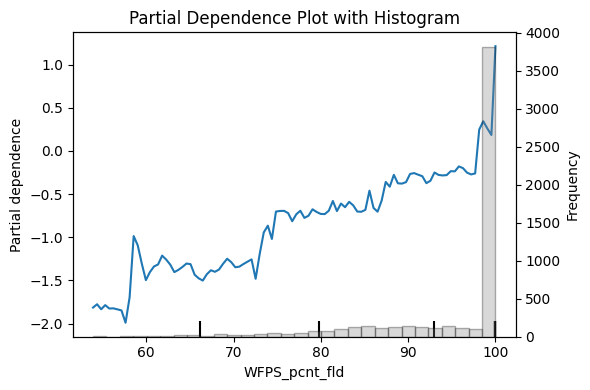

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


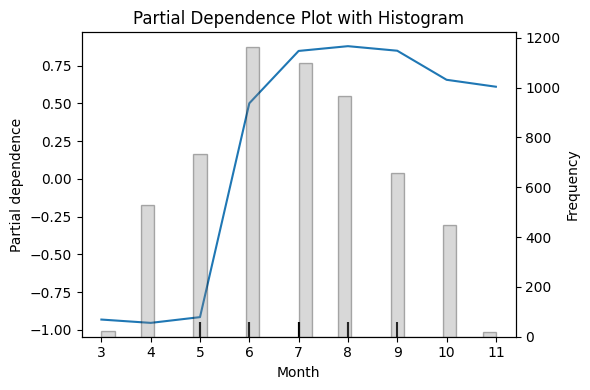

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


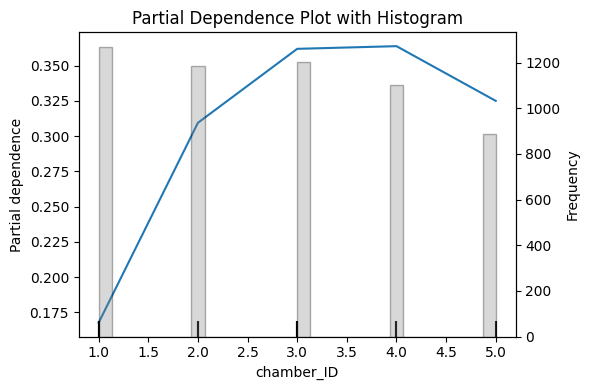

In [24]:
all_pdps(regressor_noyr_wID_hydro, X_noyr_wID_hydro_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   NDVI_lag_rs           18803 non-null  float64
 2   Size_m2_fld           18803 non-null  float64
 3   SoilT_C_fld           18803 non-null  float64
 4   Water_depth_cm_fld    18803 non-null  float64
 5   WFPS_pcnt_fld         18803 non-null  float64
 6   Month                 18803 non-null  int32  
 7   chamber_ID            18803 non-null  int64  
 8   Hydroperiod_days_fld  18803 non-null  float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 1.2 MB
None
R-squared, no max depth, no year, no wetland ID: 0.6537133930557626


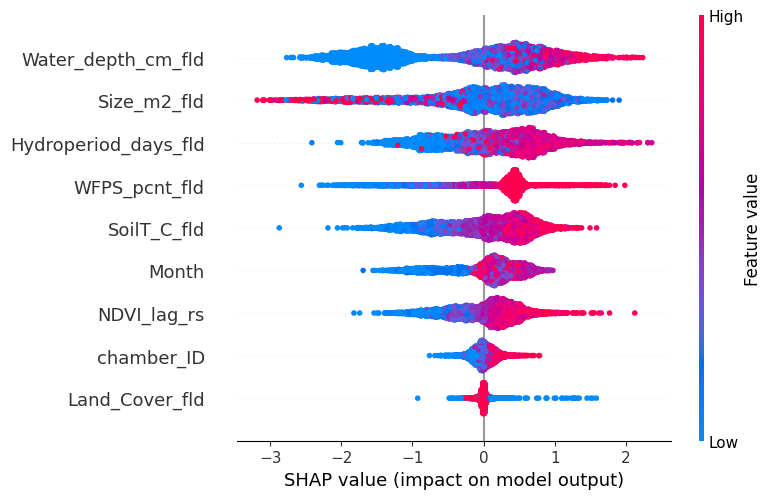

In [17]:
# train a model without year, all emissions
X_noyr_wID = df[[ 
       'Land_Cover_fld', 'NDVI_lag_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'chamber_ID', 'Hydroperiod_days_fld']]
y_noyr_wID = df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_noyr_wID_categorical = X_noyr_wID.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_noyr_wID_numerical = X_noyr_wID.select_dtypes(exclude = ['object'])

x_noyr_wID = pd.concat([x_noyr_wID_categorical, x_noyr_wID_numerical], axis = 1)

# print(x_pos)
print(x_noyr_wID.info())

X_noyr_wID_train, X_noyr_wID_test, y_noyr_wID_train, y_noyr_wID_test = train_test_split(x_noyr_wID, 
                                                                                                               y_noyr_wID, 
                                                                                                               test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_noyr_wID = RandomForestRegressor(oob_score = True)

regressor_noyr_wID.fit(X_noyr_wID_train, y_noyr_wID_train)

predictions_noyr_wID = regressor_noyr_wID.predict(X_noyr_wID_test)
print(f'R-squared, no max depth, no year, no wetland ID: {r2_score(y_noyr_wID_test, predictions_noyr_wID)}')

# SHAP plot
explainer_noyr_wID = shap.Explainer(regressor_noyr_wID)

shap_values_noyr_wID = explainer_noyr_wID.shap_values(X_noyr_wID_test)
shap.summary_plot(shap_values_noyr_wID, X_noyr_wID_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


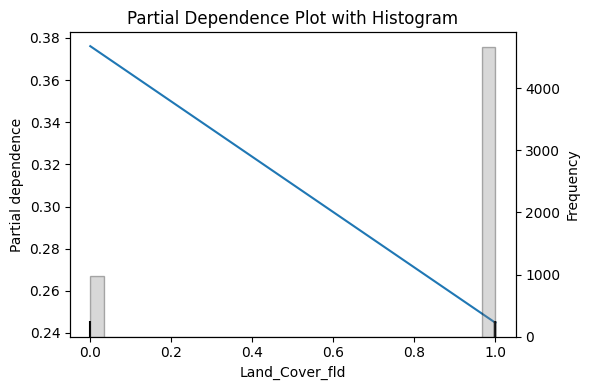

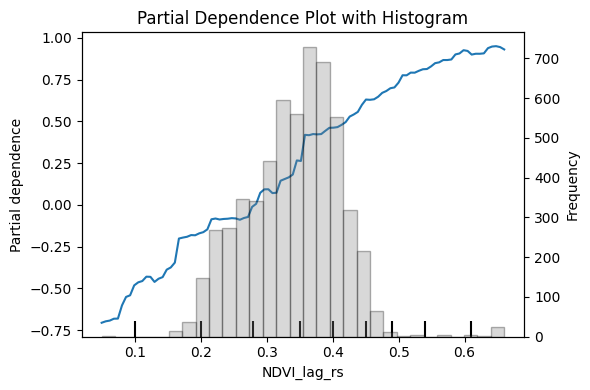

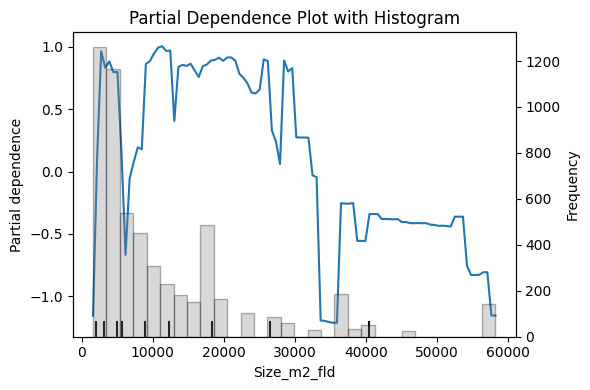

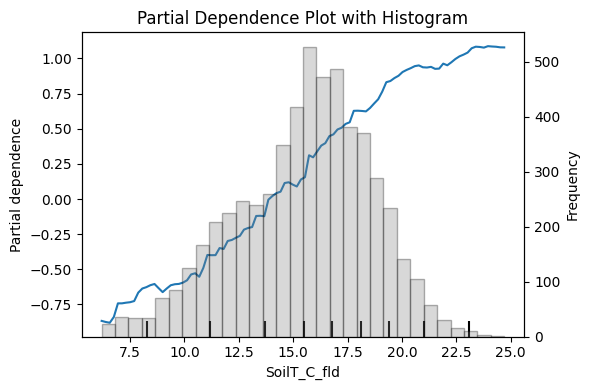

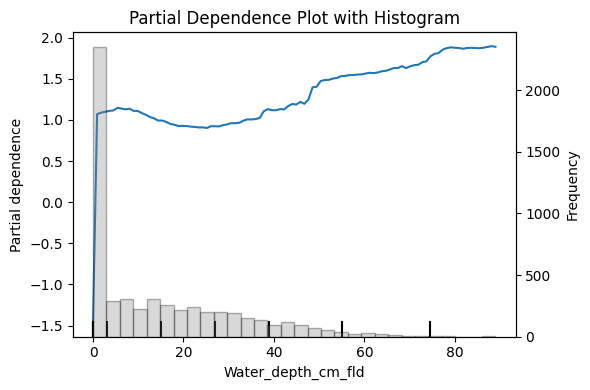

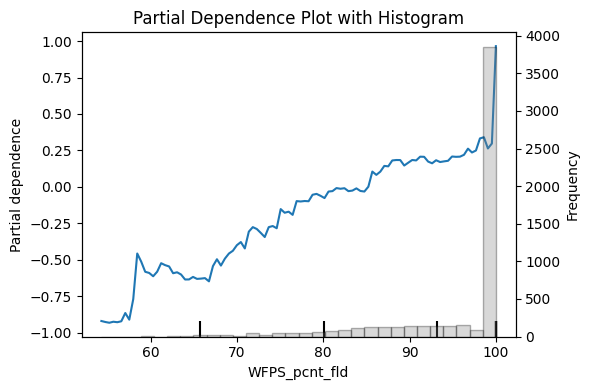

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


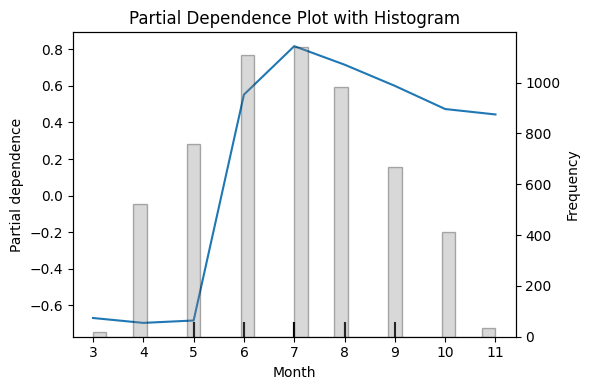

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


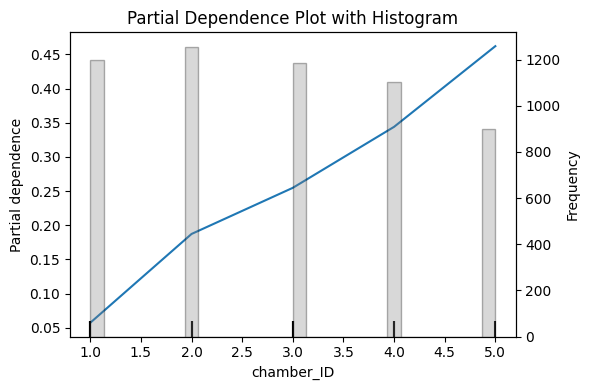

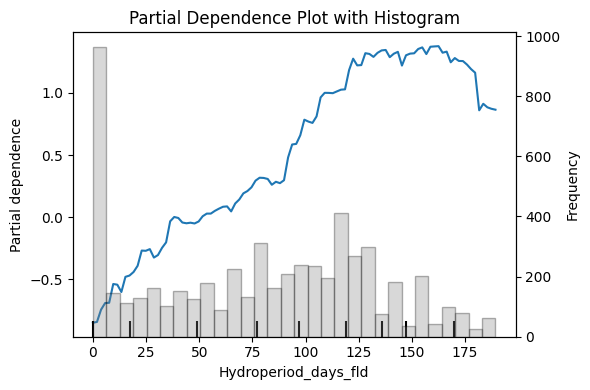

In [22]:
all_pdps(regressor_noyr_wID, X_noyr_wID_test)

R-squared, no max depth, no year, no wetland ID, 80/20 split: 0.6460325140074047


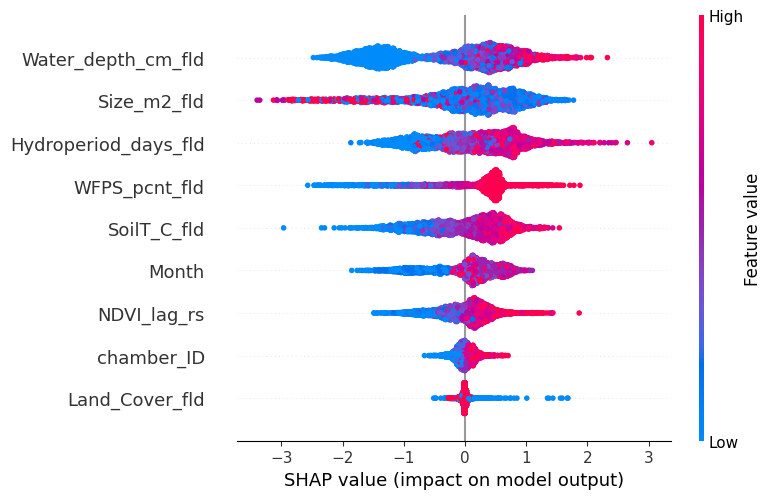

In [23]:
X_noyr_wID_train80, X_noyr_wID_test20, y_noyr_wID_train80, y_noyr_wID_test20 = train_test_split(x_noyr_wID, 
                                                                                                y_noyr_wID, 
                                                                                                test_size = 0.2)

# Fitting and Evaluating the Random Forest Model

regressor_noyr_wID80 = RandomForestRegressor(oob_score = True)

regressor_noyr_wID80.fit(X_noyr_wID_train80, y_noyr_wID_train80)

predictions_noyr_wID80 = regressor_noyr_wID80.predict(X_noyr_wID_test20)
print(f'R-squared, no max depth, no year, no wetland ID, 80/20 split: {r2_score(y_noyr_wID_test20, predictions_noyr_wID80)}')

# SHAP plot
explainer_noyr_wID80 = shap.Explainer(regressor_noyr_wID80)

shap_values_noyr_wID80 = explainer_noyr_wID80.shap_values(X_noyr_wID_test20)
shap.summary_plot(shap_values_noyr_wID80, X_noyr_wID_test20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18803 entries, 0 to 18802
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Land_Cover_fld        18803 non-null  int64  
 1   NDVI_rs               18803 non-null  float64
 2   Size_m2_fld           18803 non-null  float64
 3   SoilT_C_fld           18803 non-null  float64
 4   Water_depth_cm_fld    18803 non-null  float64
 5   WFPS_pcnt_fld         18803 non-null  float64
 6   Month                 18803 non-null  int32  
 7   chamber_ID            18803 non-null  int64  
 8   Hydroperiod_days_fld  18803 non-null  float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 1.2 MB
None
R-squared, no max depth, no year, no wetland ID: 0.6634770597442834


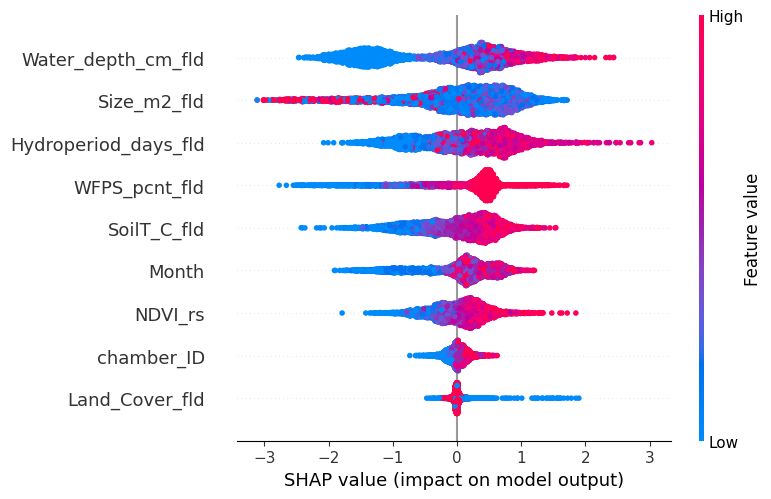

In [24]:
# switch NDVI lag for NDVI
# train a model without year, all emissions
X_ndvi_noyr_wID = df[[ 
       'Land_Cover_fld', 'NDVI_rs', 'Size_m2_fld', 'SoilT_C_fld', 'Water_depth_cm_fld',
        'WFPS_pcnt_fld', 'Month', 'chamber_ID', 'Hydroperiod_days_fld']]
y_ndvi_noyr_wID = df['methane_flux_log_mg_m2_hr']

# Converting categorical variables into numerical

x_ndvi_noyr_wID_categorical = X_ndvi_noyr_wID.select_dtypes(include = ['object']).apply(label_encoder.fit_transform)
x_ndvi_noyr_wID_numerical = X_ndvi_noyr_wID.select_dtypes(exclude = ['object'])

x_ndvi_noyr_wID = pd.concat([x_ndvi_noyr_wID_categorical, x_ndvi_noyr_wID_numerical], axis = 1)

# print(x_pos)
print(x_ndvi_noyr_wID.info())

X_ndvi_noyr_wID_train, X_ndvi_noyr_wID_test, y_ndvi_noyr_wID_train, y_ndvi_noyr_wID_test = train_test_split(x_ndvi_noyr_wID, 
                                                                                                               y_ndvi_noyr_wID, 
                                                                                                               test_size = 0.3)

# Fitting and Evaluating the Random Forest Model

regressor_ndvi_noyr_wID = RandomForestRegressor(oob_score = True)

regressor_ndvi_noyr_wID.fit(X_ndvi_noyr_wID_train, y_ndvi_noyr_wID_train)

predictions_ndvi_noyr_wID = regressor_ndvi_noyr_wID.predict(X_ndvi_noyr_wID_test)
print(f'R-squared, no max depth, no year, no wetland ID: {r2_score(y_ndvi_noyr_wID_test, predictions_ndvi_noyr_wID)}')

# SHAP plot
explainer_ndvi_noyr_wID = shap.Explainer(regressor_ndvi_noyr_wID)

shap_values_ndvi_noyr_wID = explainer_ndvi_noyr_wID.shap_values(X_ndvi_noyr_wID_test)
shap.summary_plot(shap_values_ndvi_noyr_wID, X_ndvi_noyr_wID_test)

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 0 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


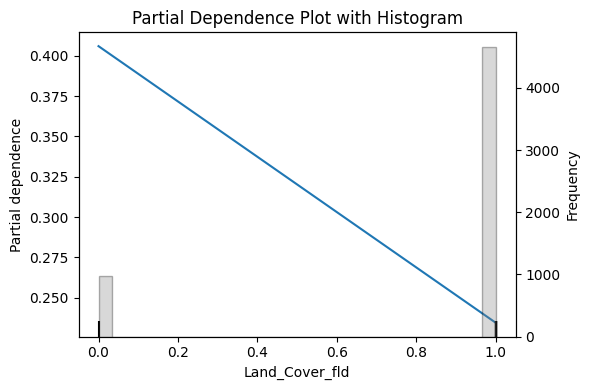

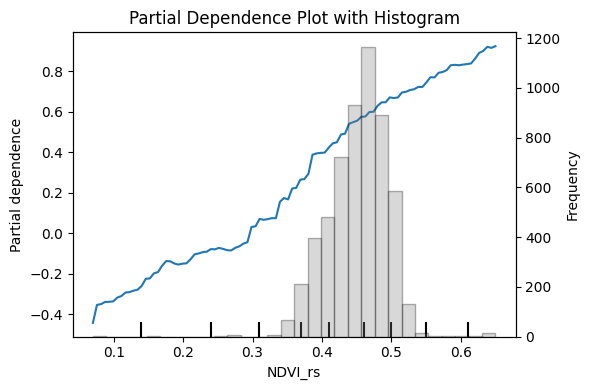

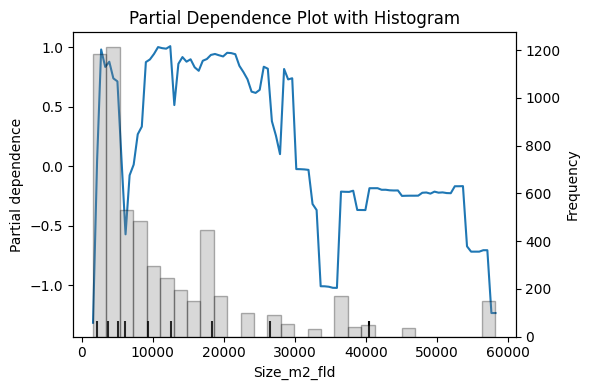

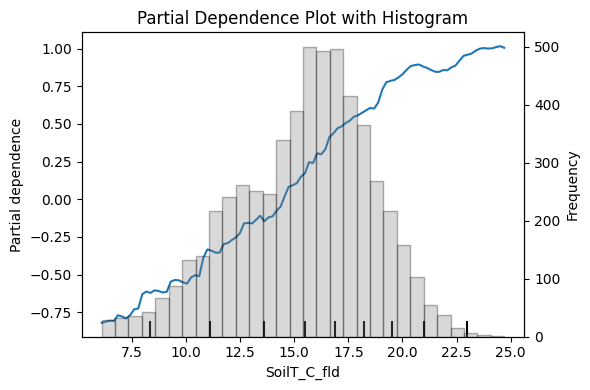

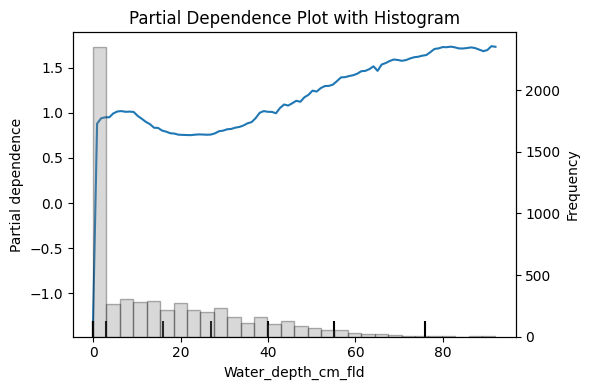

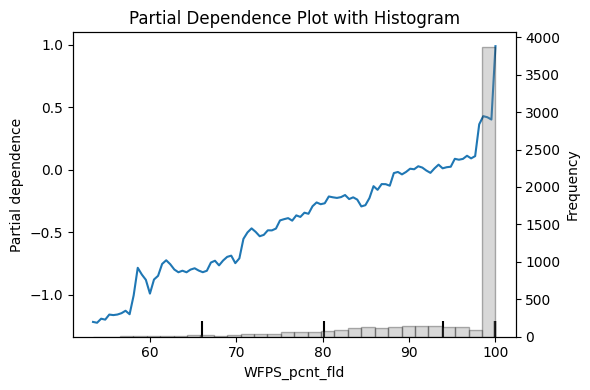

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


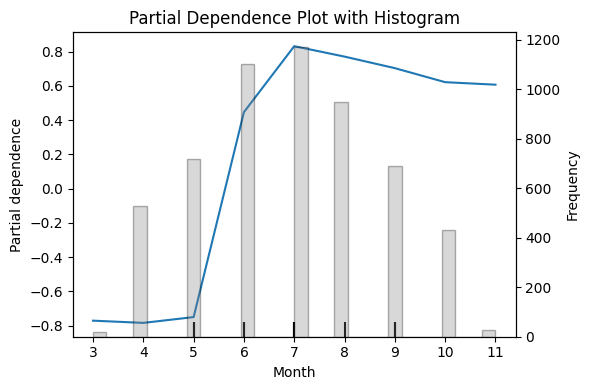

/Users/lauralayton/.pyenv/versions/venv3.12.11/lib/python3.12/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


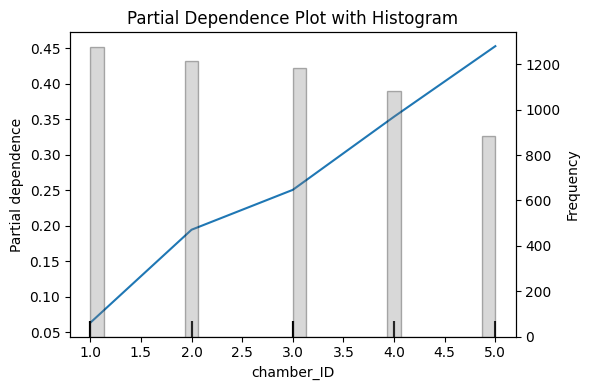

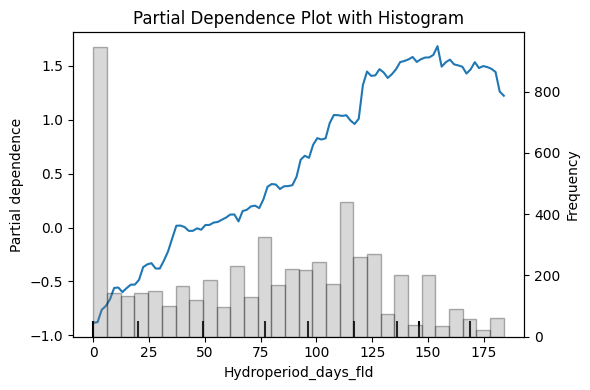

In [25]:
all_pdps(regressor_ndvi_noyr_wID, X_ndvi_noyr_wID_test)

In [57]:
# plotting time series

# 
# predictions_noyr_wID
# X_noyr_wID_test

# predict on the training data
predictions_on_train_noyr_wID = regressor_noyr_wID.predict(X_noyr_wID_train)
# predictions_on_train_noyr_wID


# extract for wetland P1, Chamber 1
wetland = 'P1'
chamber = 1

# create a list containing all indices in the original whole data set corresponding
# to the above wetland and chamber
index_list = []
for index, row in df.iterrows():
    if row['wetland_ID'] == wetland and row['chamber_ID'] == chamber:
        index_list.append(index)

test_data_ind_to_plot = []
model_test_ind_to_plot = []

# for i in len(X_noyr_wID_test):
#     row = X_noyr_wID_test.iloc[i]
#     if row['chamber_ID'] == chamber and 

test_data_and_pred_indices = []

ind = 0
for index, row in X_noyr_wID_test.iterrows():
    # if row['chamber_ID'] == chamber:
        #....
    #    data_ind_to_plot.append(index)
    if index in index_list:
        test_data_ind_to_plot.append(index)
        model_test_ind_to_plot.append(ind)

        test_data_and_pred_indices.append([index, ind])

    ind += 1


train_data_and_pred_indices = []

train_data_ind_to_plot = []
model_train_ind_to_plot = []

ind = 0
for index, row in X_noyr_wID_train.iterrows():
    if index in index_list:
        train_data_ind_to_plot.append(index)
        model_train_ind_to_plot.append(ind)

        train_data_and_pred_indices.append([index, ind])

    ind += 1




In [63]:
test_df_to_plot = df[df.index.isin(test_data_ind_to_plot)]
train_df_to_plot = df[df.index.isin(train_data_ind_to_plot)]

In [79]:
# actually maybe I just add 2 columns to the df, one for train vs test indicator and one for model prediction

train_index = X_noyr_wID_train.index
test_index = X_noyr_wID_test.index


def test_ind(index):
    if index in train_index:
        return 0
    else:
        return 1

def grab_model_pred(index):
    if index in train_index:
        ind_in_train = train_index.tolist().index(index)
        model_pred = predictions_on_train_noyr_wID[ind_in_train]
        return model_pred
    else:
        ind_in_test = test_index.tolist().index(index)
        model_pred = predictions_noyr_wID[ind_in_test]
        return model_pred


df['TEST_IND'] = df.index.map(test_ind)
df['Model Prediction'] = df.index.map(grab_model_pred)

In [80]:
df['Model Prediction']

0        3.725328
1        4.175282
2        4.942117
3        4.904368
4        3.773476
           ...   
18798   -5.599774
18799   -3.024183
18800   -1.895577
18801   -2.114031
18802   -2.211756
Name: Model Prediction, Length: 18803, dtype: float64

In [93]:
# okay now let's filter for the chosen wetland and chamber

# extract for wetland P1, Chamber 1
wetland = 'P1'
chamber = 1

# create a list containing all indices in the original whole data set corresponding
# to the above wetland and chamber
index_list = []
for index, row in df.iterrows():
    if row['wetland_ID'] == wetland and row['chamber_ID'] == chamber:
        index_list.append(index)

df_extract = df[df.index.isin(index_list)]

jan1_2009 = datetime.datetime(year=2009, month=1, day=1)
df_extract['Days Since Jan 1, 2009'] = df_extract.apply(lambda x: days_since(jan1_2009, x['Date Object']), axis = 1)


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_1488/1252983388.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract['Days Since Jan 1, 2009'] = df_extract.apply(lambda x: days_since(jan1_2009, x['Date Object']), axis = 1)


In [94]:
df_extract

chamber_ID       Date GS_Interval_fld  Hydroperiod_days_fld   LAB_ID  \
13476           1  5/18/2009           Early                 156.0      1.3   
13477           1   6/3/2009           Early                 156.0    153.3   
13478           1  6/18/2009           Early                 156.0    325.3   
13479           1  7/16/2009           Early                 156.0    669.0   
13480           1  7/28/2009           Early                 156.0    841.5   
...           ...        ...             ...                   ...      ...   
13564           1  8/24/2016            Late                 188.0  41209.0   
13565           1   9/8/2016            Late                 188.0  41409.0   
13566           1  9/21/2016            Late                 188.0  41677.0   
13567           1  10/6/2016            Late                 188.0  41895.0   
13568           1  11/2/2016            Late                 188.0  42243.0   

      Land_Cover_fld  methane_flux_log_mg_m2_hr  NDVI_lag_rs  NDVI_rs  \
13476          Grass                  -2.383779         0.03     0.03   
13477          Grass                  -1.714138         0.03     0.11   
13478          Grass                  -1.042693         0.11     0.27   
13479          Grass                  -1.905919         0.27     0.39   
13480          Grass                  -1.468251         0.39     0.39   
...              ...                        ...          ...      ...   
13564          Grass                  -1.700857         0.35     0.33   
13565          Grass                  -2.789938         0.33     0.31   
13566          Grass                  -3.738267         0.31     0.27   
13567          Grass                  -3.631664         0.27     0.22   
13568          Grass                  -2.703800         0.22     0.10   

       Size_m2_fld  ...  Wetland_Chamber  wetland_ID  WFPS_lag_pcnt_fld  \
13476      58200.0  ...             P1_1          P1              100.0   
13477      58200.0  ...             P1_1          P1              100.0   
13478      58200.0  ...             P1_1          P1              100.0   
13479      58200.0  ...             P1_1          P1              100.0   
13480      58200.0  ...             P1_1          P1              100.0   
...            ...  ...              ...         ...                ...   
13564      58200.0  ...             P1_1          P1              100.0   
13565      58200.0  ...             P1_1          P1              100.0   
13566      58200.0  ...             P1_1          P1              100.0   
13567      58200.0  ...             P1_1          P1              100.0   
13568      58200.0  ...             P1_1          P1              100.0   

      WFPS_pcnt_fld Date Object  Month  Year TEST_IND  Model Prediction  \
13476         100.0  2009-05-18      5  2009        0         -2.836113   
13477         100.0  2009-06-03      6  2009        0         -1.696485   
13478         100.0  2009-06-18      6  2009        1         -1.101774   
13479         100.0  2009-07-16      7  2009        1         -1.732772   
13480         100.0  2009-07-28      7  2009        1         -2.010977   
...             ...         ...    ...   ...      ...               ...   
13564         100.0  2016-08-24      8  2016        1         -1.597220   
13565         100.0  2016-09-08      9  2016        0         -2.095088   
13566         100.0  2016-09-21      9  2016        0         -2.922347   
13567         100.0  2016-10-06     10  2016        0         -3.412043   
13568         100.0  2016-11-02     11  2016        0         -2.815954   

       Days Since Jan 1, 2009  
13476                     137  
13477                     153  
13478                     168  
13479                     196  
13480                     208  
...                       ...  
13564                    2792  
13565                    2807  
13566                    2820  
13567                    2835  
13568                    28

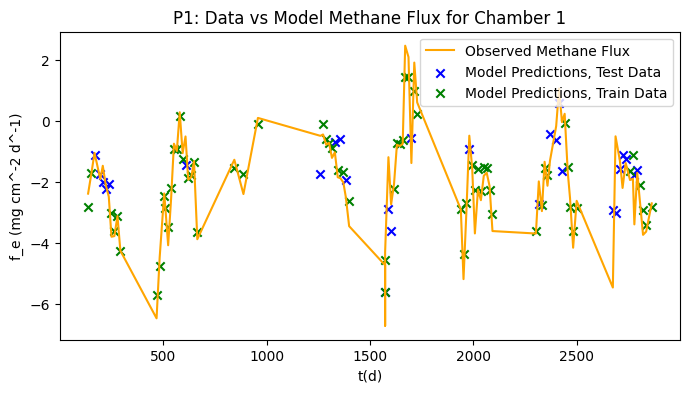

In [101]:
x_vals = df_extract['Days Since Jan 1, 2009'].tolist()
data_flux = df_extract['methane_flux_log_mg_m2_hr'].tolist()

df_extract_test = df_extract[df_extract['TEST_IND'] == 1]
df_extract_train = df_extract[df_extract['TEST_IND'] == 0]

model_pred_test = df_extract_test['Model Prediction'].tolist()
model_pred_train = df_extract_train['Model Prediction'].tolist()

x_vals_test = df_extract_test['Days Since Jan 1, 2009'].tolist()
x_vals_train = df_extract_train['Days Since Jan 1, 2009'].tolist()

# okay now plot
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(x_vals, data_flux, 
            label = "Observed Methane Flux", color = "orange")
plt.scatter(x_vals_test, model_pred_test, 
            label = "Model Predictions, Test Data",
           marker = "x",
           color = "blue")
plt.scatter(x_vals_train, model_pred_train,
            label = "Model Predictions, Train Data",
            marker = "x",
            color = "green")
plt.xlabel('t(d)')
plt.ylabel('f_e (mg cm^-2 d^-1)')
plt.title(str(wetland) + ": Data vs Model Methane Flux for Chamber " + str(chamber))
plt.legend(loc = "upper right")
plt.show()

In [99]:
len(x_vals_train)

66

In [102]:
model_pred_test

[-1.1017736178600008,
 -1.7327718664500003,
 -2.0109771853999994,
 -2.2348612206299974,
 -2.0735166224299992,
 -1.4557354269700005,
 -1.738581394499999,
 -0.67523935357,
 -0.59776293199,
 -1.9192219046999994,
 -5.624795493089998,
 -2.88026490331,
 -3.619907253629999,
 -0.54440764149,
 -0.9232472651900001,
 -2.71872641548,
 -0.4114437947999995,
 -0.6169646858900001,
 0.5939042171499994,
 -1.65149842936,
 -2.923398555130001,
 -3.025774833369999,
 -1.5630582776299997,
 -1.1153954077300003,
 -1.2482252927999995,
 -1.7852231546600001,
 -1.5972198338400003]

In [103]:
set(model_pred_test) <= set(predictions_noyr_wID)

True

In [109]:
jan1_2009 = datetime.datetime(year=2009, month=1, day=1)
df['Days Since Jan 1, 2009'] = df.apply(lambda x: days_since(jan1_2009, x['Date Object']), axis = 1)

In [195]:
def compare_model_and_data(wetland, chamber):
    # create a list containing all indices in the original whole data set corresponding
    # to the above wetland and chamber
    index_list = []
    for index, row in df.iterrows():
        if row['wetland_ID'] == wetland and row['chamber_ID'] == chamber:
            index_list.append(index)
    
    df_extract = df[df.index.isin(index_list)]

    x_vals = df_extract['Days Since Jan 1, 2009'].tolist()
    data_flux = df_extract['methane_flux_log_mg_m2_hr'].tolist()
    
    df_extract_test = df_extract[df_extract['TEST_IND'] == 1]
    df_extract_train = df_extract[df_extract['TEST_IND'] == 0]
    
    model_pred_test = df_extract_test['Model Prediction'].tolist()
    model_pred_train = df_extract_train['Model Prediction'].tolist()
    
    x_vals_test = df_extract_test['Days Since Jan 1, 2009'].tolist()
    x_vals_train = df_extract_train['Days Since Jan 1, 2009'].tolist()

    all_model_pred = df_extract['Model Prediction'].tolist()
    
    # okay now plot
    # this plot has scatter points for model predictions and a time series line for observed data
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(4)
    plt.scatter(x_vals_test, model_pred_test, 
                label = "Model Predictions, Test Data",
                marker = "x",
                color = "blue", 
                zorder = 3)
    plt.scatter(x_vals_train, model_pred_train,
                label = "Model Predictions, Train Data",
                marker = "x",
                color = "green", 
                zorder = 2)
    plt.plot(x_vals, data_flux, 
             label = "Observed Methane Flux", 
             color = "orange", 
             zorder = 0)
    plt.xlabel('t(d)')
    plt.ylabel('log f_e (mg cm^-2 d^-1)')
    plt.title(str(wetland) + ": Data vs Model Log Methane Flux for Chamber " + str(chamber))
    plt.legend(loc = "upper right")
    plt.show()

    # okay now plot
    # this plot has scatter points for model predictions and a time series line for observed data
    # and also a time series line for the model predictions
    f = plt.figure()
    f.set_figwidth(7)
    f.set_figheight(4)
    plt.scatter(x_vals_test, model_pred_test, 
                label = "Model Predictions, Test Data",
                marker = "x",
                color = "blue", 
                zorder = 3)
    plt.scatter(x_vals_train, model_pred_train,
                label = "Model Predictions, Train Data",
                marker = "x",
                color = "green", 
                zorder = 2)
    plt.plot(x_vals, all_model_pred,
             label = "Model Predictions", 
             color = "grey", 
             zorder = 1)
    plt.plot(x_vals, data_flux, 
             label = "Observed Methane Flux", 
             color = "orange", 
             zorder = 0)
    plt.xlabel('t(d)')
    plt.ylabel('log f_e (mg cm^-2 d^-1)')
    plt.title(str(wetland) + ": Data vs Model Log Methane Flux for Chamber " + str(chamber))
    plt.legend(loc = "upper right")
    plt.show()

    print(set(model_pred_test) <= set(predictions_noyr_wID))

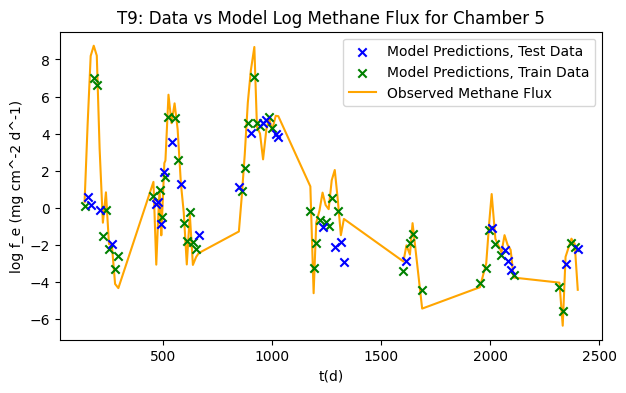

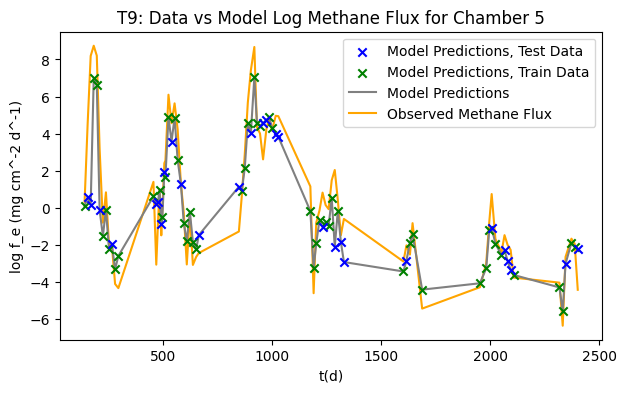

True


In [196]:
wetland = 'T9'
chamber = 5

warnings.filterwarnings('ignore')

compare_model_and_data(wetland, chamber)

In [117]:
df_extract

chamber_ID       Date GS_Interval_fld  Hydroperiod_days_fld   LAB_ID  \
13476           1  5/18/2009           Early                 156.0      1.3   
13477           1   6/3/2009           Early                 156.0    153.3   
13478           1  6/18/2009           Early                 156.0    325.3   
13479           1  7/16/2009           Early                 156.0    669.0   
13480           1  7/28/2009           Early                 156.0    841.5   
...           ...        ...             ...                   ...      ...   
13564           1  8/24/2016            Late                 188.0  41209.0   
13565           1   9/8/2016            Late                 188.0  41409.0   
13566           1  9/21/2016            Late                 188.0  41677.0   
13567           1  10/6/2016            Late                 188.0  41895.0   
13568           1  11/2/2016            Late                 188.0  42243.0   

      Land_Cover_fld  methane_flux_log_mg_m2_hr  NDVI_lag_rs  NDVI_rs  \
13476          Grass                  -2.383779         0.03     0.03   
13477          Grass                  -1.714138         0.03     0.11   
13478          Grass                  -1.042693         0.11     0.27   
13479          Grass                  -1.905919         0.27     0.39   
13480          Grass                  -1.468251         0.39     0.39   
...              ...                        ...          ...      ...   
13564          Grass                  -1.700857         0.35     0.33   
13565          Grass                  -2.789938         0.33     0.31   
13566          Grass                  -3.738267         0.31     0.27   
13567          Grass                  -3.631664         0.27     0.22   
13568          Grass                  -2.703800         0.22     0.10   

       Size_m2_fld  ...  Wetland_Chamber  wetland_ID  WFPS_lag_pcnt_fld  \
13476      58200.0  ...             P1_1          P1              100.0   
13477      58200.0  ...             P1_1          P1              100.0   
13478      58200.0  ...             P1_1          P1              100.0   
13479      58200.0  ...             P1_1          P1              100.0   
13480      58200.0  ...             P1_1          P1              100.0   
...            ...  ...              ...         ...                ...   
13564      58200.0  ...             P1_1          P1              100.0   
13565      58200.0  ...             P1_1          P1              100.0   
13566      58200.0  ...             P1_1          P1              100.0   
13567      58200.0  ...             P1_1          P1              100.0   
13568      58200.0  ...             P1_1          P1              100.0   

      WFPS_pcnt_fld Date Object  Month  Year TEST_IND  Model Prediction  \
13476         100.0  2009-05-18      5  2009        0         -2.836113   
13477         100.0  2009-06-03      6  2009        0         -1.696485   
13478         100.0  2009-06-18      6  2009        1         -1.101774   
13479         100.0  2009-07-16      7  2009        1         -1.732772   
13480         100.0  2009-07-28      7  2009        1         -2.010977   
...             ...         ...    ...   ...      ...               ...   
13564         100.0  2016-08-24      8  2016        1         -1.597220   
13565         100.0  2016-09-08      9  2016        0         -2.095088   
13566         100.0  2016-09-21      9  2016        0         -2.922347   
13567         100.0  2016-10-06     10  2016        0         -3.412043   
13568         100.0  2016-11-02     11  2016        0         -2.815954   

       Days Since Jan 1, 2009  
13476                     137  
13477                     153  
13478                     168  
13479                     196  
13480                     208  
...                       ...  
13564                    2792  
13565                    2807  
13566                    2820  
13567                    2835  
13568                    28

In [45]:
X_noyr_wID_test.iloc[1]['chamber_ID']

np.float64(3.0)

In [46]:
X_noyr_wID_test.iloc[1]

Land_Cover_fld             1.00
NDVI_lag_rs                0.55
Size_m2_fld             7231.00
SoilT_C_fld               10.60
Water_depth_cm_fld        30.00
WFPS_pcnt_fld            100.00
Month                     10.00
chamber_ID                 3.00
Hydroperiod_days_fld      98.50
Name: 12230, dtype: float64

In [126]:
df['wetland_ID'].unique()

array(['BECK 5', 'BECK 6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'DU01', 'DU02', 'DU03', 'DU05', 'DU06', 'DU07', 'DU08', 'DU09',
       'DU10', 'DU11', 'DU12', 'DU13', 'DU14', 'DU15', 'DU17', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'GP01157', 'GP01158',
       'GP01314', 'GP01317', 'GP01318', 'GP01323', 'GP01325', 'GP01326',
       'GP01604', 'GP01605', 'GP01606', 'GP01607', 'GP01608', 'GP01609',
       'GP01610', 'GP01611', 'GP01612', 'GP01613', 'GP01615', 'GP01617',
       'GP01618', 'GP01619', 'GP01624', 'GP01626', 'GP01627', 'GP01630',
       'GP01631', 'GP01633', 'GP01634', 'GP01635', 'GP01637', 'GP01638',
       'GP01639', 'GP09644', 'GP09645', 'GP09646', 'GP09647', 'GP09648',
       'GP09649', 'GP09650', 'GP09651', 'GP09652', 'GP09653', 'GP09654',
       'GP09655', 'GP09656', 'GP09657', 'GP09658', 'GP09659', 'GP09664',
       'GP09665', 'GP09666', 'GP09667', 'GP09668', 'GP09669', 'GP09670',
       'GP09671', 'GP09672', 'GP09673', 'GP09674', 'GP096

In [157]:
df[df['wetland_ID'] == 'T2']

chamber_ID       Date GS_Interval_fld  Hydroperiod_days_fld   LAB_ID  \
16446           1  5/23/2013           Early                  68.0  20150.0   
16447           1   6/6/2013           Early                  68.0  20962.0   
16448           1  6/20/2013           Early                  68.0  21747.0   
16449           1   7/3/2013           Early                  68.0  22339.0   
16450           1  7/17/2013           Early                  68.0  22738.0   
16451           1  7/30/2013           Early                  68.0  23132.0   
16452           1  4/24/2014           Early                 167.0  28068.0   
16453           1   5/8/2014           Early                 167.0  28270.0   
16454           1  5/22/2014           Early                 167.0  28516.0   
16455           1   6/5/2014           Early                 167.0  28718.0   
16456           1  6/19/2014           Early                 167.0  29108.0   
16457           1   7/1/2014           Early                 167.0  29310.0   
16458           1  7/17/2014            Late                 167.0  29846.0   
16459           1  7/31/2014            Late                 167.0  30236.0   
16460           1  8/14/2014            Late                 167.0  30475.0   
16461           1  8/28/2014            Late                 167.0  31018.0   
16462           1  9/11/2014            Late                 167.0  31661.0   
16463           1  9/25/2014            Late                 167.0  32051.0   
16464           1  10/8/2014            Late                 167.0  32456.0   
16465           1   5/7/2015           Early                  96.0  33988.0   
16466           1  5/20/2015           Early                  96.0  34234.0   
16467           1   6/2/2015           Early                  96.0  34498.0   
16468           1  6/16/2015           Early                  96.0  34749.0   
16469           1  6/30/2015           Early                  96.0  34995.0   
16470           1  7/14/2015           Early                  96.0  35241.0   
16471           1  7/28/2015            Late                  96.0  35383.0   
16472           1  8/11/2015            Late                  96.0  35822.0   

      Land_Cover_fld  methane_flux_log_mg_m2_hr  NDVI_lag_rs  NDVI_rs  \
16446          Grass                  -2.842860         0.11     0.11   
16447          Grass                  -1.939965         0.11     0.20   
16448          Grass                  -0.559286         0.20     0.27   
16449          Grass                  -0.401468         0.27     0.34   
16450          Grass                   0.536371         0.34     0.40   
16451          Grass                   1.086133         0.40     0.44   
16452          Grass                  -2.800468         0.13     0.13   
16453          Grass                  -0.720967         0.13     0.20   
16454          Grass                  -0.829043         0.20     0.28   
16455          Grass                   0.481007         0.28     0.35   
16456          Grass                  -0.918654         0.35     0.42   
16457          Grass                   0.723233         0.42     0.42   
16458          Grass                   0.422238         0.42     0.53   
16459          Grass                  -0.926318         0.53     0.56   
16460          Grass                   0.407575         0.56     0.57   
16461          Grass                   0.133213         0.57     0.56   
16462          Grass                  -0.896851         0.56     0.54   
16463          Grass                  -0.227398         0.54     0.50   
16464          Grass                  -0.799597         0.50     0.44   
16465          Grass                  -0.430755         0.31     0.31   
16466          Grass                  -1.910144         0.31     0.31   
16467          Grass                   4.656673         0.31     0.38   
16468          Grass                  -0.774418         0.38     0.44   
16469          Grass                  -0.0